In [1]:
import json

In [2]:
from tqdm import tqdm

#gather all stopwords
stopwords = []
stop_file = "./ID-Stopwords/id.stopwords.02.01.2016.txt"
with open(stop_file, 'r') as file:
    for line in tqdm(file):
        stopwords.append(line.strip())

758it [00:00, 25340.60it/s]


In [3]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


# Tydi Data

In [4]:
gold_data = []
actual_data = []

with open('query_result_tydi_normalized_prettified.json', 'r') as actual_out:
    actual_data = json.load(actual_out)

with open('question-syifa-test.json', 'r') as gold_out:
    gold_data = json.load(gold_out)

In [5]:
gold_ids = []
neg_ids = []
for row in gold_data:
    row_gold_ids = []
    row_neg_ids = []
    for row_ctx in row['ctxs']:
        row_gold_ids.append(row_ctx['id'])
    for row_ctx in row['neg_ctxs']:
        row_neg_ids.append(row_ctx['id'])
    gold_ids.append(row_gold_ids)
    neg_ids.append(row_neg_ids)

In [6]:
text_error = []
i = 0
for row in actual_data:
    row_text_error = []
    for row_ctx in row['ctxs']:
        if row_ctx['id'] in neg_ids[i]:
            row_text_error.append({'id': row_ctx['id'], 'title': row_ctx['title'], 'text': row_ctx['text']})
    text_error.append(row_text_error)
    i+=1

In [7]:
for i in range(len(text_error)):
    print("Question")
    print(f"text: {actual_data[i]['question']['text']}")
    print(f"title: {actual_data[i]['question']['title']}")
    print("Similar Questions")
    print(text_error[i])
    print()
    print()

Question
text: malam dok , sejak 2 hari yang lalu badan saya pusing dan lemas hari ini hidung saya mengeluarkan ingus terus menerus , bagaimana cara mengatasi nya ya dok ? terima kasih sebelumnya
title: cara mengatasi pusing , lemas dan hidung berair
Similar Questions
[]


Question
text: selamat pagi dok , saya mau tanya kenapa telinga saya berdenging terus ya dok sudah 6 hari , saya juga sudah ke puskesmas untuk di periksa , kata dokternya telinganya kotor karena di bersihkan dengan cutton buds jadi kotorannya terdorong hingga menutupi gendang telinga , dan saya sudah dikasih obat tetes untuk menghilangkan kotoran , tetapi dengung di telinga saya tidak berkurang sama sekali dok , saran dari dokter seperti apa ?
title: telinga berdengung sebelah kiri
Similar Questions
[]


Question
text: sore dok . . maaf dok saya sudah 4 hari mengalami benjolan di daerah kemaluan mula-mula benjolan tersebut kecil dan sekarang membesar lalu pecah dok . . rasanya linu dan sakit jika malam hari . . kira-

## Unigram Analysis

In [8]:
n = len(text_error)

In [9]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mk1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
import re

def normalize(text, stem_text=True):
    text = re.sub('\s+', ' ', text)  # remove extra space
    text = text.strip()  # trim depan belakang
    normal_regex = re.compile(r"(.)\1{1,}")
    text = normal_regex.sub(r"\1\1", text)
    if stem_text:
        text = stemmer.stem(text)
    return text

def get_ngram(n: int, text: str):
    if n > len(text):
        return dict()
    ngrams_freq = dict()
    text_lst = list(word_tokenize(text))
    text_lst=[word.lower() for word in text_lst if word.isalpha()]
    ngrams = [" ".join(text_lst[i:i+n]) for i in range(len(text_lst)-n+1)]
    ngrams = [normalize(ngram) for ngram in ngrams if ngram not in stopwords]
    return ngrams

def get_ngram_freq(n: int, text: str):
    if n > len(text):
        return dict()
    ngrams = get_ngram(n, text)
    ngrams_freq = dict()
    for ngram in ngrams:
        if ngram not in ngrams_freq:
            ngrams_freq[ngram] = 0
        ngrams_freq[ngram] += 1
    return ngrams_freq

def get_ngram_freq_lst(n: int, texts: list):
    ngrams_freq = dict()
    for text in texts:
        if n  > len(text):
            continue
        text_lst = list(word_tokenize(text))
        text_lst=[word.lower() for word in text_lst if word.isalpha()]
        ngrams = [" ".join(text_lst[i:i+n]) for i in range(len(text_lst)-n+1)]
        ngrams = [normalize(ngram) for ngram in ngrams if ngram not in stopwords]
        for ngram in ngrams:
            if ngram not in ngrams_freq:
                ngrams_freq[ngram] = 0
            ngrams_freq[ngram] += 1
    return ngrams_freq

def get_union_term_cnt_normalized(map1: dict, map2: dict) -> float:
    union_cnt = 0
    denom = min(sum(list(map1.values())), sum(list(map2.values())))
    for key, value in map1.items():
        if key in map2:
            union_cnt += min(map1[key], map2[key])
    return union_cnt/denom

In [11]:
assert get_ngram_freq(2, "hello bingo world") == {"hello bingo": 1, "bingo world": 1}

Question
{'dok': 2, 'maladaptive': 2, 'daydreaming': 2, 'terkadang': 2, 'biasa': 1, 'lamun': 1, 'khayal': 1, 'idap': 1, 'cerita': 1, 'peran': 1, 'nya': 1, 'gera': 1, 'reflek': 1, 'ikut': 1, 'plot': 1, 'kait': 1, 'ganggu': 1, 'jiwa': 1, 'sembuh': 1}


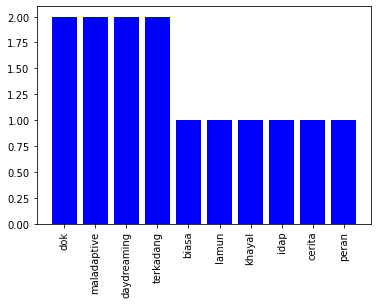

Similar Questions
{'alami': 3, 'terkadang': 3, 'aneh': 2, 'dok': 2, 'ting': 2, 'sadar': 2, 'obat': 2, 'orang': 2, 'gejala': 1, 'ocd': 1, 'ucap': 1, 'istigfhar': 1, 'kendali': 1, 'heran': 1, 'coba': 1, 'pintar': 1, 'ubah': 1, 'temu': 1, 'artikel': 1, 'judul': 1, 'cerita': 1, 'persis': 1, 'lelah': 1, 'malu': 1, 'konyol': 1, 'cuci': 1, 'tangan': 1, 'kunci': 1, 'pintu': 1, 'terapi': 1, 'jalan': 1, 'hilang': 1, 'terima': 1, 'kasih': 1}


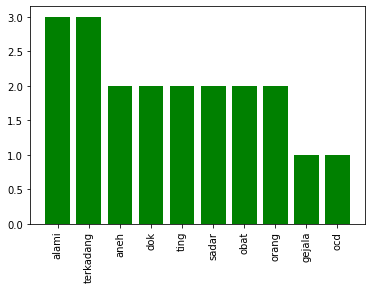



Question
{'tulang': 3, 'sambung': 3, 'patah': 2, 'dok': 2, 'sore': 1, 'tumbuh': 1, 'arti': 1, 'reaksi': 1, 'kuat': 1, 'terima': 1, 'kasih': 1}


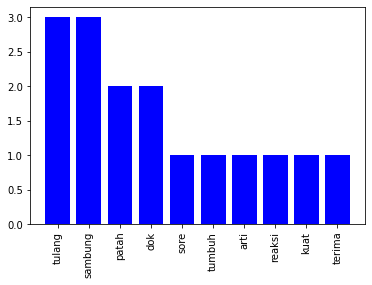

Similar Questions
{'patah': 3, 'tulang': 3, 'sebab': 2, 'kanker': 2, 'dok': 2, 'engsel': 2, 'serempet': 1, 'motor': 1, 'kiri': 1, 'na': 1, 'geser': 1, 'alhamdulillah': 1, 'ni': 1, 'sakit': 1}


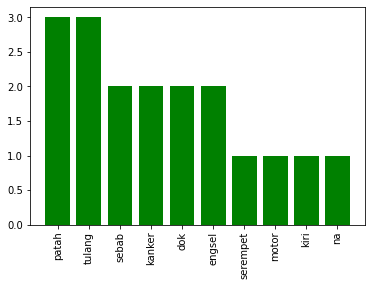



Question
{'tulang': 3, 'kering': 3, 'bentur': 3, 'sakit': 2, 'sepeda': 2, 'motor': 2, 'bahaya': 2, 'dok': 2, 'lebam': 2, 'akibat': 1, 'siang': 1, 'muncul': 1, 'bengkak': 1, 'hilang': 1, 'iring': 1, 'sentuh': 1, 'pakai': 1, 'turun': 1, 'tangga': 1, 'kaki': 1, 'terima': 1, 'kasih': 1}


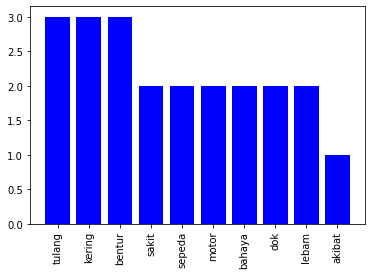

Similar Questions
{'kaki': 9, 'dok': 7, 'nya': 6, 'telapak': 4, 'tulang': 3, 'sembuh': 3, 'nyeri': 3, 'motor': 3, 'retak': 2, 'malam': 2, 'jalan': 2, 'bengkak': 2, 'terima': 2, 'kasih': 2, 'panas': 2, 'turun': 2, 'ya': 2, 'luka': 2, 'sobek': 2, 'jempol': 2, 'putus': 2, 'selamat': 1, 'suami': 1, 'kiri': 1, 'lindas': 1, 'ban': 1, 'mobil': 1, 'muat': 1, 'ton': 1, 'proses': 1, 'iring': 1, 'bawa': 1, 'sakit': 1, 'lebam': 1, 'hilang': 1, 'kak': 1, 'mohon': 1, 'bantu': 1, 'solusi': 1, 'apa': 1, 'sehat': 1, 'ucap': 1, 'sepeda': 1, 'kali': 1, 'habis': 1, 'spda': 1, 'bakar': 1, 'dalam': 1, 'nyentuh': 1, 'tanah': 1, 'nih': 1, 'bulan': 1, 'celaka': 1, 'akibat': 1, 'kulit': 1, 'kering': 1, 'gelang': 1, 'patah': 1, 'sambung': 1, 'amputasi': 1, 'organ': 1, 'pakai': 1, 'suka': 1, 'asa': 1, 'kaku': 1, 'gerakin': 1, 'kara': 1, 'urat': 1, 'nyambung': 1, 'tolong': 1, 'info': 1}


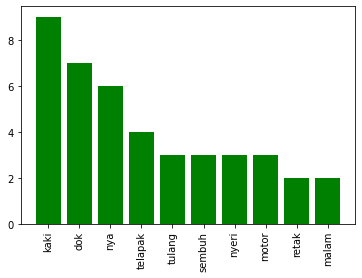



Question
{'bahaya': 2, 'makan': 2, 'mi': 2, 'instan': 2, 'dok': 2, 'terkadang': 1, 'konsumsi': 1, 'hari': 1, 'kali': 1, 'maklum': 1, 'anak': 1, 'kost': 1, 'rantau': 1, 'seberang': 1}


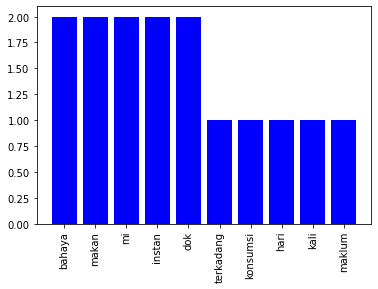

Similar Questions
{'mie': 11, 'konsumsi': 8, 'instan': 8, 'hamil': 6, 'makan': 4, 'dok': 3, 'minum': 2, 'terima': 2, 'kasih': 2, 'mi': 1, 'hallo': 1, 'instant': 1, 'ayam': 1, 'dingin': 1, 'eskrim': 1, 'air': 1, 'es': 1, 'anjur': 1, 'pagi': 1, 'terus': 1, 'perut': 1, 'buncit': 1, 'perhati': 1, 'ucap': 1, 'selamat': 1, 'siang': 1, 'bagus': 1, 'cz': 1, 'ken': 1, 'tyuz': 1}


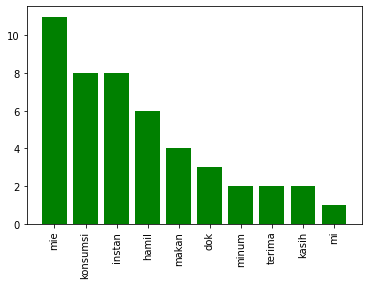



Question
{'belek': 3, 'dok': 3, 'lihat': 2, 'kena': 2, 'atas': 1, 'ganggu': 1, 'mata': 1, 'minggu': 1, 'hilang': 1, 'kurang': 1, 'laku': 1, 'alami': 1, 'sembuh': 1, 'normal': 1, 'terima': 1, 'kasih': 1, 'info': 1, 'saran': 1}


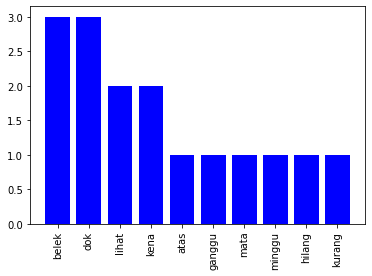

Similar Questions
{'mata': 4, 'ganjal': 2, 'dok': 2, 'partikel': 1, 'kanan': 1, 'kedip': 1, 'tutup': 1, 'alami': 1, 'ya': 1, 'terima': 1, 'kasih': 1}


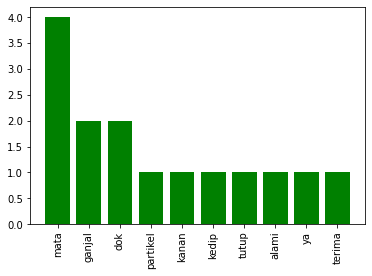



Question
{'sulit': 4, 'rasa': 4, 'denyut': 4, 'nafas': 3, 'dokter': 3, 'sakit': 3, 'cemas': 3, 'obat': 3, 'serang': 2, 'panik': 2, 'alami': 2, 'dada': 2, 'lambung': 2, 'jantung': 2, 'keras': 2, 'beberapa': 2, 'artikel': 2, 'gejala': 2, 'malam': 1, 'kepala': 1, 'kambuh': 1, 'badan': 1, 'gemetar': 1, 'meriang': 1, 'dingin': 1, 'fikiran': 1, 'tenang': 1, 'berfikir': 1, 'tinggal': 1, 'konsultasi': 1, 'beliau': 1, 'bilang': 1, 'efek': 1, 'asam': 1, 'maag': 1, 'tes': 1, 'ekg': 1, 'alhamdulillah': 1, 'normal': 1, 'sekarang': 1, 'konsumsi': 1, 'reda': 1, 'nyeri': 1, 'pangkal': 1, 'tenggorok': 1, 'ganjal': 1, 'terkadang': 1, 'tekan': 1, 'ujung': 1, 'uap': 1, 'ras': 1, 'kali': 1, 'temu': 1, 'panic': 1, 'attack': 1, 'nemenukan': 1, 'psikosomatik': 1, 'ganggu': 1, 'dok': 1, 'spesialis': 1, 'terima': 1, 'kasih': 1}


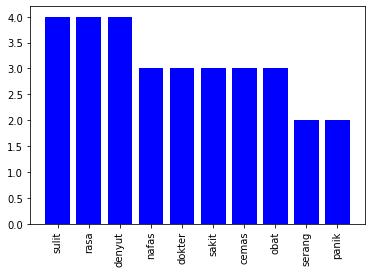

Similar Questions
{'sakit': 4, 'dada': 2, 'migrain': 2, 'dok': 2, 'pindah': 2, 'badan': 2, 'pagi': 1, 'panas': 1, 'dokter': 1, 'internist': 1, 'gas': 1, 'lambung': 1, 'serta': 1, 'panik': 1, 'serang': 1, 'muncul': 1, 'acak': 1, 'minggu': 1, 'keluh': 1, 'tambah': 1, 'kepala': 1, 'belah': 1, 'kiri': 1, 'rahang': 1, 'obat': 1, 'terima': 1, 'kasih': 1, 'hendy': 1, 'pria': 1, 'meni': 1, 'berat': 1, 'kg': 1}


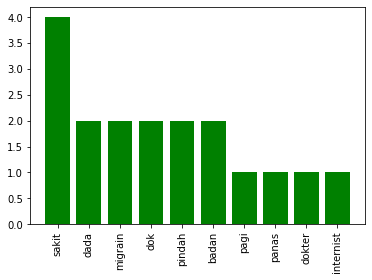



Question
{'lendir': 3, 'tenggorok': 3, 'dok': 2, 'flu': 2, 'tenggoroka': 1, 'keluar': 1, 'skl': 1, 'bau': 1, 'sengat': 1, 'sakit': 1}


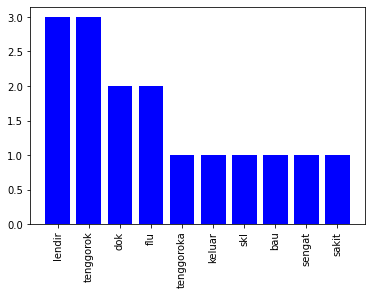

Similar Questions
{'flu': 2, 'lendir': 2, 'warna': 2, 'hijau': 2, 'susah': 2, 'pilek': 2, 'kemari': 1, 'rabu': 1, 'pulang': 1, 'bal': 1, 'esok': 1, 'hari': 1, 'badan': 1, 'panas': 1, 'tenggorok': 1, 'kering': 1, 'tel': 1, 'lumayan': 1, 'bilang': 1, 'capek': 1, 'kunjung': 1, 'sembuh': 1, 'parah': 1, 'bangun': 1, 'tidur': 1, 'kotor': 1, 'mata': 1, 'kadang': 1, 'melek': 1, 'kucek': 1, 'alami': 1, 'pusing': 1, 'waspada': 1, 'ya': 1, 'dok': 1}


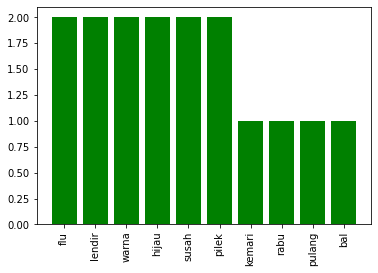



Question
{'keringat': 3, 'dok': 2, 'sakit': 1, 'sengaja': 1, 'mati': 1, 'ac': 1, 'ruang': 1, 'kerja': 1, 'batuk': 1, 'demam': 1, 'bareng': 1, 'minum': 1, 'sehat': 1}


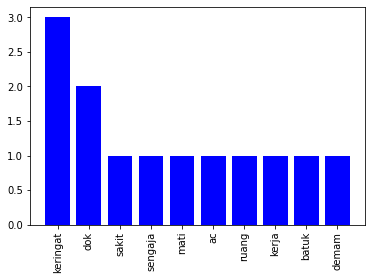

Similar Questions
{'dok': 3, 'sakit': 3, 'keringat': 2, 'dingin': 2, 'sesak': 2, 'nafas': 2, 'perut': 2, 'nyaman': 2, 'cemas': 2, 'obat': 2, 'kenpa': 1, 'asa': 1, 'periksa': 1, 'dokter': 1, 'maag': 1, 'rasa': 1, 'baik': 1, 'terima': 1, 'kasih': 1}


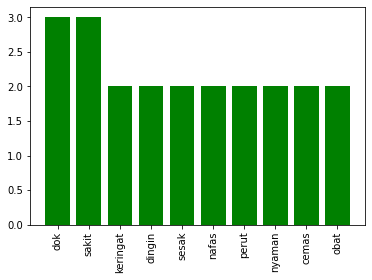



Question
{'tangan': 4, 'telapak': 3, 'kulit': 2, 'kelupas': 2, 'dok': 2, 'gatal': 1, 'lapis': 1, 'bintik': 1, 'merah': 1, 'kali': 1, 'alami': 1, 'sembuh': 1, 'solusi': 1, 'dokter': 1, 'sakit': 1, 'anjur': 1, 'obat': 1, 'terima': 1, 'kasih': 1}


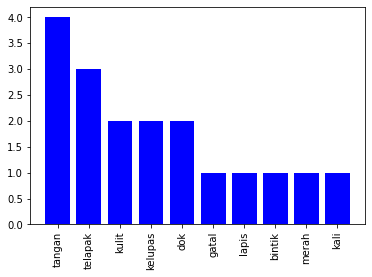

Similar Questions
{'kulit': 2, 'kelupas': 2, 'gatal': 2, 'dok': 2, 'selamat': 1, 'siang': 1, 'pakai': 1, 'cream': 1, 'pure': 1, 'wajah': 1, 'cocok': 1, 'ya': 1, 'terima': 1, 'kasih': 1}


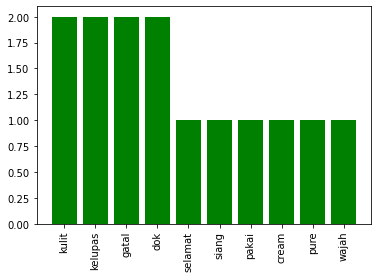



Question
{'berat': 3, 'badan': 2, 'hamil': 2, 'tambah': 1, 'dok': 1, 'minggu': 1, 'suru': 1, 'bidan': 1, 'bertamba': 1, 'bada': 1, 'usahain': 1, 'makan': 1, 'komsusi': 1, 'buah': 1}


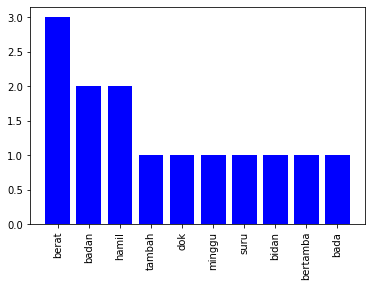

Similar Questions
{'hamil': 4, 'berat': 4, 'badan': 4, 'siang': 2, 'terima': 2, 'kasih': 2, 'cepat': 1, 'tnggi': 1, 'biar': 1, 'usia': 1, 'pengaruh': 1, 'anak': 1, 'kg': 1, 'tb': 1}


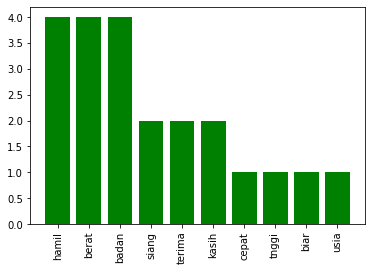



Question
{'gadis': 4, 'mental': 2, 'disorder': 2, 'dekat': 2, 'ruang': 2, 'meja': 2, 'dalam': 2, 'toilet': 2, 'salam': 1, 'cantik': 1, 'umur': 1, 'ajak': 1, 'obrol': 1, 'dia': 1, 'bicara': 1, 'patah': 1, 'tertawa': 1, 'muka': 1, 'merah': 1, 'luar': 1, 'kantor': 1, 'habis': 1, 'makan': 1, 'siang': 1, 'kejar': 1, 'maksud': 1, 'cakap': 1, 'langsung': 1, 'lari': 1, 'tunggu': 1, 'pergi': 1, 'jadi': 1, 'tindak': 1, 'iya': 1, 'masuk': 1, 'klasifikasi': 1, 'mana': 1, 'terima': 1, 'kasih': 1}


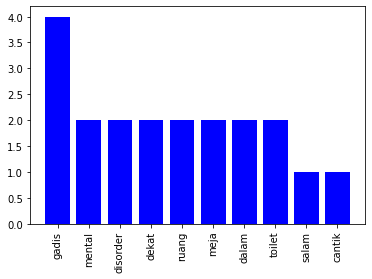

Similar Questions
{'nya': 7, 'alami': 5, 'monster': 4, 'cemas': 3, 'lemah': 3, 'cerita': 3, 'sulit': 2, 'tidur': 2, 'daya': 2, 'dok': 2, 'keluarga': 2, 'keras': 2, 'nyaman': 2, 'sakit': 2, 'bicara': 2, 'kah': 2, 'orang': 2, 'gadis': 1, 'umur': 1, 'an': 1, 'ayah': 1, 'dua': 1, 'tindak': 1, 'marah': 1, 'fisik': 1, 'kata': 1, 'kali': 1, 'januari': 1, 'suami': 1, 'istri': 1, 'maaf': 1, 'ancam': 1, 'siram': 1, 'air': 1, 'wajah': 1, 'cerai': 1, 'mudah': 1, 'jatuh': 1, 'insomnia': 1, 'rumah': 1, 'kuliah': 1, 'tambah': 1, 'hidup': 1, 'terkadang': 1, 'tertawa': 1, 'menang': 1, 'kadang': 1, 'bingung': 1, 'tulis': 1, 'sadar': 1, 'pikir': 1, 'bcra': 1, 'takut': 1, 'gila': 1, 'tua': 1, 'tinggal': 1, 'ganggu': 1, 'jangka': 1, 'mampu': 1, 'ajar': 1, 'tolong': 1, 'solusi': 1, 'minum': 1, 'obat': 1, 'atas': 1}


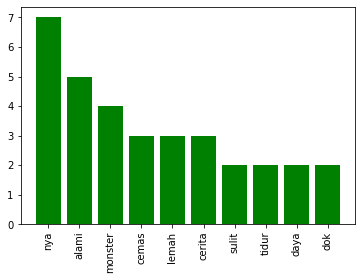

In [12]:
import matplotlib.pyplot as plt

for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    print("Question")
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_count = get_ngram_freq(1, full_query)
    
    question_count = dict(sorted(question_count.items(), key=lambda item: item[1], reverse=True))
    print(question_count)
    plt.bar(list(question_count.keys())[:10], list(question_count.values())[:10], color='b')
    plt.xticks(rotation=90)
    plt.show()
    
    print("Similar Questions")
    text_lst = []
    for error_passage in text_error[i]:
        text_lst.append(error_passage['title']+". "+error_passage['text'])
    passage_count  = get_ngram_freq_lst(1, text_lst)
    passage_count = dict(sorted(passage_count.items(), key=lambda item: item[1], reverse=True))
    print(passage_count)
    plt.bar(list(passage_count.keys())[:10], list(passage_count.values())[:10], color='g')
    plt.xticks(rotation=90)
    plt.show()
    print()
    print()

## Unigram Overlap

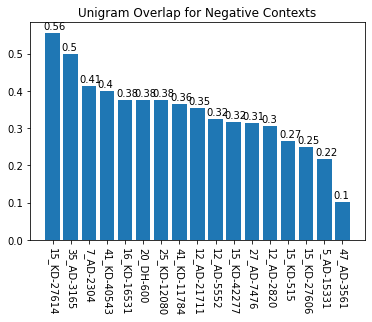

In [13]:
unigram_overlap =  dict()
for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_ngram_cnt = get_ngram_freq(1, full_query)
    qid = gold_data[i]['question']['id']
    for error_passage in text_error[i]:
        pid = error_passage['id']
        row_id = qid+'_'+pid
        full_passage = error_passage['title'] + ". "+error_passage['text']
        passage_ngram_cnt = get_ngram_freq(1, full_passage)
        unigram_overlap[row_id] = get_union_term_cnt_normalized(question_ngram_cnt, passage_ngram_cnt)
unigram_overlap = dict(sorted(unigram_overlap.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(unigram_overlap.keys()), list(unigram_overlap.values()))
xlocs, xlabs = plt.xticks(rotation=270)
plt.title("Unigram Overlap for Negative Contexts")
for i, v in enumerate(list(unigram_overlap.values())):
    plt.text(xlocs[i] - 0.5, v + 0.01, str(round(v, 2)))
plt.show()

## Bigram Analysis

Question
{'maladaptive daydreaming': 2, 'saya buat': 2, 'biasa lamun': 1, 'lamun atau': 1, 'atau khayal': 1, 'khayal cara': 1, 'cara lebih': 1, 'lebih dok': 1, 'dok ini': 1, 'ini saya': 1, 'saya tahu': 1, 'tahu bahwa': 1, 'bahwa saya': 1, 'saya idap': 1, 'idap maladaptive': 1, 'daydreaming terkadang': 1, 'terkadang saya': 1, 'buat cerita': 1, 'cerita lalu': 1, 'lalu peran': 1, 'peran nya': 1, 'nya dan': 1, 'dan terkadang': 1, 'terkadang gera': 1, 'gera saya': 1, 'saya reflek': 1, 'reflek ikut': 1, 'ikut plot': 1, 'plot yang': 1, 'yang saya': 1, 'buat dok': 1, 'dok apakah': 1, 'apakah maladaptive': 1, 'daydreaming kait': 1, 'kait dengan': 1, 'dengan ganggu': 1, 'ganggu jiwa': 1, 'jiwa apa': 1, 'apa saya': 1, 'saya bisa': 1, 'bisa sembuh': 1}


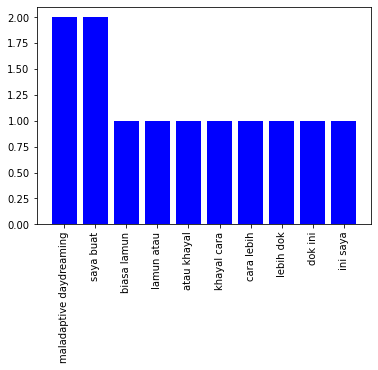

Similar Questions
{'saya alami': 3, 'terkadang saya': 3, 'rasa aneh': 1, 'aneh kepada': 1, 'kepada diri': 1, 'diri sendiri': 1, 'sendiri apakah': 1, 'apakah gejala': 1, 'gejala ocd': 1, 'ocd dok': 1, 'dok sudah': 1, 'sudah saya': 1, 'alami hal': 1, 'hal seperti': 1, 'seperti ini': 1, 'ini terkadang': 1, 'saya ting': 1, 'ting aneh': 1, 'aneh terkadang': 1, 'saya rasa': 1, 'rasa bahwa': 1, 'bahwa ini': 1, 'ini bukan': 1, 'bukan diri': 1, 'diri saya': 1, 'saya benar': 1, 'benar dan': 1, 'dan saya': 1, 'saya laku': 1, 'laku hal': 1, 'hal ini': 1, 'ini dengan': 1, 'dengan sadar': 1, 'sadar walau': 1, 'walau saya': 1, 'saya sudah': 1, 'sudah ucap': 1, 'ucap istigfhar': 1, 'istigfhar tetapi': 1, 'tetapi tetap': 1, 'tetap saja': 1, 'saja saya': 1, 'saya tidak': 1, 'tidak bisa': 1, 'bisa kendali': 1, 'kendali terkadang': 1, 'saya heran': 1, 'heran kenapa': 1, 'kenapa saya': 1, 'saya ini': 1, 'ini pernah': 1, 'pernah coba': 1, 'coba obat': 1, 'obat pada': 1, 'pada orang': 1, 'orang pintar': 1, '

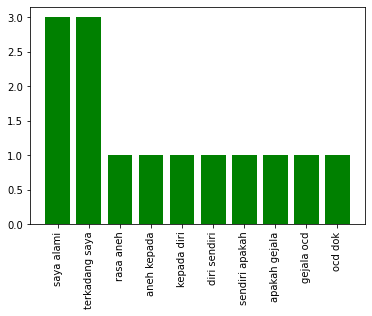



Question
{'patah tulang': 1, 'tulang dapat': 1, 'dapat sambung': 1, 'sambung sore': 1, 'sore dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya apakah': 1, 'apakah tulang': 1, 'tulang yang': 1, 'yang patah': 1, 'patah ada': 1, 'ada mungkin': 1, 'mungkin tidak': 1, 'tidak tumbuh': 1, 'tumbuh sambung': 1, 'sambung apakah': 1, 'apakah arti': 1, 'arti dari': 1, 'dari tidak': 1, 'tidak tampak': 1, 'tampak reaksi': 1, 'reaksi dan': 1, 'dan berapa': 1, 'berapa lama': 1, 'lama tulang': 1, 'tulang bisa': 1, 'bisa sambung': 1, 'sambung dan': 1, 'dan kuat': 1, 'kuat terima': 1, 'terima kasih': 1, 'kasih dok': 1}


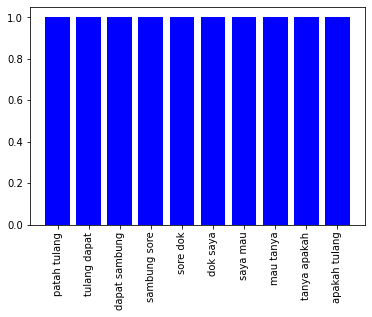

Similar Questions
{'bisa sebab': 2, 'sebab kanker': 2, 'kanker tulang': 2, 'tulang dok': 2, 'apa patah': 1, 'patah tulang': 1, 'tulang bisa': 1, 'dok tahun': 1, 'tahun lalu': 1, 'lalu saya': 1, 'saya pernah': 1, 'pernah serempet': 1, 'serempet dengan': 1, 'dengan motor': 1, 'motor terus': 1, 'terus saya': 1, 'saya kiri': 1, 'kiri saya': 1, 'saya patah': 1, 'patah dan': 1, 'dan engsel': 1, 'engsel na': 1, 'na geser': 1, 'geser alhamdulillah': 1, 'alhamdulillah yang': 1, 'yang patah': 1, 'patah sudah': 1, 'sudah mulai': 1, 'mulai yang': 1, 'yang engsel': 1, 'engsel ni': 1, 'ni masih': 1, 'masih asa': 1, 'asa sakit': 1, 'sakit apakah': 1, 'apakah ini': 1, 'ini bisa': 1}


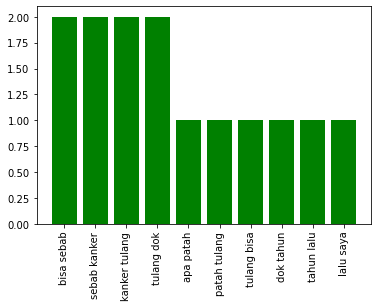



Question
{'tulang kering': 3, 'bentur sepeda': 2, 'sepeda motor': 2, 'kering sakit': 1, 'sakit akibat': 1, 'akibat bentur': 1, 'motor bahaya': 1, 'bahaya siang': 1, 'siang dok': 1, 'dok jadi': 1, 'jadi beberapa': 1, 'beberapa bulan': 1, 'bulan yang': 1, 'yang lalu': 1, 'lalu tulang': 1, 'kering saya': 1, 'saya bentur': 1, 'motor lalu': 1, 'lalu muncul': 1, 'muncul bengkak': 1, 'bengkak dan': 1, 'dan lebam': 1, 'lebam seperti': 1, 'seperti biasa': 1, 'biasa telah': 1, 'telah bentur': 1, 'bentur lebam': 1, 'lebam itu': 1, 'itu hilang': 1, 'hilang iring': 1, 'iring waktu': 1, 'waktu namun': 1, 'namun rasa': 1, 'rasa sakit': 1, 'sakit bila': 1, 'bila sentuh': 1, 'sentuh dan': 1, 'dan bila': 1, 'bila pakai': 1, 'pakai untuk': 1, 'untuk turun': 1, 'turun tangga': 1, 'tangga masih': 1, 'masih asa': 1, 'asa di': 1, 'di kaki': 1, 'kaki khusus': 1, 'khusus di': 1, 'di tulang': 1, 'kering apakah': 1, 'apakah itu': 1, 'itu bahaya': 1, 'bahaya dok': 1, 'dok terima': 1, 'terima kasih': 1}


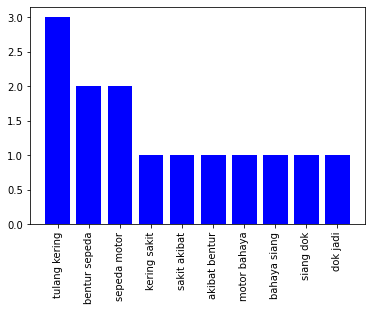

Similar Questions
{'telapak kaki': 4, 'kaki saya': 3, 'malam dok': 2, 'dok saya': 2, 'terima kasih': 2, 'panas dan': 2, 'dan nyeri': 2, 'turun dari': 2, 'kenapa ya': 2, 'ya dok': 2, 'kaki juga': 2, 'jempol kaki': 2, 'retak tulang': 1, 'tulang pada': 1, 'pada telapak': 1, 'kaki selamat': 1, 'selamat malam': 1, 'saya ingin': 1, 'ingin tanya': 1, 'tanya suami': 1, 'suami saya': 1, 'saya retak': 1, 'retak telapak': 1, 'kaki kiri': 1, 'kiri karena': 1, 'karena lindas': 1, 'lindas ban': 1, 'ban mobil': 1, 'mobil muat': 1, 'muat ton': 1, 'ton dan': 1, 'dan kini': 1, 'kini proses': 1, 'proses sembuh': 1, 'sembuh iring': 1, 'iring jalan': 1, 'jalan sudah': 1, 'sudah bulan': 1, 'bulan kaki': 1, 'kaki nya': 1, 'nya masih': 1, 'masih bengkak': 1, 'bengkak dan': 1, 'dan bawa': 1, 'bawa jalan': 1, 'jalan masih': 1, 'masih sakit': 1, 'sakit nyeri': 1, 'nyeri dan': 1, 'dan lebam': 1, 'lebam yang': 1, 'yang tidak': 1, 'tidak hilang': 1, 'hilang kak': 1, 'kak mohon': 1, 'mohon bantu': 1, 'bantu dan': 1,

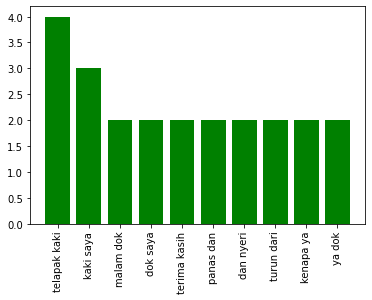



Question
{'makan mi': 2, 'mi instan': 2, 'tiap hari': 2, 'bahaya makan': 1, 'instan tiap': 1, 'hari dok': 1, 'dok bahaya': 1, 'bahaya tidak': 1, 'tidak saya': 1, 'saya selalu': 1, 'selalu makan': 1, 'instan hampir': 1, 'hampir tiap': 1, 'hari atau': 1, 'atau terkadang': 1, 'terkadang saya': 1, 'saya konsumsi': 1, 'konsumsi hari': 1, 'hari bisa': 1, 'bisa dua': 1, 'dua sampai': 1, 'sampai tiga': 1, 'tiga kali': 1, 'kali maklum': 1, 'maklum dok': 1, 'dok saya': 1, 'saya anak': 1, 'anak kost': 1, 'kost rantau': 1, 'rantau dari': 1, 'dari seberang': 1}


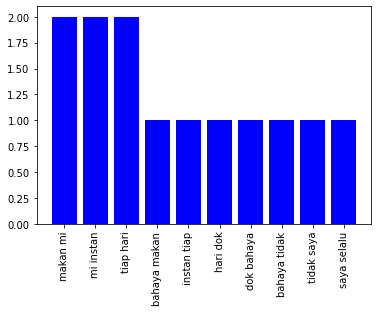

Similar Questions
{'mie instan': 7, 'konsumsi mie': 5, 'ibu hamil': 3, 'saat hamil': 3, 'apakah benar': 2, 'tidak boleh': 2, 'boleh konsumsi': 2, 'terima kasih': 2, 'instan saat': 2, 'mau tanya': 2, 'makan mie': 2, 'konsumsi mi': 1, 'mi instan': 1, 'instan untuk': 1, 'untuk ibu': 1, 'hamil hallo': 1, 'hallo dok': 1, 'dok apakah': 1, 'benar saat': 1, 'hamil tidak': 1, 'mie baik': 1, 'baik itu': 1, 'itu mie': 1, 'mie instant': 1, 'instant mie': 1, 'mie ayam': 1, 'ayam atau': 1, 'atau mie': 1, 'mie yang': 1, 'yang lain': 1, 'lain dan': 1, 'dan apakah': 1, 'benar tidak': 1, 'konsumsi makan': 1, 'makan atau': 1, 'atau minum': 1, 'minum dingin': 1, 'dingin seperti': 1, 'seperti eskrim': 1, 'eskrim atau': 1, 'atau air': 1, 'air es': 1, 'es lalu': 1, 'lalu apakah': 1, 'apakah anjur': 1, 'anjur konsumsi': 1, 'konsumsi yang': 1, 'yang balik': 1, 'balik yaitu': 1, 'yaitu makan': 1, 'makan dan': 1, 'dan minum': 1, 'minum terima': 1, 'instan pagi': 1, 'pagi dok': 1, 'dok benar': 1, 'benar konsumsi'

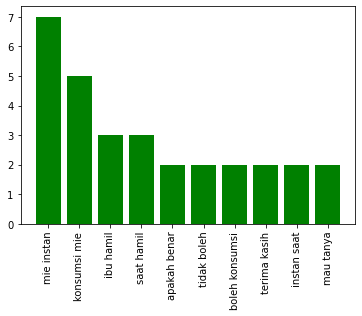



Question
{'kena belek': 2, 'atas ganggu': 1, 'ganggu lihat': 1, 'lihat usai': 1, 'usai kena': 1, 'belek dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya soal': 1, 'soal mata': 1, 'mata saya': 1, 'saya minggu': 1, 'minggu lalu': 1, 'lalu saya': 1, 'saya kena': 1, 'belek dan': 1, 'dan sekarang': 1, 'sekarang sudah': 1, 'sudah hilang': 1, 'hilang belek': 1, 'belek akan': 1, 'akan tetapi': 1, 'tetapi lihat': 1, 'lihat saya': 1, 'saya jadi': 1, 'jadi agak': 1, 'agak kurang': 1, 'kurang jelas': 1, 'jelas apa': 1, 'apa yang': 1, 'yang harus': 1, 'harus saya': 1, 'saya laku': 1, 'laku dok': 1, 'dok apa': 1, 'apa ada': 1, 'ada cara': 1, 'cara alami': 1, 'alami sembuh': 1, 'sembuh supaya': 1, 'supaya kembali': 1, 'kembali normal': 1, 'normal terima': 1, 'terima kasih': 1, 'kasih dok': 1, 'dok info': 1, 'info dan': 1, 'dan saran': 1}


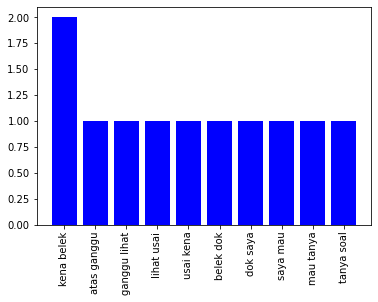

Similar Questions
{'yang ganjal': 2, 'mata saya': 2, 'asa ada': 1, 'ada yang': 1, 'ganjal pada': 1, 'pada mata': 1, 'mata dok': 1, 'dok saya': 1, 'saya rasa': 1, 'rasa seperti': 1, 'seperti ada': 1, 'ada partikel': 1, 'partikel yang': 1, 'ganjal di': 1, 'di mata': 1, 'mata kanan': 1, 'kanan saya': 1, 'saya lama': 1, 'lama hari': 1, 'hari ini': 1, 'ini jika': 1, 'jika mata': 1, 'saya kedip': 1, 'kedip atau': 1, 'atau tutup': 1, 'tutup masalah': 1, 'masalah apa': 1, 'apa yang': 1, 'yang mata': 1, 'saya alami': 1, 'alami ya': 1, 'ya dok': 1, 'dok terima': 1, 'terima kasih': 1}


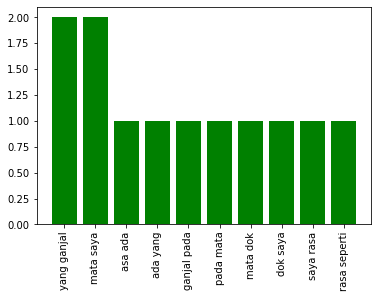



Question
{'yang saya': 4, 'sulit nafas': 3, 'saya sering': 3, 'serang panik': 2, 'dan sulit': 2, 'tetapi saya': 2, 'saya tidak': 2, 'apa yang': 2, 'nafas dan': 2, 'juga saya': 2, 'saya juga': 2, 'sekarang saya': 2, 'saya masih': 2, 'sering rasa': 2, 'denyut keras': 2, 'dan saya': 2, 'beberapa artikel': 2, 'bahwa yang': 2, 'saya rasa': 2, 'gejala dari': 2, 'panik dan': 1, 'nafas malam': 1, 'malam dokter': 1, 'dokter sudah': 1, 'sudah beberapa': 1, 'beberapa bulan': 1, 'bulan ini': 1, 'ini saya': 1, 'sering alami': 1, 'alami serang': 1, 'panik kepala': 1, 'kepala saya': 1, 'sering sakit': 1, 'sakit dan': 1, 'dan sering': 1, 'sering cemas': 1, 'cemas tetapi': 1, 'tidak tahu': 1, 'tahu apa': 1, 'saya cemas': 1, 'cemas biasa': 1, 'biasa kalau': 1, 'kalau sedang': 1, 'sedang kambuh': 1, 'kambuh badan': 1, 'badan asa': 1, 'asa gemetar': 1, 'gemetar meriang': 1, 'meriang dingin': 1, 'dingin sulit': 1, 'dan sakit': 1, 'sakit dada': 1, 'dada fikiran': 1, 'fikiran saya': 1, 'tidak tenang': 1, '

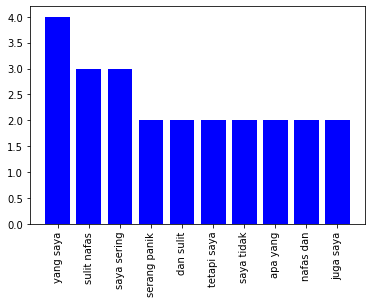

Similar Questions
{'sakit apa': 2, 'sering sakit': 1, 'sakit di': 1, 'di dada': 1, 'dada dan': 1, 'dan migrain': 1, 'migrain saya': 1, 'saya sakit': 1, 'apa pagi': 1, 'pagi dok': 1, 'dok sejak': 1, 'sejak bulan': 1, 'bulan lalu': 1, 'lalu saya': 1, 'saya sering': 1, 'sering rasa': 1, 'rasa panas': 1, 'panas dan': 1, 'dan sakit': 1, 'sakit pada': 1, 'pada dada': 1, 'dada pindah': 1, 'pindah pindah': 1, 'pindah tempat': 1, 'tempat turut': 1, 'turut dokter': 1, 'dokter internist': 1, 'internist karena': 1, 'karena karena': 1, 'karena gas': 1, 'gas lambung': 1, 'lambung yang': 1, 'yang naik': 1, 'naik dan': 1, 'dan serta': 1, 'serta rasa': 1, 'rasa panik': 1, 'panik cara': 1, 'cara serang': 1, 'serang ini': 1, 'ini sering': 1, 'sering muncul': 1, 'muncul dalam': 1, 'dalam waktu': 1, 'waktu yang': 1, 'yang acak': 1, 'acak waktu': 1, 'waktu dan': 1, 'dan sejak': 1, 'sejak minggu': 1, 'minggu akhir': 1, 'akhir keluh': 1, 'keluh tambah': 1, 'tambah dengan': 1, 'dengan ada': 1, 'ada migrain': 1

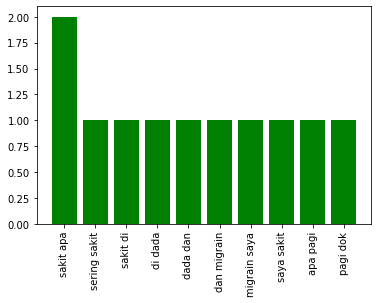



Question
{'beberapa bulan': 2, 'dari tenggorok': 2, 'flu dan': 2, 'lendir dalam': 1, 'dalam tenggoroka': 1, 'tenggoroka yang': 1, 'yang sudah': 1, 'sudah lama': 1, 'lama saya': 1, 'saya sudah': 1, 'sudah lebih': 1, 'lebih beberapa': 1, 'bulan dok': 1, 'dok selalu': 1, 'selalu keluar': 1, 'keluar lendir': 1, 'lendir dari': 1, 'tenggorok dan': 1, 'dan asa': 1, 'asa skl': 1, 'skl kalau': 1, 'kalau tenggorok': 1, 'tenggorok ada': 1, 'ada lendir': 1, 'lendir saya': 1, 'saya tidak': 1, 'tidak lagi': 1, 'lagi flu': 1, 'dan beberapa': 1, 'bulan tidak': 1, 'tidak pernah': 1, 'pernah flu': 1, 'dan ada': 1, 'ada bau': 1, 'bau sengat': 1, 'sengat yang': 1, 'yang keluar': 1, 'keluar dari': 1, 'tenggorok itu': 1, 'itu sakit': 1, 'sakit apa': 1, 'apa biasa': 1, 'biasa dok': 1}


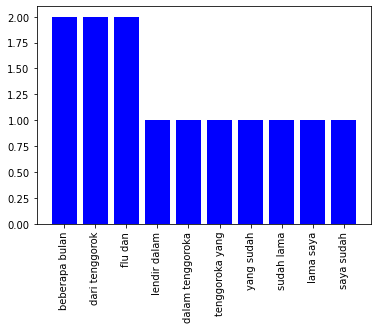

Similar Questions
{'lendir warna': 2, 'warna hijau': 2, 'ada yang': 2, 'flu dan': 1, 'dan lendir': 1, 'hijau kemari': 1, 'kemari hari': 1, 'hari rabu': 1, 'rabu saya': 1, 'saya baru': 1, 'baru pulang': 1, 'pulang dari': 1, 'dari bal': 1, 'bal esok': 1, 'esok hari': 1, 'hari badan': 1, 'badan saya': 1, 'saya panas': 1, 'panas tenggorok': 1, 'tenggorok kering': 1, 'kering sedikit': 1, 'sedikit susah': 1, 'susah tel': 1, 'tel dan': 1, 'dan pilek': 1, 'pilek yang': 1, 'yang lumayan': 1, 'lumayan ada': 1, 'yang bilang': 1, 'bilang ini': 1, 'ini capek': 1, 'capek tetapi': 1, 'tetapi sampai': 1, 'sampai hari': 1, 'hari ini': 1, 'ini pun': 1, 'pun belum': 1, 'belum kunjung': 1, 'kunjung sembuh': 1, 'sembuh pilek': 1, 'pilek malah': 1, 'malah lebih': 1, 'lebih parah': 1, 'parah lendir': 1, 'hijau dan': 1, 'dan selalu': 1, 'selalu ketika': 1, 'ketika saya': 1, 'saya bangun': 1, 'bangun tidur': 1, 'tidur kotor': 1, 'kotor mata': 1, 'mata jadi': 1, 'jadi banyak': 1, 'banyak kadang': 1, 'kadang jad

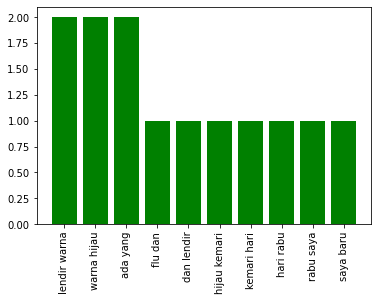



Question
{'keringat saat': 1, 'saat sakit': 1, 'sakit dok': 1, 'dok saya': 1, 'saya sengaja': 1, 'sengaja mati': 1, 'mati ac': 1, 'ac ruang': 1, 'ruang kerja': 1, 'kerja saya': 1, 'saya karena': 1, 'karena saya': 1, 'saya sedang': 1, 'sedang batuk': 1, 'batuk dan': 1, 'dan demam': 1, 'demam keringat': 1, 'keringat keluar': 1, 'keluar banyak': 1, 'banyak bareng': 1, 'bareng dengan': 1, 'dengan banyak': 1, 'banyak minum': 1, 'minum sambil': 1, 'sambil kerja': 1, 'kerja apakah': 1, 'apakah keringat': 1, 'keringat ini': 1, 'ini sehat': 1, 'sehat dok': 1}


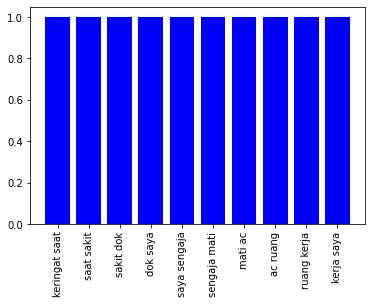

Similar Questions
{'keringat dingin': 2, 'dingin sesak': 2, 'sesak nafas': 2, 'nafas perut': 1, 'perut tidak': 1, 'tidak nyaman': 1, 'nyaman dan': 1, 'dan cemas': 1, 'cemas dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya kenpa': 1, 'kenpa saya': 1, 'saya sering': 1, 'sering keringat': 1, 'nafas dan': 1, 'dan sedikit': 1, 'sedikit tidak': 1, 'tidak rasa': 1, 'rasa nyaman': 1, 'nyaman perut': 1, 'perut dan': 1, 'dan asa': 1, 'asa cemas': 1, 'cemas dan': 1, 'dan saya': 1, 'saya sudah': 1, 'sudah periksa': 1, 'periksa dokter': 1, 'dokter dan': 1, 'dan kata': 1, 'kata sakit': 1, 'sakit maag': 1, 'maag dan': 1, 'dan dia': 1, 'dia beri': 1, 'beri obat': 1, 'obat tetapi': 1, 'tetapi sakit': 1, 'sakit yang': 1, 'yang saya': 1, 'saya rasa': 1, 'rasa tidak': 1, 'tidak juga': 1, 'juga baik': 1, 'baik betul': 1, 'betul sakit': 1, 'sakit apa': 1, 'apa saya': 1, 'saya dok': 1, 'dok dan': 1, 'dan apa': 1, 'apa obat': 1, 'obat terima': 1, 'terima kasih': 1, 'kasih dok': 1}


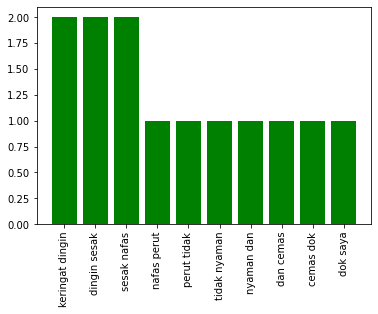



Question
{'telapak tangan': 3, 'kulit luar': 2, 'tangan saya': 2, 'tangan gatal': 1, 'gatal dan': 1, 'dan lapis': 1, 'lapis kulit': 1, 'luar kelupas': 1, 'kelupas dok': 1, 'dok telapak': 1, 'saya ini': 1, 'ini banyak': 1, 'banyak bintik': 1, 'bintik merah': 1, 'merah terus': 1, 'terus kulit': 1, 'luar telapak': 1, 'tangan kelupas': 1, 'kelupas sudah': 1, 'sudah kali': 1, 'kali saya': 1, 'saya alami': 1, 'alami ini': 1, 'ini dok': 1, 'dok dulu': 1, 'dulu sembuh': 1, 'sembuh bulan': 1, 'bulan lebih': 1, 'lebih saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya solusi': 1, 'solusi dari': 1, 'dari dokter': 1, 'dokter dan': 1, 'dan sakit': 1, 'sakit apa': 1, 'apa yang': 1, 'yang ada': 1, 'ada di': 1, 'di telapak': 1, 'saya dan': 1, 'dan anjur': 1, 'anjur obat': 1, 'obat jika': 1, 'jika perlu': 1, 'perlu terima': 1, 'terima kasih': 1}


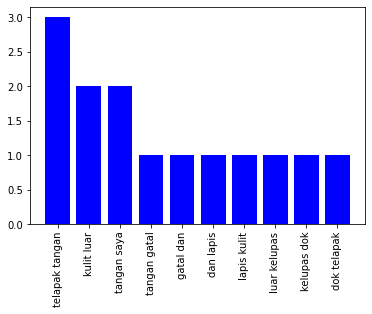

Similar Questions
{'kelupas dan': 2, 'kulit kelupas': 1, 'dan gatal': 1, 'gatal selamat': 1, 'selamat siang': 1, 'siang dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya saya': 1, 'saya pakai': 1, 'pakai cream': 1, 'cream dari': 1, 'dari pure': 1, 'pure kenapa': 1, 'kenapa kulit': 1, 'kulit wajah': 1, 'wajah saya': 1, 'saya kelupas': 1, 'dan juga': 1, 'juga sedikit': 1, 'sedikit gatal': 1, 'gatal itu': 1, 'itu saya': 1, 'saya cocok': 1, 'cocok apa': 1, 'apa tidak': 1, 'tidak ya': 1, 'ya dok': 1, 'dok terima': 1, 'terima kasih': 1}


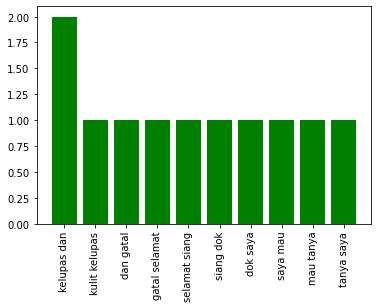



Question
{'berat badan': 2, 'tambah berat': 1, 'badan saat': 1, 'saat hamil': 1, 'hamil dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya saya': 1, 'saya hamil': 1, 'hamil minggu': 1, 'minggu terus': 1, 'terus di': 1, 'di suru': 1, 'suru sama': 1, 'sama bidan': 1, 'bidan agar': 1, 'agar berat': 1, 'badan saya': 1, 'saya itu': 1, 'itu harus': 1, 'harus bertamba': 1, 'bertamba kok': 1, 'kok berat': 1, 'berat bada': 1, 'bada saya': 1, 'saya tidak': 1, 'tidak biasa': 1, 'biasa naik': 1, 'naik padahal': 1, 'padahal sudah': 1, 'sudah usahain': 1, 'usahain sering': 1, 'sering makan': 1, 'makan dan': 1, 'dan komsusi': 1, 'komsusi buah': 1}


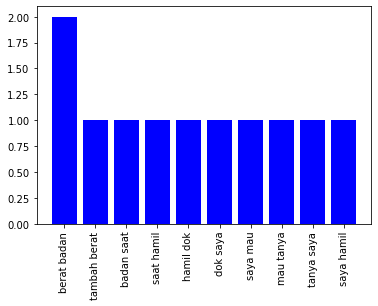

Similar Questions
{'berat badan': 4, 'siang tanya': 2, 'tanya apakah': 2, 'apakah berat': 2, 'bisa hamil': 2, 'terima kasih': 2, 'ingin cepat': 1, 'cepat hamil': 1, 'hamil siang': 1, 'badan tnggi': 1, 'tnggi cuma': 1, 'cuma bisa': 1, 'hamil bagaimana': 1, 'bagaimana biar': 1, 'biar saya': 1, 'saya bisa': 1, 'hamil terima': 1, 'ingin hamil': 1, 'hamil dan': 1, 'dan berat': 1, 'badan kurang': 1, 'kurang siang': 1, 'badan usia': 1, 'usia pengaruh': 1, 'pengaruh untuk': 1, 'untuk punya': 1, 'punya anak': 1, 'anak berat': 1, 'badan saya': 1, 'saya kg': 1, 'kg tb': 1, 'tb cuma': 1, 'cuma terima': 1}


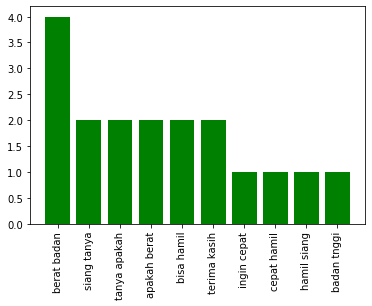



Question
{'mental disorder': 2, 'gadis sebut': 2, 'disorder atau': 1, 'atau tidak': 1, 'tidak salam': 1, 'salam saya': 1, 'saya ada': 1, 'ada pernah': 1, 'pernah dekat': 1, 'dekat dengan': 1, 'dengan orang': 1, 'orang gadis': 1, 'gadis cantik': 1, 'cantik sekitar': 1, 'sekitar umur': 1, 'umur atau': 1, 'atau tahun': 1, 'tahun tetapi': 1, 'tetapi saat': 1, 'saat saya': 1, 'saya ajak': 1, 'ajak obrol': 1, 'obrol hanya': 1, 'hanya saja': 1, 'saja dia': 1, 'dia cuma': 1, 'cuma bicara': 1, 'bicara patah': 1, 'patah kata': 1, 'kata waktu': 1, 'waktu itu': 1, 'itu sambil': 1, 'sambil tertawa': 1, 'tertawa dengan': 1, 'dengan muka': 1, 'muka merah': 1, 'merah lalu': 1, 'lalu gadis': 1, 'gadis itu': 1, 'itu waktu': 1, 'waktu luar': 1, 'luar kantor': 1, 'kantor habis': 1, 'habis makan': 1, 'makan siang': 1, 'siang tuju': 1, 'tuju ruang': 1, 'ruang ke': 1, 'ke meja': 1, 'meja saya': 1, 'saya sempat': 1, 'sempat kejar': 1, 'kejar dengan': 1, 'dengan maksud': 1, 'maksud ada': 1, 'ada cakap': 1, '

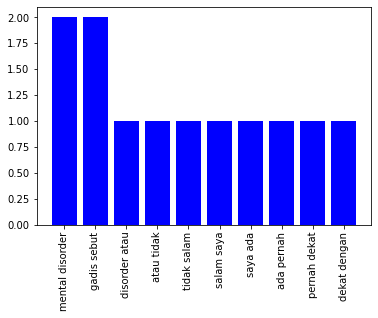

Similar Questions
{'saya alami': 3, 'ibu saya': 3, 'buat saya': 3, 'saya tidak': 3, 'daya ingat': 2, 'keluarga saya': 2, 'saya sering': 2, 'saat ini': 2, 'saya rasa': 2, 'ini saya': 2, 'dari belum': 2, 'belum nya': 2, 'tidak bisa': 2, 'diri saya': 2, 'saya karena': 2, 'monster itu': 2, 'tanpa sebab': 2, 'cerita ini': 2, 'saat saya': 2, 'lemah nya': 2, 'sulit tidur': 1, 'tidur sering': 1, 'sering rasa': 1, 'rasa cemas': 1, 'cemas dan': 1, 'dan daya': 1, 'ingat lemah': 1, 'lemah dok': 1, 'dok saya': 1, 'saya gadis': 1, 'gadis di': 1, 'di umur': 1, 'umur tahun': 1, 'tahun an': 1, 'an saya': 1, 'alami masalah': 1, 'masalah dengan': 1, 'dengan keluarga': 1, 'saya ayah': 1, 'ayah saya': 1, 'sering dua': 1, 'dua ibu': 1, 'saya dan': 1, 'dan tindak': 1, 'tindak keras': 1, 'keras kepada': 1, 'kepada kami': 1, 'kami saat': 1, 'saat marah': 1, 'marah fisik': 1, 'fisik maupun': 1, 'maupun kata': 1, 'kata akhir': 1, 'akhir kali': 1, 'kali masalah': 1, 'masalah yang': 1, 'yang keluarga': 1, 'alami a

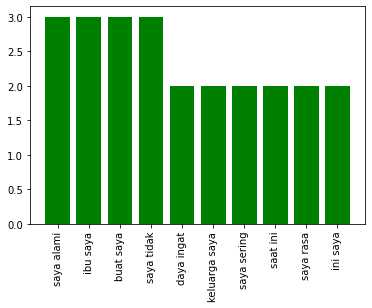

In [14]:
for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    print("Question")
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_count = get_ngram_freq(2, full_query)
    question_count = dict(sorted(question_count.items(), key=lambda item: item[1], reverse=True))
    print(question_count)
    plt.bar(list(question_count.keys())[:10], list(question_count.values())[:10], color='b')
    plt.xticks(rotation=90)
    plt.show()
    
    print("Similar Questions")
    text_lst = []
    for error_passage in text_error[i]:
        text_lst.append(error_passage['title']+". "+error_passage['text'])
    passage_count  = get_ngram_freq_lst(2, text_lst)
    passage_count = dict(sorted(passage_count.items(), key=lambda item: item[1], reverse=True))
    print(passage_count)
    plt.bar(list(passage_count.keys())[:10], list(passage_count.values())[:10], color='g')
    plt.xticks(rotation=90)
    plt.show()
    print()
    print()

## Bigram Overlap

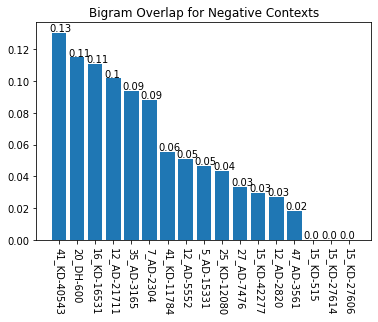

In [15]:
bigram_overlap =  dict()
for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_ngram_cnt = get_ngram_freq(2, full_query)
    qid = gold_data[i]['question']['id']
    for error_passage in text_error[i]:
        pid = error_passage['id']
        row_id = qid+'_'+pid
        full_passage = error_passage['title'] + ". "+error_passage['text']
        passage_ngram_cnt = get_ngram_freq(2, full_passage)
        bigram_overlap[row_id] = get_union_term_cnt_normalized(question_ngram_cnt, passage_ngram_cnt)
bigram_overlap = dict(sorted(bigram_overlap.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(bigram_overlap.keys()), list(bigram_overlap.values()))
xlocs, xlabs = plt.xticks(rotation=270)
plt.title("Bigram Overlap for Negative Contexts")
for i, v in enumerate(list(bigram_overlap.values())):
    plt.text(xlocs[i] - 0.5, v + 0.001, str(round(v, 2)))
plt.show()

## Trigram Analysis

Question
{'biasa lamun atau': 1, 'lamun atau khayal': 1, 'atau khayal cara': 1, 'khayal cara lebih': 1, 'cara lebih dok': 1, 'lebih dok ini': 1, 'dok ini saya': 1, 'ini saya tahu': 1, 'saya tahu bahwa': 1, 'tahu bahwa saya': 1, 'bahwa saya idap': 1, 'saya idap maladaptive': 1, 'idap maladaptive daydreaming': 1, 'maladaptive daydreaming terkadang': 1, 'daydreaming terkadang saya': 1, 'terkadang saya buat': 1, 'saya buat cerita': 1, 'buat cerita lalu': 1, 'cerita lalu peran': 1, 'lalu peran nya': 1, 'peran nya dan': 1, 'nya dan terkadang': 1, 'dan terkadang gera': 1, 'terkadang gera saya': 1, 'gera saya reflek': 1, 'saya reflek ikut': 1, 'reflek ikut plot': 1, 'ikut plot yang': 1, 'plot yang saya': 1, 'yang saya buat': 1, 'saya buat dok': 1, 'buat dok apakah': 1, 'dok apakah maladaptive': 1, 'apakah maladaptive daydreaming': 1, 'maladaptive daydreaming kait': 1, 'daydreaming kait dengan': 1, 'kait dengan ganggu': 1, 'dengan ganggu jiwa': 1, 'ganggu jiwa apa': 1, 'jiwa apa saya': 1, 'apa 

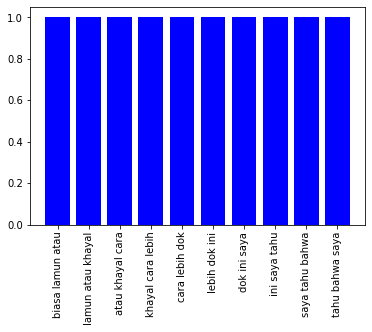

Similar Questions
{'rasa aneh kepada': 1, 'aneh kepada diri': 1, 'kepada diri sendiri': 1, 'diri sendiri apakah': 1, 'sendiri apakah gejala': 1, 'apakah gejala ocd': 1, 'gejala ocd dok': 1, 'ocd dok sudah': 1, 'dok sudah saya': 1, 'sudah saya alami': 1, 'saya alami hal': 1, 'alami hal seperti': 1, 'hal seperti ini': 1, 'seperti ini terkadang': 1, 'ini terkadang saya': 1, 'terkadang saya ting': 1, 'saya ting aneh': 1, 'ting aneh terkadang': 1, 'aneh terkadang saya': 1, 'terkadang saya rasa': 1, 'saya rasa bahwa': 1, 'rasa bahwa ini': 1, 'bahwa ini bukan': 1, 'ini bukan diri': 1, 'bukan diri saya': 1, 'diri saya benar': 1, 'saya benar dan': 1, 'benar dan saya': 1, 'dan saya laku': 1, 'saya laku hal': 1, 'laku hal ini': 1, 'hal ini dengan': 1, 'ini dengan sadar': 1, 'dengan sadar walau': 1, 'sadar walau saya': 1, 'walau saya sudah': 1, 'saya sudah ucap': 1, 'sudah ucap istigfhar': 1, 'ucap istigfhar tetapi': 1, 'istigfhar tetapi tetap': 1, 'tetapi tetap saja': 1, 'tetap saja saya': 1, 'sa

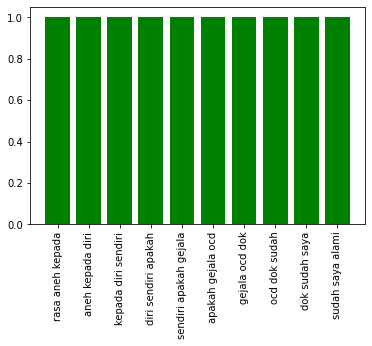



Question
{'patah tulang dapat': 1, 'tulang dapat sambung': 1, 'dapat sambung sore': 1, 'sambung sore dok': 1, 'sore dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya apakah': 1, 'tanya apakah tulang': 1, 'apakah tulang yang': 1, 'tulang yang patah': 1, 'yang patah ada': 1, 'patah ada mungkin': 1, 'ada mungkin tidak': 1, 'mungkin tidak tumbuh': 1, 'tidak tumbuh sambung': 1, 'tumbuh sambung apakah': 1, 'sambung apakah arti': 1, 'apakah arti dari': 1, 'arti dari tidak': 1, 'dari tidak tampak': 1, 'tidak tampak reaksi': 1, 'tampak reaksi dan': 1, 'reaksi dan berapa': 1, 'dan berapa lama': 1, 'berapa lama tulang': 1, 'lama tulang bisa': 1, 'tulang bisa sambung': 1, 'bisa sambung dan': 1, 'sambung dan kuat': 1, 'dan kuat terima': 1, 'kuat terima kasih': 1, 'terima kasih dok': 1}


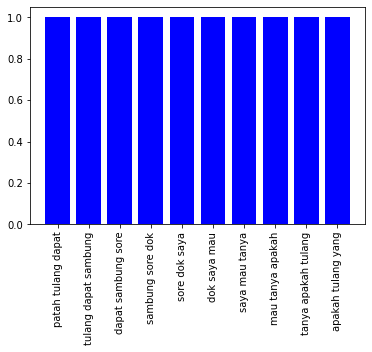

Similar Questions
{'bisa sebab kanker': 2, 'sebab kanker tulang': 2, 'kanker tulang dok': 2, 'apa patah tulang': 1, 'patah tulang bisa': 1, 'tulang bisa sebab': 1, 'tulang dok tahun': 1, 'dok tahun lalu': 1, 'tahun lalu saya': 1, 'lalu saya pernah': 1, 'saya pernah serempet': 1, 'pernah serempet dengan': 1, 'serempet dengan motor': 1, 'dengan motor terus': 1, 'motor terus saya': 1, 'terus saya kiri': 1, 'saya kiri saya': 1, 'kiri saya patah': 1, 'saya patah dan': 1, 'patah dan engsel': 1, 'dan engsel na': 1, 'engsel na geser': 1, 'na geser alhamdulillah': 1, 'geser alhamdulillah yang': 1, 'alhamdulillah yang patah': 1, 'yang patah sudah': 1, 'patah sudah mulai': 1, 'sudah mulai yang': 1, 'mulai yang engsel': 1, 'yang engsel ni': 1, 'engsel ni masih': 1, 'ni masih asa': 1, 'masih asa sakit': 1, 'asa sakit apakah': 1, 'sakit apakah ini': 1, 'apakah ini bisa': 1, 'ini bisa sebab': 1}


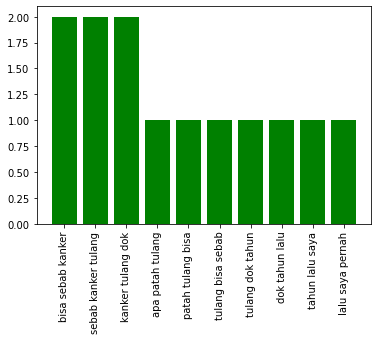



Question
{'bentur sepeda motor': 2, 'tulang kering sakit': 1, 'kering sakit akibat': 1, 'sakit akibat bentur': 1, 'akibat bentur sepeda': 1, 'sepeda motor bahaya': 1, 'motor bahaya siang': 1, 'bahaya siang dok': 1, 'siang dok jadi': 1, 'dok jadi beberapa': 1, 'jadi beberapa bulan': 1, 'beberapa bulan yang': 1, 'bulan yang lalu': 1, 'yang lalu tulang': 1, 'lalu tulang kering': 1, 'tulang kering saya': 1, 'kering saya bentur': 1, 'saya bentur sepeda': 1, 'sepeda motor lalu': 1, 'motor lalu muncul': 1, 'lalu muncul bengkak': 1, 'muncul bengkak dan': 1, 'bengkak dan lebam': 1, 'dan lebam seperti': 1, 'lebam seperti biasa': 1, 'seperti biasa telah': 1, 'biasa telah bentur': 1, 'telah bentur lebam': 1, 'bentur lebam itu': 1, 'lebam itu hilang': 1, 'itu hilang iring': 1, 'hilang iring waktu': 1, 'iring waktu namun': 1, 'waktu namun rasa': 1, 'namun rasa sakit': 1, 'rasa sakit bila': 1, 'sakit bila sentuh': 1, 'bila sentuh dan': 1, 'sentuh dan bila': 1, 'dan bila pakai': 1, 'bila pakai untuk

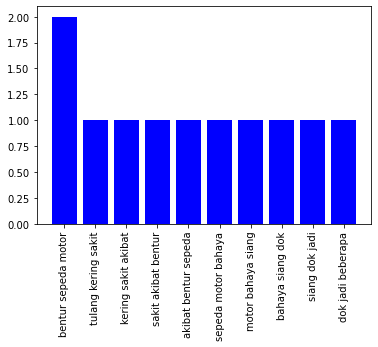

Similar Questions
{'panas dan nyeri': 2, 'kenapa ya dok': 2, 'jempol kaki saya': 2, 'retak tulang pada': 1, 'tulang pada telapak': 1, 'pada telapak kaki': 1, 'telapak kaki selamat': 1, 'kaki selamat malam': 1, 'selamat malam dok': 1, 'malam dok saya': 1, 'dok saya ingin': 1, 'saya ingin tanya': 1, 'ingin tanya suami': 1, 'tanya suami saya': 1, 'suami saya retak': 1, 'saya retak telapak': 1, 'retak telapak kaki': 1, 'telapak kaki kiri': 1, 'kaki kiri karena': 1, 'kiri karena lindas': 1, 'karena lindas ban': 1, 'lindas ban mobil': 1, 'ban mobil muat': 1, 'mobil muat ton': 1, 'muat ton dan': 1, 'ton dan kini': 1, 'dan kini proses': 1, 'kini proses sembuh': 1, 'proses sembuh iring': 1, 'sembuh iring jalan': 1, 'iring jalan sudah': 1, 'jalan sudah bulan': 1, 'sudah bulan kaki': 1, 'bulan kaki nya': 1, 'kaki nya masih': 1, 'nya masih bengkak': 1, 'masih bengkak dan': 1, 'bengkak dan bawa': 1, 'dan bawa jalan': 1, 'bawa jalan masih': 1, 'jalan masih sakit': 1, 'masih sakit nyeri': 1, 'sakit n

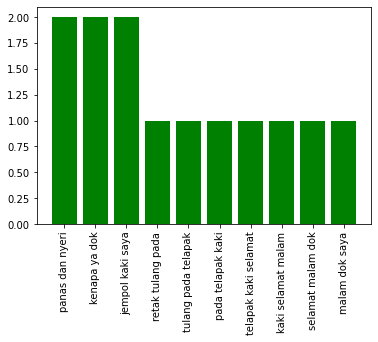



Question
{'makan mi instan': 2, 'bahaya makan mi': 1, 'mi instan tiap': 1, 'instan tiap hari': 1, 'tiap hari dok': 1, 'hari dok bahaya': 1, 'dok bahaya tidak': 1, 'bahaya tidak saya': 1, 'tidak saya selalu': 1, 'saya selalu makan': 1, 'selalu makan mi': 1, 'mi instan hampir': 1, 'instan hampir tiap': 1, 'hampir tiap hari': 1, 'tiap hari atau': 1, 'hari atau terkadang': 1, 'atau terkadang saya': 1, 'terkadang saya konsumsi': 1, 'saya konsumsi hari': 1, 'konsumsi hari bisa': 1, 'hari bisa dua': 1, 'bisa dua sampai': 1, 'dua sampai tiga': 1, 'sampai tiga kali': 1, 'tiga kali maklum': 1, 'kali maklum dok': 1, 'maklum dok saya': 1, 'dok saya anak': 1, 'saya anak kost': 1, 'anak kost rantau': 1, 'kost rantau dari': 1, 'rantau dari seberang': 1}


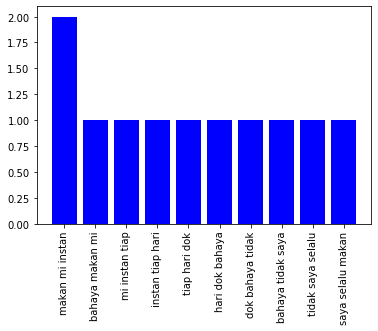

Similar Questions
{'konsumsi mie instan': 4, 'tidak boleh konsumsi': 2, 'mie instan saat': 2, 'instan saat hamil': 2, 'makan mie instan': 2, 'konsumsi mi instan': 1, 'mi instan untuk': 1, 'instan untuk ibu': 1, 'untuk ibu hamil': 1, 'ibu hamil hallo': 1, 'hamil hallo dok': 1, 'hallo dok apakah': 1, 'dok apakah benar': 1, 'apakah benar saat': 1, 'benar saat hamil': 1, 'saat hamil tidak': 1, 'hamil tidak boleh': 1, 'boleh konsumsi mie': 1, 'konsumsi mie baik': 1, 'mie baik itu': 1, 'baik itu mie': 1, 'itu mie instant': 1, 'mie instant mie': 1, 'instant mie ayam': 1, 'mie ayam atau': 1, 'ayam atau mie': 1, 'atau mie yang': 1, 'mie yang lain': 1, 'yang lain dan': 1, 'lain dan apakah': 1, 'dan apakah benar': 1, 'apakah benar tidak': 1, 'benar tidak boleh': 1, 'boleh konsumsi makan': 1, 'konsumsi makan atau': 1, 'makan atau minum': 1, 'atau minum dingin': 1, 'minum dingin seperti': 1, 'dingin seperti eskrim': 1, 'seperti eskrim atau': 1, 'eskrim atau air': 1, 'atau air es': 1, 'air es lalu':

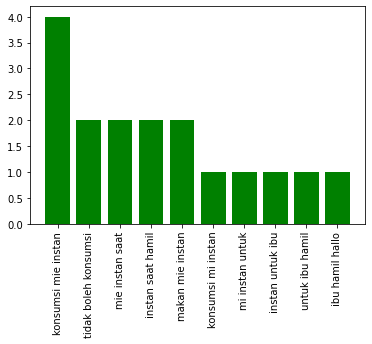



Question
{'atas ganggu lihat': 1, 'ganggu lihat usai': 1, 'lihat usai kena': 1, 'usai kena belek': 1, 'kena belek dok': 1, 'belek dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya soal': 1, 'tanya soal mata': 1, 'soal mata saya': 1, 'mata saya minggu': 1, 'saya minggu lalu': 1, 'minggu lalu saya': 1, 'lalu saya kena': 1, 'saya kena belek': 1, 'kena belek dan': 1, 'belek dan sekarang': 1, 'dan sekarang sudah': 1, 'sekarang sudah hilang': 1, 'sudah hilang belek': 1, 'hilang belek akan': 1, 'belek akan tetapi': 1, 'akan tetapi lihat': 1, 'tetapi lihat saya': 1, 'lihat saya jadi': 1, 'saya jadi agak': 1, 'jadi agak kurang': 1, 'agak kurang jelas': 1, 'kurang jelas apa': 1, 'jelas apa yang': 1, 'apa yang harus': 1, 'yang harus saya': 1, 'harus saya laku': 1, 'saya laku dok': 1, 'laku dok apa': 1, 'dok apa ada': 1, 'apa ada cara': 1, 'ada cara alami': 1, 'cara alami sembuh': 1, 'alami sembuh supaya': 1, 'sembuh supaya kembali': 1, 'supaya kembali normal': 1, 'kembali normal 

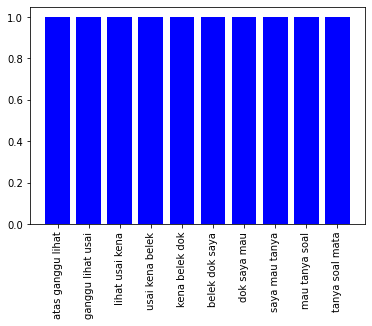

Similar Questions
{'asa ada yang': 1, 'ada yang ganjal': 1, 'yang ganjal pada': 1, 'ganjal pada mata': 1, 'pada mata dok': 1, 'mata dok saya': 1, 'dok saya rasa': 1, 'saya rasa seperti': 1, 'rasa seperti ada': 1, 'seperti ada partikel': 1, 'ada partikel yang': 1, 'partikel yang ganjal': 1, 'yang ganjal di': 1, 'ganjal di mata': 1, 'di mata kanan': 1, 'mata kanan saya': 1, 'kanan saya lama': 1, 'saya lama hari': 1, 'lama hari ini': 1, 'hari ini jika': 1, 'ini jika mata': 1, 'jika mata saya': 1, 'mata saya kedip': 1, 'saya kedip atau': 1, 'kedip atau tutup': 1, 'atau tutup masalah': 1, 'tutup masalah apa': 1, 'masalah apa yang': 1, 'apa yang mata': 1, 'yang mata saya': 1, 'mata saya alami': 1, 'saya alami ya': 1, 'alami ya dok': 1, 'ya dok terima': 1, 'dok terima kasih': 1}


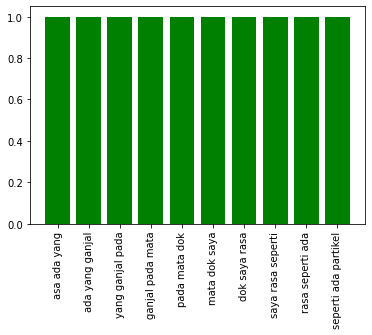



Question
{'apa yang saya': 2, 'sulit nafas dan': 2, 'bahwa yang saya': 2, 'yang saya rasa': 2, 'serang panik dan': 1, 'panik dan sulit': 1, 'dan sulit nafas': 1, 'sulit nafas malam': 1, 'nafas malam dokter': 1, 'malam dokter sudah': 1, 'dokter sudah beberapa': 1, 'sudah beberapa bulan': 1, 'beberapa bulan ini': 1, 'bulan ini saya': 1, 'ini saya sering': 1, 'saya sering alami': 1, 'sering alami serang': 1, 'alami serang panik': 1, 'serang panik kepala': 1, 'panik kepala saya': 1, 'kepala saya sering': 1, 'saya sering sakit': 1, 'sering sakit dan': 1, 'sakit dan sering': 1, 'dan sering cemas': 1, 'sering cemas tetapi': 1, 'cemas tetapi saya': 1, 'tetapi saya tidak': 1, 'saya tidak tahu': 1, 'tidak tahu apa': 1, 'tahu apa yang': 1, 'yang saya cemas': 1, 'saya cemas biasa': 1, 'cemas biasa kalau': 1, 'biasa kalau sedang': 1, 'kalau sedang kambuh': 1, 'sedang kambuh badan': 1, 'kambuh badan asa': 1, 'badan asa gemetar': 1, 'asa gemetar meriang': 1, 'gemetar meriang dingin': 1, 'meriang di

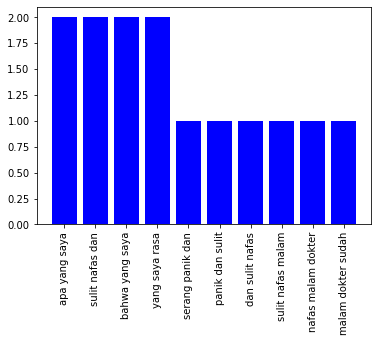

Similar Questions
{'sering sakit di': 1, 'sakit di dada': 1, 'di dada dan': 1, 'dada dan migrain': 1, 'dan migrain saya': 1, 'migrain saya sakit': 1, 'saya sakit apa': 1, 'sakit apa pagi': 1, 'apa pagi dok': 1, 'pagi dok sejak': 1, 'dok sejak bulan': 1, 'sejak bulan lalu': 1, 'bulan lalu saya': 1, 'lalu saya sering': 1, 'saya sering rasa': 1, 'sering rasa panas': 1, 'rasa panas dan': 1, 'panas dan sakit': 1, 'dan sakit pada': 1, 'sakit pada dada': 1, 'pada dada pindah': 1, 'dada pindah pindah': 1, 'pindah pindah tempat': 1, 'pindah tempat turut': 1, 'tempat turut dokter': 1, 'turut dokter internist': 1, 'dokter internist karena': 1, 'internist karena karena': 1, 'karena karena gas': 1, 'karena gas lambung': 1, 'gas lambung yang': 1, 'lambung yang naik': 1, 'yang naik dan': 1, 'naik dan serta': 1, 'dan serta rasa': 1, 'serta rasa panik': 1, 'rasa panik cara': 1, 'panik cara serang': 1, 'cara serang ini': 1, 'serang ini sering': 1, 'ini sering muncul': 1, 'sering muncul dalam': 1, 'muncu

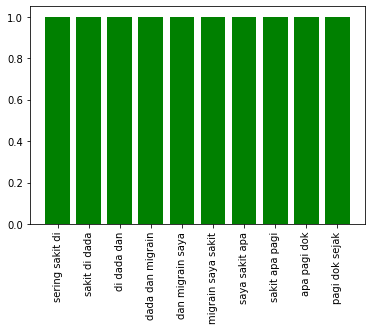



Question
{'lendir dalam tenggoroka': 1, 'dalam tenggoroka yang': 1, 'tenggoroka yang sudah': 1, 'yang sudah lama': 1, 'sudah lama saya': 1, 'lama saya sudah': 1, 'saya sudah lebih': 1, 'sudah lebih beberapa': 1, 'lebih beberapa bulan': 1, 'beberapa bulan dok': 1, 'bulan dok selalu': 1, 'dok selalu keluar': 1, 'selalu keluar lendir': 1, 'keluar lendir dari': 1, 'lendir dari tenggorok': 1, 'dari tenggorok dan': 1, 'tenggorok dan asa': 1, 'dan asa skl': 1, 'asa skl kalau': 1, 'skl kalau tenggorok': 1, 'kalau tenggorok ada': 1, 'tenggorok ada lendir': 1, 'ada lendir saya': 1, 'lendir saya tidak': 1, 'saya tidak lagi': 1, 'tidak lagi flu': 1, 'lagi flu dan': 1, 'flu dan beberapa': 1, 'dan beberapa bulan': 1, 'beberapa bulan tidak': 1, 'bulan tidak pernah': 1, 'tidak pernah flu': 1, 'pernah flu dan': 1, 'flu dan ada': 1, 'dan ada bau': 1, 'ada bau sengat': 1, 'bau sengat yang': 1, 'sengat yang keluar': 1, 'yang keluar dari': 1, 'keluar dari tenggorok': 1, 'dari tenggorok itu': 1, 'tenggoro

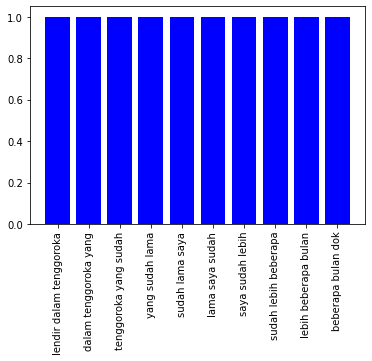

Similar Questions
{'lendir warna hijau': 2, 'flu dan lendir': 1, 'dan lendir warna': 1, 'warna hijau kemari': 1, 'hijau kemari hari': 1, 'kemari hari rabu': 1, 'hari rabu saya': 1, 'rabu saya baru': 1, 'saya baru pulang': 1, 'baru pulang dari': 1, 'pulang dari bal': 1, 'dari bal esok': 1, 'bal esok hari': 1, 'esok hari badan': 1, 'hari badan saya': 1, 'badan saya panas': 1, 'saya panas tenggorok': 1, 'panas tenggorok kering': 1, 'tenggorok kering sedikit': 1, 'kering sedikit susah': 1, 'sedikit susah tel': 1, 'susah tel dan': 1, 'tel dan pilek': 1, 'dan pilek yang': 1, 'pilek yang lumayan': 1, 'yang lumayan ada': 1, 'lumayan ada yang': 1, 'ada yang bilang': 1, 'yang bilang ini': 1, 'bilang ini capek': 1, 'ini capek tetapi': 1, 'capek tetapi sampai': 1, 'tetapi sampai hari': 1, 'sampai hari ini': 1, 'hari ini pun': 1, 'ini pun belum': 1, 'pun belum kunjung': 1, 'belum kunjung sembuh': 1, 'kunjung sembuh pilek': 1, 'sembuh pilek malah': 1, 'pilek malah lebih': 1, 'malah lebih parah': 1, 

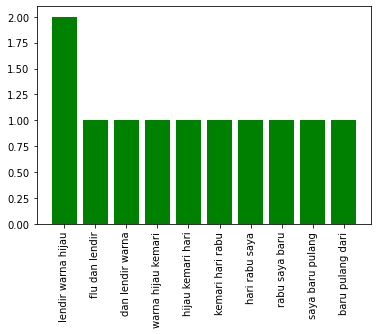



Question
{'keringat saat sakit': 1, 'saat sakit dok': 1, 'sakit dok saya': 1, 'dok saya sengaja': 1, 'saya sengaja mati': 1, 'sengaja mati ac': 1, 'mati ac ruang': 1, 'ac ruang kerja': 1, 'ruang kerja saya': 1, 'kerja saya karena': 1, 'saya karena saya': 1, 'karena saya sedang': 1, 'saya sedang batuk': 1, 'sedang batuk dan': 1, 'batuk dan demam': 1, 'dan demam keringat': 1, 'demam keringat keluar': 1, 'keringat keluar banyak': 1, 'keluar banyak bareng': 1, 'banyak bareng dengan': 1, 'bareng dengan banyak': 1, 'dengan banyak minum': 1, 'banyak minum sambil': 1, 'minum sambil kerja': 1, 'sambil kerja apakah': 1, 'kerja apakah keringat': 1, 'apakah keringat ini': 1, 'keringat ini sehat': 1, 'ini sehat dok': 1}


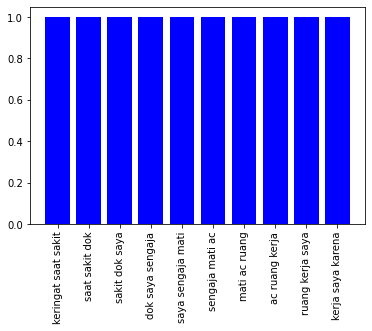

Similar Questions
{'keringat dingin sesak': 2, 'dingin sesak nafas': 2, 'sesak nafas perut': 1, 'nafas perut tidak': 1, 'perut tidak nyaman': 1, 'tidak nyaman dan': 1, 'nyaman dan cemas': 1, 'dan cemas dok': 1, 'cemas dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya kenpa': 1, 'tanya kenpa saya': 1, 'kenpa saya sering': 1, 'saya sering keringat': 1, 'sering keringat dingin': 1, 'sesak nafas dan': 1, 'nafas dan sedikit': 1, 'dan sedikit tidak': 1, 'sedikit tidak rasa': 1, 'tidak rasa nyaman': 1, 'rasa nyaman perut': 1, 'nyaman perut dan': 1, 'perut dan asa': 1, 'dan asa cemas': 1, 'asa cemas dan': 1, 'cemas dan saya': 1, 'dan saya sudah': 1, 'saya sudah periksa': 1, 'sudah periksa dokter': 1, 'periksa dokter dan': 1, 'dokter dan kata': 1, 'dan kata sakit': 1, 'kata sakit maag': 1, 'sakit maag dan': 1, 'maag dan dia': 1, 'dan dia beri': 1, 'dia beri obat': 1, 'beri obat tetapi': 1, 'obat tetapi sakit': 1, 'tetapi sakit yang': 1, 'sakit yang saya': 1, 'yang saya rasa': 1, 

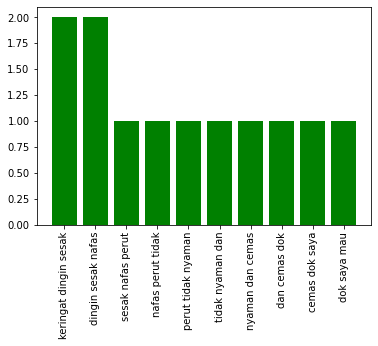



Question
{'telapak tangan saya': 2, 'tangan gatal dan': 1, 'gatal dan lapis': 1, 'dan lapis kulit': 1, 'lapis kulit luar': 1, 'kulit luar kelupas': 1, 'luar kelupas dok': 1, 'kelupas dok telapak': 1, 'dok telapak tangan': 1, 'tangan saya ini': 1, 'saya ini banyak': 1, 'ini banyak bintik': 1, 'banyak bintik merah': 1, 'bintik merah terus': 1, 'merah terus kulit': 1, 'terus kulit luar': 1, 'kulit luar telapak': 1, 'luar telapak tangan': 1, 'telapak tangan kelupas': 1, 'tangan kelupas sudah': 1, 'kelupas sudah kali': 1, 'sudah kali saya': 1, 'kali saya alami': 1, 'saya alami ini': 1, 'alami ini dok': 1, 'ini dok dulu': 1, 'dok dulu sembuh': 1, 'dulu sembuh bulan': 1, 'sembuh bulan lebih': 1, 'bulan lebih saya': 1, 'lebih saya mau': 1, 'saya mau tanya': 1, 'mau tanya solusi': 1, 'tanya solusi dari': 1, 'solusi dari dokter': 1, 'dari dokter dan': 1, 'dokter dan sakit': 1, 'dan sakit apa': 1, 'sakit apa yang': 1, 'apa yang ada': 1, 'yang ada di': 1, 'ada di telapak': 1, 'di telapak tangan'

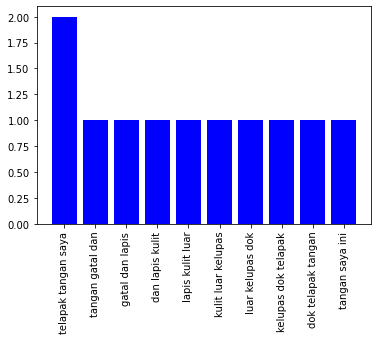

Similar Questions
{'kulit kelupas dan': 1, 'kelupas dan gatal': 1, 'dan gatal selamat': 1, 'gatal selamat siang': 1, 'selamat siang dok': 1, 'siang dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya saya': 1, 'tanya saya pakai': 1, 'saya pakai cream': 1, 'pakai cream dari': 1, 'cream dari pure': 1, 'dari pure kenapa': 1, 'pure kenapa kulit': 1, 'kenapa kulit wajah': 1, 'kulit wajah saya': 1, 'wajah saya kelupas': 1, 'saya kelupas dan': 1, 'kelupas dan juga': 1, 'dan juga sedikit': 1, 'juga sedikit gatal': 1, 'sedikit gatal itu': 1, 'gatal itu saya': 1, 'itu saya cocok': 1, 'saya cocok apa': 1, 'cocok apa tidak': 1, 'apa tidak ya': 1, 'tidak ya dok': 1, 'ya dok terima': 1, 'dok terima kasih': 1}


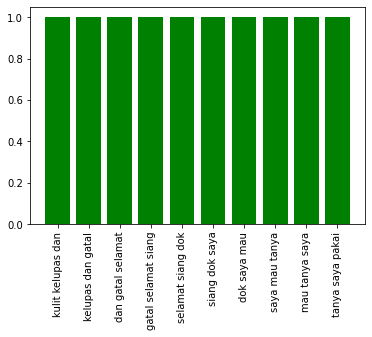



Question
{'tambah berat badan': 1, 'berat badan saat': 1, 'badan saat hamil': 1, 'saat hamil dok': 1, 'hamil dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya saya': 1, 'tanya saya hamil': 1, 'saya hamil minggu': 1, 'hamil minggu terus': 1, 'minggu terus di': 1, 'terus di suru': 1, 'di suru sama': 1, 'suru sama bidan': 1, 'sama bidan agar': 1, 'bidan agar berat': 1, 'agar berat badan': 1, 'berat badan saya': 1, 'badan saya itu': 1, 'saya itu harus': 1, 'itu harus bertamba': 1, 'harus bertamba kok': 1, 'bertamba kok berat': 1, 'kok berat bada': 1, 'berat bada saya': 1, 'bada saya tidak': 1, 'saya tidak biasa': 1, 'tidak biasa naik': 1, 'biasa naik padahal': 1, 'naik padahal sudah': 1, 'padahal sudah usahain': 1, 'sudah usahain sering': 1, 'usahain sering makan': 1, 'sering makan dan': 1, 'makan dan komsusi': 1, 'dan komsusi buah': 1}


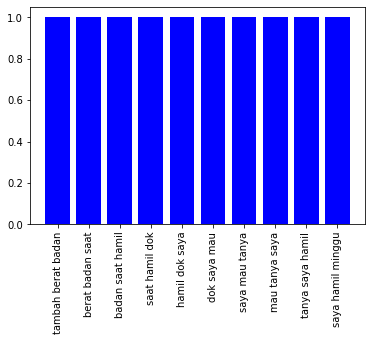

Similar Questions
{'siang tanya apakah': 2, 'tanya apakah berat': 2, 'apakah berat badan': 2, 'ingin cepat hamil': 1, 'cepat hamil siang': 1, 'hamil siang tanya': 1, 'berat badan tnggi': 1, 'badan tnggi cuma': 1, 'tnggi cuma bisa': 1, 'cuma bisa hamil': 1, 'bisa hamil bagaimana': 1, 'hamil bagaimana biar': 1, 'bagaimana biar saya': 1, 'biar saya bisa': 1, 'saya bisa hamil': 1, 'bisa hamil terima': 1, 'hamil terima kasih': 1, 'ingin hamil dan': 1, 'hamil dan berat': 1, 'dan berat badan': 1, 'berat badan kurang': 1, 'badan kurang siang': 1, 'kurang siang tanya': 1, 'berat badan usia': 1, 'badan usia pengaruh': 1, 'usia pengaruh untuk': 1, 'pengaruh untuk punya': 1, 'untuk punya anak': 1, 'punya anak berat': 1, 'anak berat badan': 1, 'berat badan saya': 1, 'badan saya kg': 1, 'saya kg tb': 1, 'kg tb cuma': 1, 'tb cuma terima': 1, 'cuma terima kasih': 1}


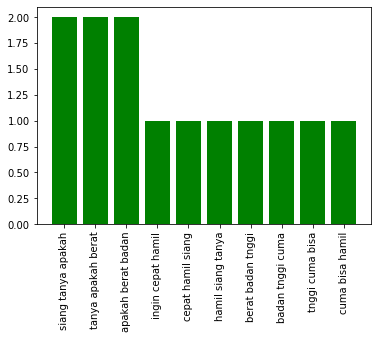



Question
{'mental disorder atau': 1, 'disorder atau tidak': 1, 'atau tidak salam': 1, 'tidak salam saya': 1, 'salam saya ada': 1, 'saya ada pernah': 1, 'ada pernah dekat': 1, 'pernah dekat dengan': 1, 'dekat dengan orang': 1, 'dengan orang gadis': 1, 'orang gadis cantik': 1, 'gadis cantik sekitar': 1, 'cantik sekitar umur': 1, 'sekitar umur atau': 1, 'umur atau tahun': 1, 'atau tahun tetapi': 1, 'tahun tetapi saat': 1, 'tetapi saat saya': 1, 'saat saya ajak': 1, 'saya ajak obrol': 1, 'ajak obrol hanya': 1, 'obrol hanya saja': 1, 'hanya saja dia': 1, 'saja dia cuma': 1, 'dia cuma bicara': 1, 'cuma bicara patah': 1, 'bicara patah kata': 1, 'patah kata waktu': 1, 'kata waktu itu': 1, 'waktu itu sambil': 1, 'itu sambil tertawa': 1, 'sambil tertawa dengan': 1, 'tertawa dengan muka': 1, 'dengan muka merah': 1, 'muka merah lalu': 1, 'merah lalu gadis': 1, 'lalu gadis itu': 1, 'gadis itu waktu': 1, 'itu waktu luar': 1, 'waktu luar kantor': 1, 'luar kantor habis': 1, 'kantor habis makan': 1, 

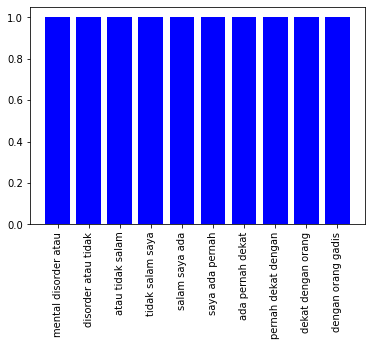

Similar Questions
{'saya tidak bisa': 2, 'sulit tidur sering': 1, 'tidur sering rasa': 1, 'sering rasa cemas': 1, 'rasa cemas dan': 1, 'cemas dan daya': 1, 'dan daya ingat': 1, 'daya ingat lemah': 1, 'ingat lemah dok': 1, 'lemah dok saya': 1, 'dok saya gadis': 1, 'saya gadis di': 1, 'gadis di umur': 1, 'di umur tahun': 1, 'umur tahun an': 1, 'tahun an saya': 1, 'an saya alami': 1, 'saya alami masalah': 1, 'alami masalah dengan': 1, 'masalah dengan keluarga': 1, 'dengan keluarga saya': 1, 'keluarga saya ayah': 1, 'saya ayah saya': 1, 'ayah saya sering': 1, 'saya sering dua': 1, 'sering dua ibu': 1, 'dua ibu saya': 1, 'ibu saya dan': 1, 'saya dan tindak': 1, 'dan tindak keras': 1, 'tindak keras kepada': 1, 'keras kepada kami': 1, 'kepada kami saat': 1, 'kami saat marah': 1, 'saat marah fisik': 1, 'marah fisik maupun': 1, 'fisik maupun kata': 1, 'maupun kata akhir': 1, 'kata akhir kali': 1, 'akhir kali masalah': 1, 'kali masalah yang': 1, 'masalah yang keluarga': 1, 'yang keluarga saya': 

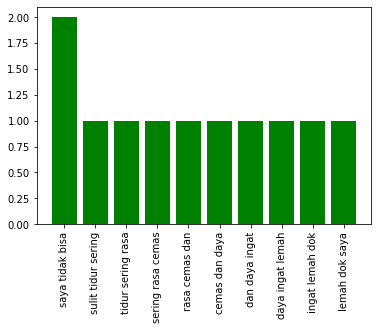

In [16]:
for i in range(len(text_error)):
    if len(text_error[i]) <= 0:
        continue
    print("Question")
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_count = get_ngram_freq(3, full_query)
    question_count = dict(sorted(question_count.items(), key=lambda item: item[1], reverse=True))
    print(question_count)
    plt.bar(list(question_count.keys())[:10], list(question_count.values())[:10], color='b')
    plt.xticks(rotation=90)
    plt.show()
    
    print("Similar Questions")
    text_lst = []
    for error_passage in text_error[i]:
        text_lst.append(error_passage['title']+". "+error_passage['text'])
    passage_count  = get_ngram_freq_lst(3, text_lst)
    passage_count = dict(sorted(passage_count.items(), key=lambda item: item[1], reverse=True))
    print(passage_count)
    plt.bar(list(passage_count.keys())[:10], list(passage_count.values())[:10], color='g')
    plt.xticks(rotation=90)
    plt.show()
    print()
    print()

## Trigram Overlap

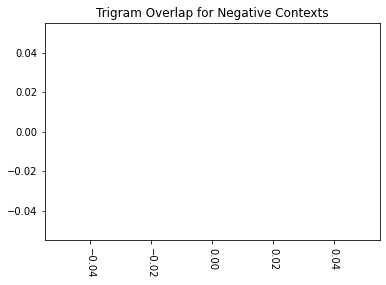

In [17]:
trigram_overlap =  dict()
for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_ngram_cnt = get_ngram_freq(3, full_query)
    qid = gold_data[i]['question']['id']
    for error_passage in text_error[i]:
        pid = error_passage['id']
        row_id = qid+'_'+pid
        full_passage = error_passage['title'] + ". "+error_passage['text']
        passage_ngram_cnt = get_ngram_freq(3, full_passage)
        bigram_overlap[row_id] = get_union_term_cnt_normalized(question_ngram_cnt, passage_ngram_cnt)
trigram_overlap = dict(sorted(trigram_overlap.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(trigram_overlap.keys()), list(trigram_overlap.values()))
xlocs, xlabs = plt.xticks(rotation=270)
plt.title("Trigram Overlap for Negative Contexts")
for i, v in enumerate(list(trigram_overlap.values())):
    plt.text(xlocs[i] - 0.5, v + 0.001, str(round(v, 2)))
plt.show()

In [18]:
gold_ids[0]

['KD-10780',
 'AD-11170',
 'KD-34954',
 'KD-42528',
 'AD-3644',
 'AD-20187',
 'KD-9647',
 'AD-15985',
 'AD-8111',
 'AD-19236',
 'KD-30953',
 'KD-1190',
 'AD-11811',
 'AD-23059',
 'AD-1505',
 'AD-8996',
 'AD-13391',
 'AD-23609',
 'AD-20888',
 'AD-14282',
 'AD-19627',
 'KD-40213',
 'TD-7481',
 'KD-33961',
 'AD-8178',
 'AD-10434',
 'AD-1225',
 'AD-6755',
 'AD-5483',
 'AD-15205',
 'AD-2483',
 'KD-36449',
 'KD-38063',
 'KD-31262',
 'KD-7197',
 'KD-13846',
 'KD-29989',
 'KD-34810',
 'TD-2104',
 'KD-28831',
 'KD-818',
 'KD-12573',
 'KD-32421',
 'KD-130',
 'KD-16041',
 'KD-18305',
 'TD-11575',
 'AD-22794',
 'AD-6224',
 'AD-20846',
 'TD-4539',
 'AD-5304',
 'KD-26899',
 'KD-6929',
 'AD-12475',
 'KD-7384',
 'AD-11852',
 'AD-8328',
 'AD-9875',
 'KD-26435',
 'AD-10103']

## Vector Embedding Projection

In [19]:
import pickle

In [20]:
#passage embedding load

passage_embeddings = dict()
with (open("encoded_index_tydi_normalized.tsv", "rb")) as openfile:
    while True:
        try:
            passage_lst = pickle.load(openfile)
            for pid, p_vector in passage_lst:
                passage_embeddings[pid] = p_vector
        except EOFError:
            break


In [21]:
#question embedding load

query_embeddings = dict()
with (open("question-embedding-tydi.tsv", "rb")) as openfile:
    while True:
        try:
            query_lst = pickle.load(openfile)
            for qid, q_vector in query_lst:
                query_embeddings[qid] = q_vector
        except EOFError:
            break


/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


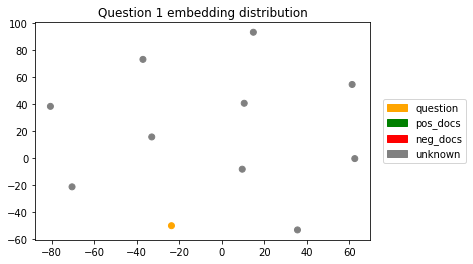

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


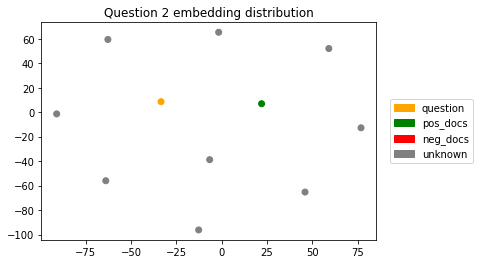

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


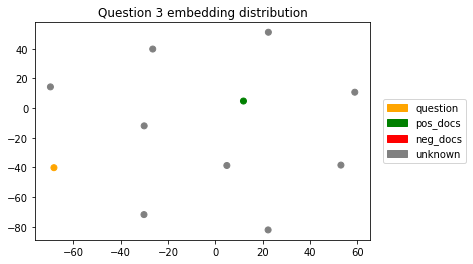

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


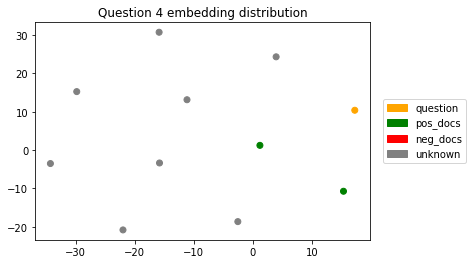

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


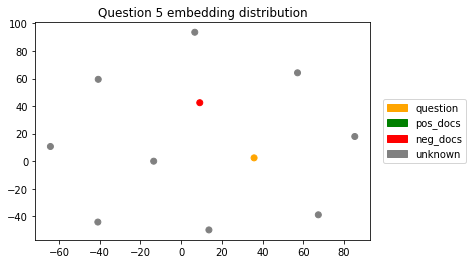

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


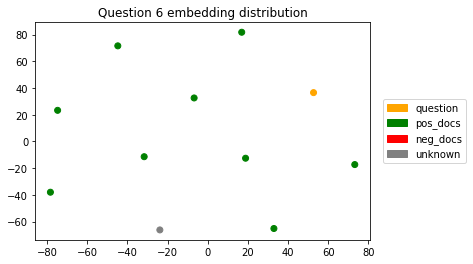

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


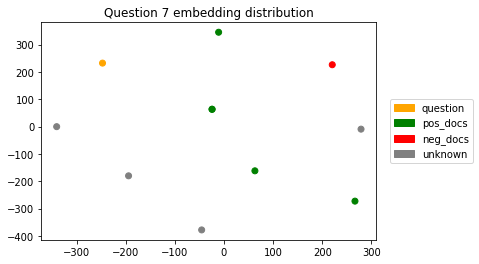

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


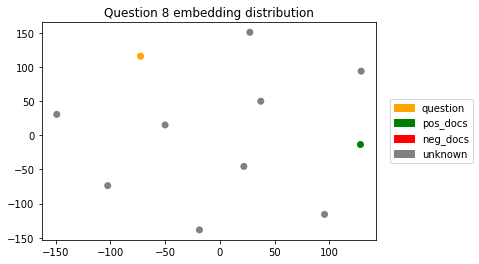

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


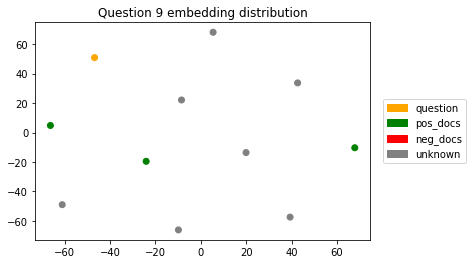

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


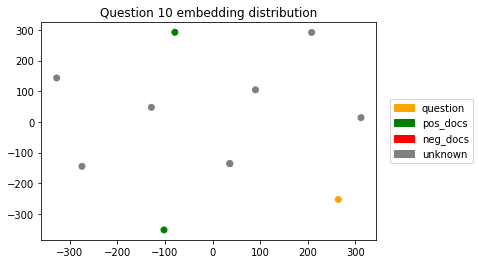

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


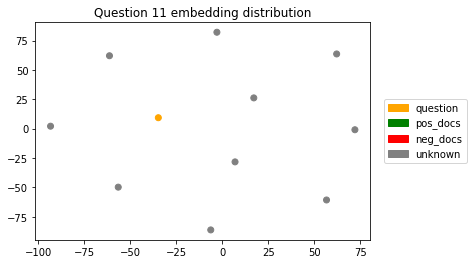

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


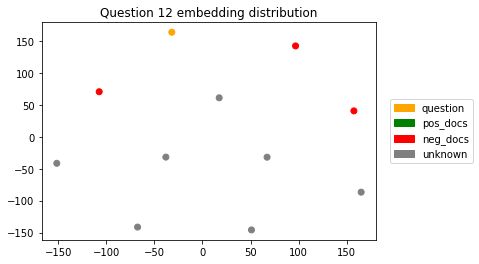

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


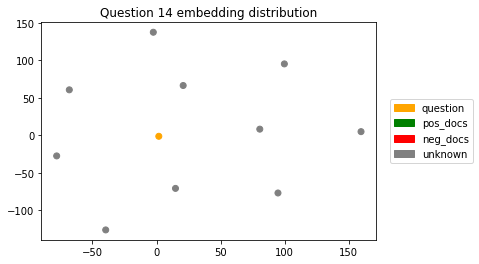

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


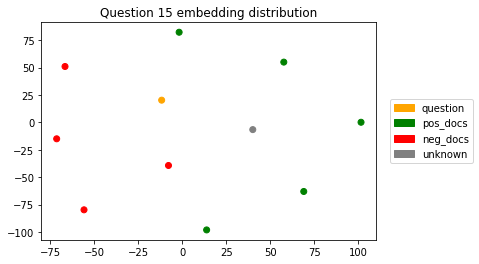

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


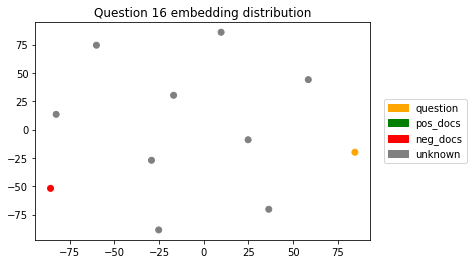

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


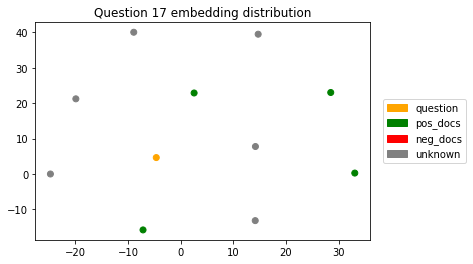

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


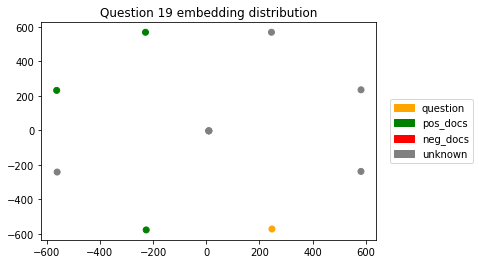

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


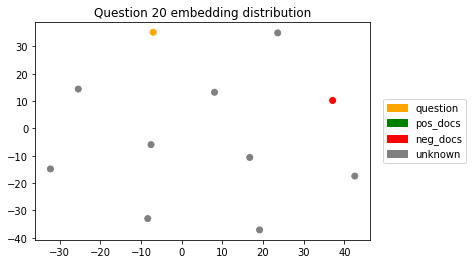

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


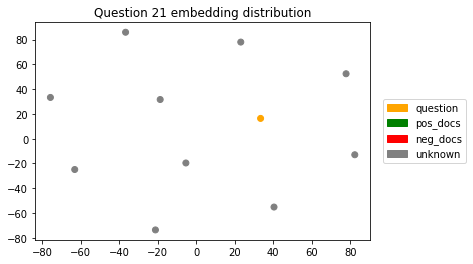

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


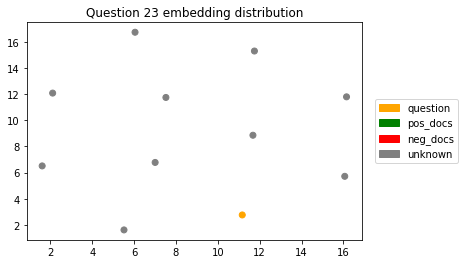

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


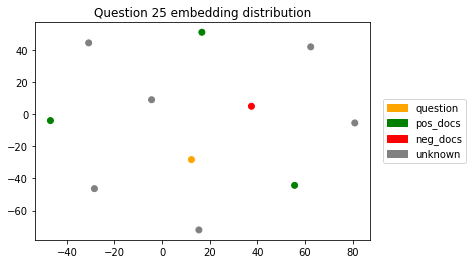

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


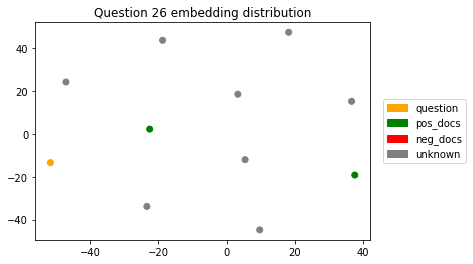

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


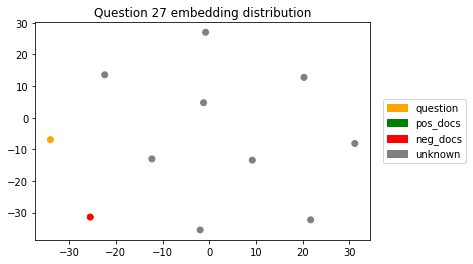

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


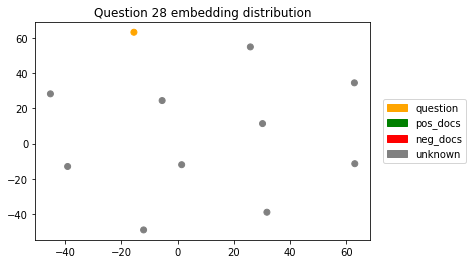

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


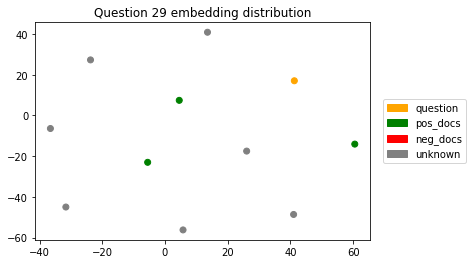

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


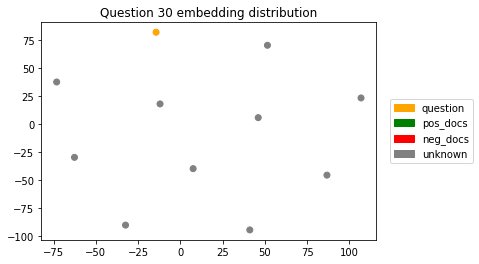

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


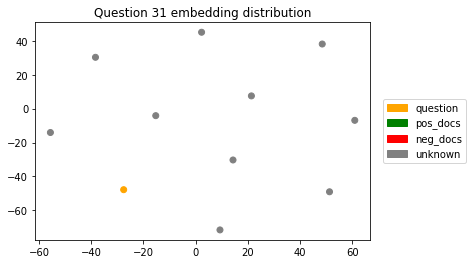

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


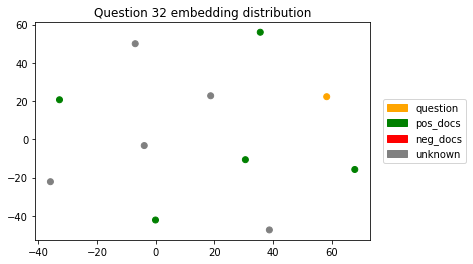

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


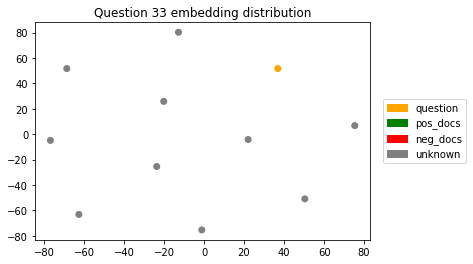

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


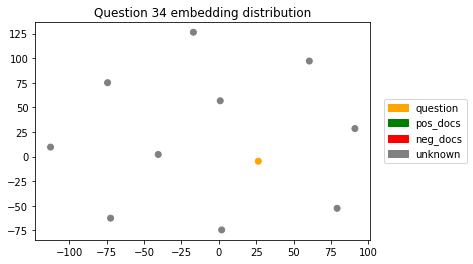

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


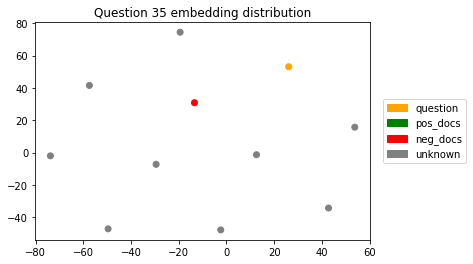

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


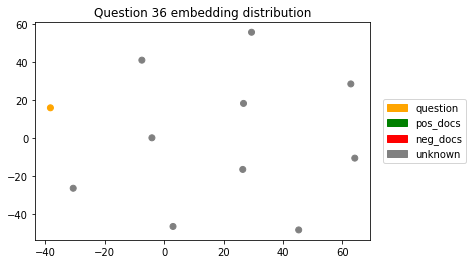

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


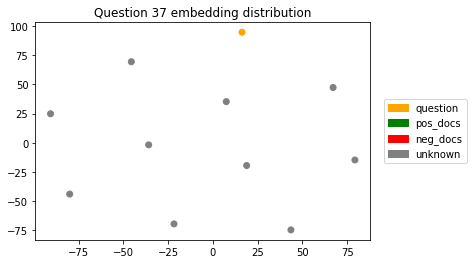

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


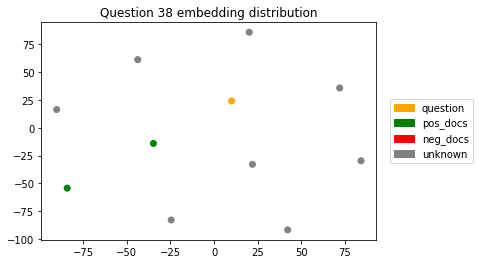

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


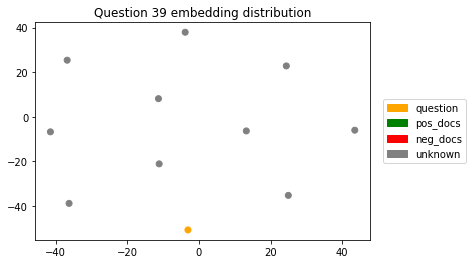

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


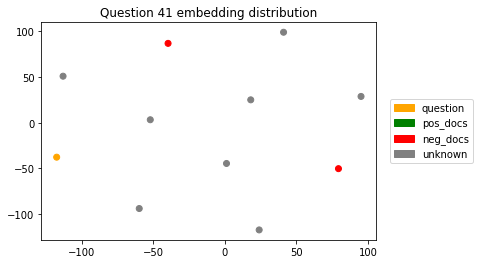

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


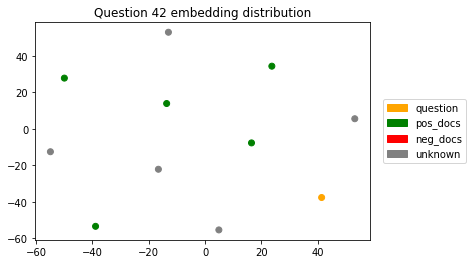

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


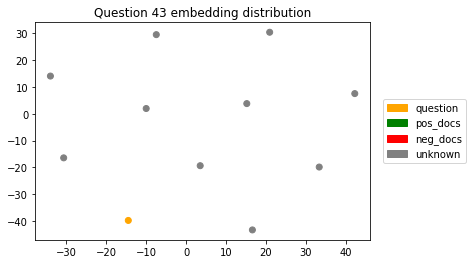

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


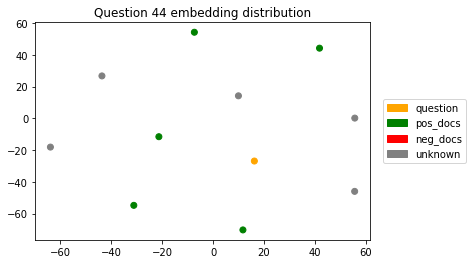

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


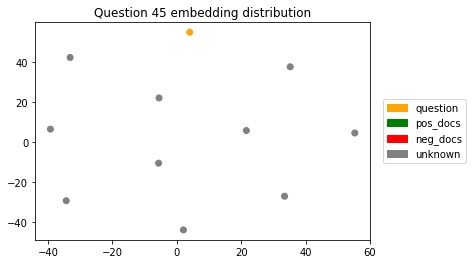

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


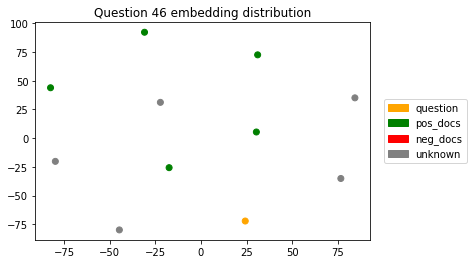

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


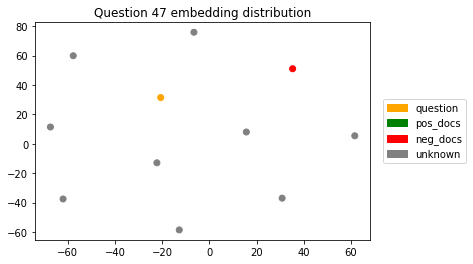

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


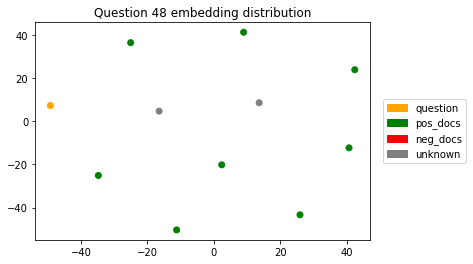

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


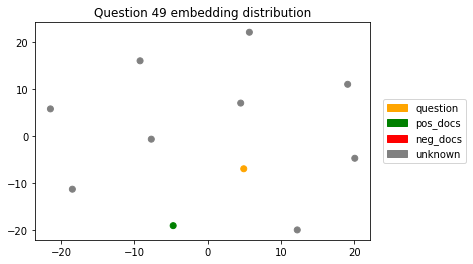

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


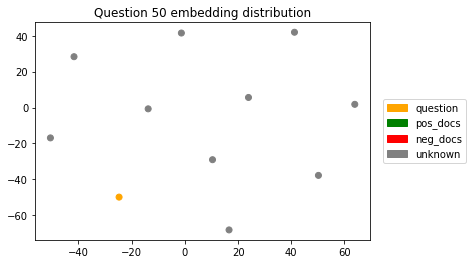

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

orange_patch = mpatches.Patch(color='orange', label='question')
green_patch = mpatches.Patch(color='green', label='pos_docs')
red_patch = mpatches.Patch(color='red', label='neg_docs')
grey_patch = mpatches.Patch(color='grey', label='unknown')
color_handles = [orange_patch, green_patch, red_patch, grey_patch]
for idx,row in enumerate(actual_data):    
    values = [0]
    colors = ListedColormap(['orange','green','red', 'grey'])
    qid = row['question']['id']
    q_vector = query_embeddings[qid]
    q_vector = q_vector.reshape(-1, len(q_vector))
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        p_vector = passage_embeddings[pid]
        p_vector = p_vector.reshape(-1, len(p_vector))
        q_vector = np.concatenate((q_vector, p_vector), axis=0)
        color = 1 if pid in gold_ids[idx] else 2
        color = 3 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
    if len(q_vector) < 2:
        continue
    q_compressed = TSNE(n_components=2, learning_rate='auto',init='pca', random_state=42).fit_transform(q_vector)

    plt.title(f"Question {qid} embedding distribution")
    scatter = plt.scatter(q_compressed[:,0], q_compressed[:,1], c=values, cmap=colors)
    plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

## BM25 Score vs DPR Score

We expect the graphic will be inversely linear because DPR similarity score has negative correlation with BM25 similarity (While DPR smaller is better, BM25 bigger is better)

In [23]:
import xml.etree.ElementTree as ET

#gather all documents from corpus
docs = []
doc_ids = []

tree = ET.parse('corpus_only_question.xml')
root = tree.getroot()

for doc in root:
    for attr in doc:
        attr_type = attr.tag
        attr_content = attr.text
        if attr_type=='KELUHAN':
            content_text = ''
            for content in attr:
                if content.tag == 'JUDUL':
                    if content_text=='':
                        content_text += content.text if content.text is not None else ''
                    else:
                        content_text += f'. {content.text}' if content.text is not None else ''
                elif content.tag == 'ISI':
                    if content_text=='':
                        content_text += content.text if content.text is not None else ''
                    else:
                        content_text += f'. {content.text}' if content.text is not None else ''
            docs.append(content_text)
        elif attr_type == 'ID':
            doc_ids.append(attr_content)



In [24]:
assert len(docs)==len(doc_ids)

In [25]:
docs_map =  dict()
for idx, doc_id in enumerate(doc_ids):
    docs_map[doc_id] = docs[idx]

In [28]:
import numpy as np
from collections import defaultdict
from nltk.tokenize import word_tokenize

def bm25_init(docs_dict):
    doc_maps = defaultdict(int)
    term_maps = dict()
    
    for doc_id, doc_text in docs_dict.items():
        doc_words = list(word_tokenize(doc_text))
        doc_terms_map = defaultdict(int)
        words_exist = defaultdict(bool)
        for word in doc_words:
            if not words_exist[word]:
                doc_maps[word] += 1 
                words_exist[word] = True
                
            doc_terms_map[word] += 1
        term_maps[doc_id] = doc_terms_map
    N = len(list(docs_dict.keys()))
    avgdl = sum(len(doc) for doc in list(docs_dict.values())) / len(list(docs_dict.values()))
    return doc_maps, term_maps, N, avgdl

def bm25_score(word, doc, word_freq, N_q, avgdl, N, k1=1.2, b=0.75):
    #tf
    tf =  (word_freq*(k1+1))/(word_freq + k1 * (1 - b + b * len(doc) / avgdl))\
    #idf
    idf = np.log(((N - N_q + 0.5) / (N_q + 0.5)) + 1)
    return round(tf*idf, 4)

def bm25_query_score(query, doc_id, docs_freq_map, terms_freq_map, docs_map, avgdl, N, k1=1.2, b=0.75):
    query = list(word_tokenize(query))
    selected_doc = docs_map[doc_id]
    res = sum([bm25_score(word, selected_doc, terms_freq_map[doc_id][word], docs_freq_map[word], avgdl, N, k1, b) for word in query])
    return res

In [29]:
from tqdm import tqdm

avgdl = sum(len(doc) for doc in docs) / len(docs)
N = len(docs)
docs_freq_map, terms_freq_map, N, avgdl = bm25_init(docs_map)
for q_idx, q_row in tqdm(enumerate(actual_data)):
    query = q_row['question']['title']
    query  += f". {q_row['question']['text']}" if q_row['question']['text'].strip()!="" else ""
    for doc_idx, doc_row in enumerate(q_row['ctxs']):
        doc_id = doc_row['id']
        actual_data[q_idx]['ctxs'][doc_idx]['bm25_score'] = bm25_query_score(query, doc_id, docs_freq_map, terms_freq_map,  docs_map, avgdl, N)
        

45it [00:00, 88.42it/s]


In [31]:
actual_data

[{'question': {'id': '1',
   'title': 'cara mengatasi pusing , lemas dan hidung berair',
   'text': 'malam dok , sejak 2 hari yang lalu badan saya pusing dan lemas hari ini hidung saya mengeluarkan ingus terus menerus , bagaimana cara mengatasi nya ya dok ? terima kasih sebelumnya'},
  'ctxs': [{'id': 'TD-3680',
    'title': 'selamat malam dok , saya memiliki gangguan pada kulit kaki , saya terkena mata ikan , sudah saya obati dengan obat yang saya beli di apotek , namun hanya sedikit perubahan yang terjadi , mata ikan pun tak kunjung sembuh , mataikan saya tumbuh sejak 4 bulan lalu , bagaimana cara mengatasi , apa saya harus melakukan operasi dok ?',
    'text': '',
    'score': '714.6787',
    'bm25_score': 25.1436},
   {'id': 'TD-7065',
    'title': 'siang dok , saya mau tanya , say',
    'text': 'siang dok , saya mau tanya , saya setiap bab keras , dan keluar darah , penyebabnya apa ya ? dan solusinya apa ? terima kasih',
    'score': '715.1798',
    'bm25_score': 9.5842},
   {'id'

### Aggregated Plot

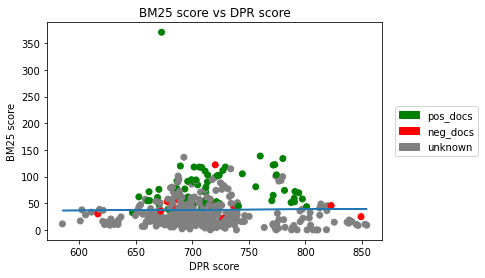

In [94]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler, StandardScaler

green_patch = mpatches.Patch(color='green', label='pos_docs')
red_patch = mpatches.Patch(color='red', label='neg_docs')
grey_patch = mpatches.Patch(color='grey', label='unknown')
color_handles = [green_patch, red_patch, grey_patch]
values = []
colors = ListedColormap(['green','red', 'grey'])
score_vector = []
for idx,row in enumerate(actual_data):        
    qid = row['question']['id']
    
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        score_vector.append([float(p_row['score']), p_row['bm25_score']]) #i assign the minus dpr score instead because their similarities are inversely propotional
        color = 0 if pid in gold_ids[idx] else 1
        color = 2 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
score_vector= np.array(score_vector)


m, b = np.polyfit(score_vector[:,0], score_vector[:,1], 1)
plt.title(f"BM25 score vs DPR score")
plt.xlabel("DPR score")
plt.ylabel("BM25 score")
scatter = plt.scatter(score_vector[:,0], score_vector[:,1], c=values, cmap=colors)

plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.plot(score_vector[:,0], m*score_vector[:,0] + b)
plt.show()

### Per question plot

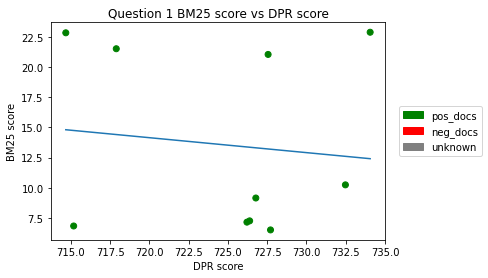

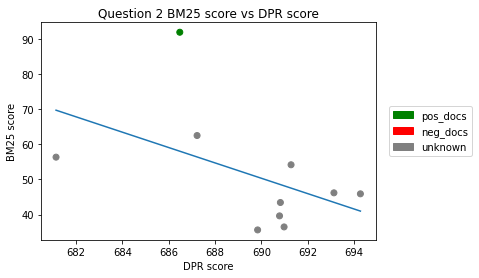

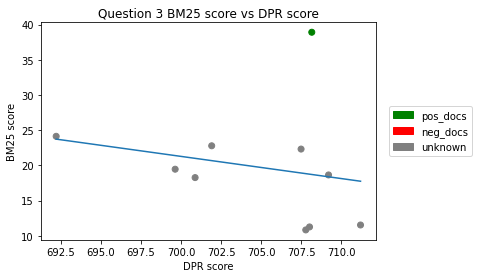

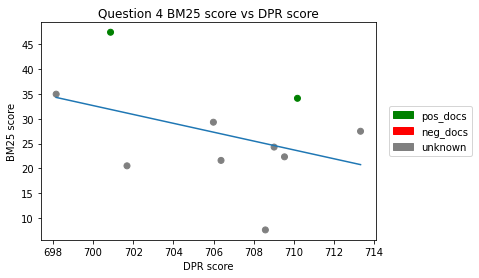

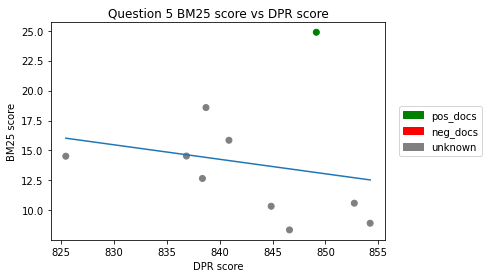

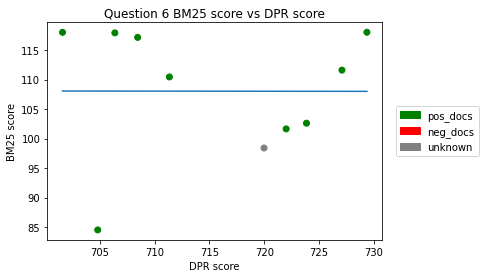

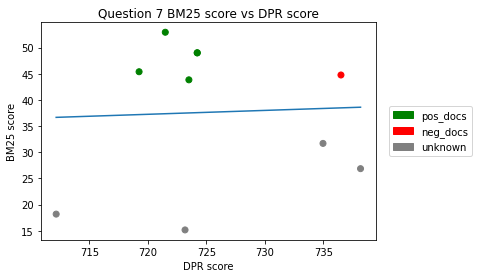

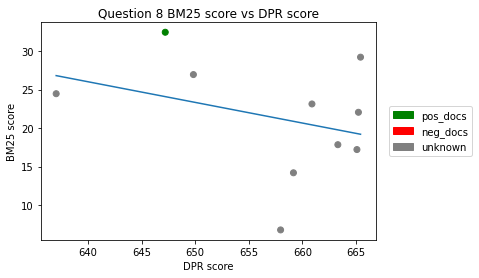

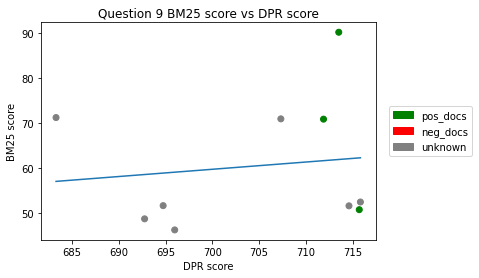

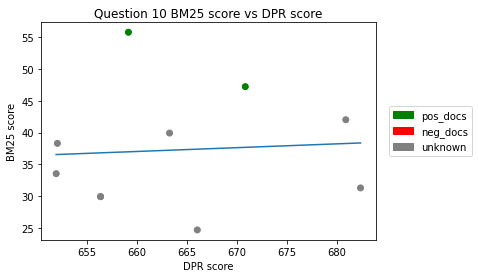

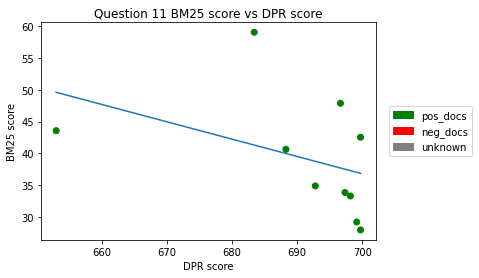

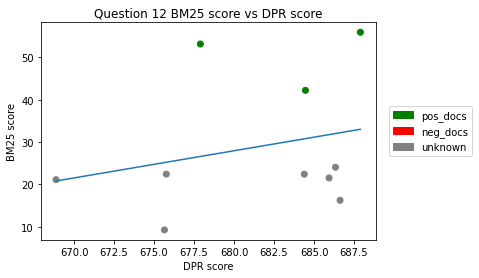

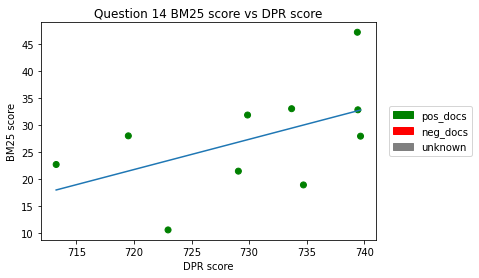

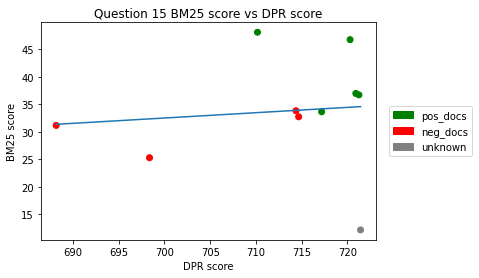

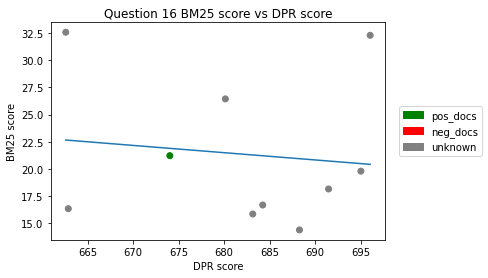

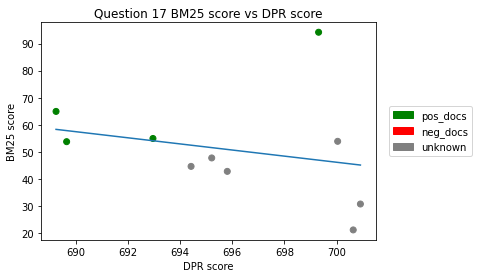

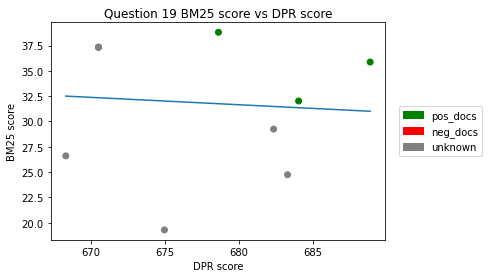

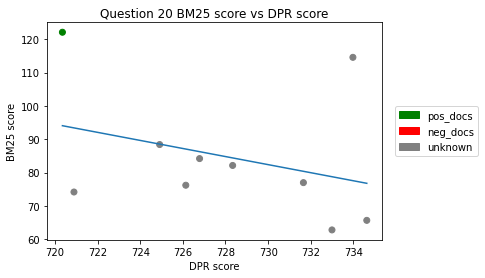

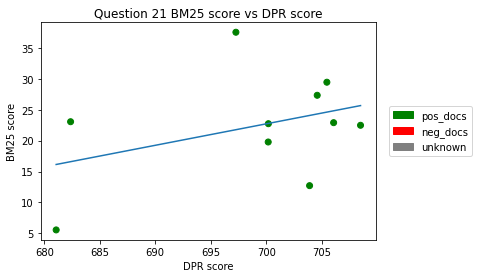

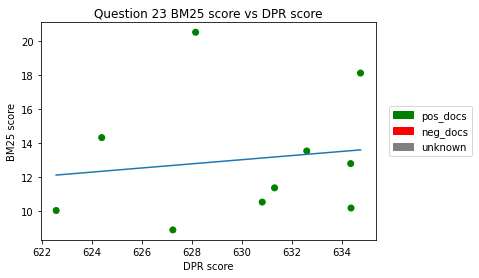

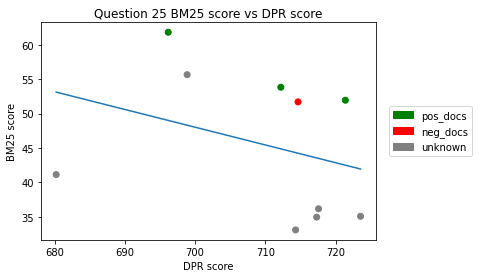

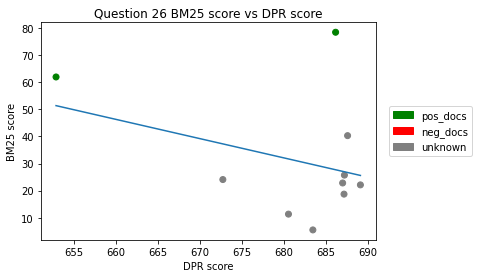

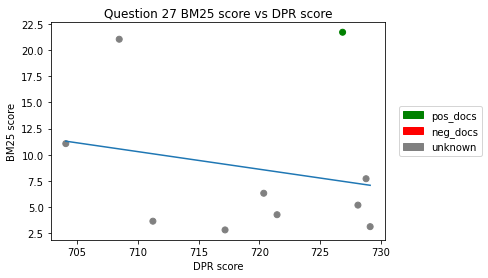

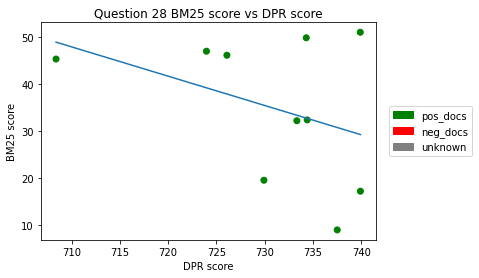

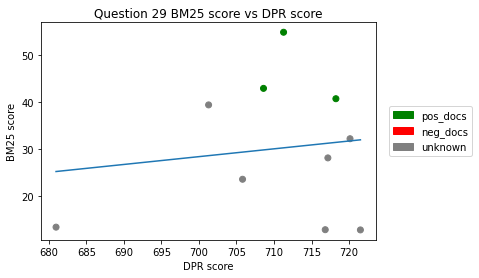

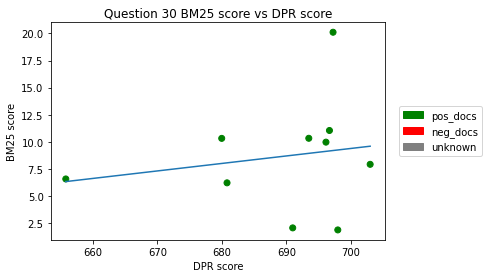

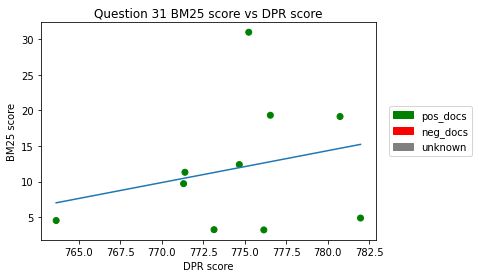

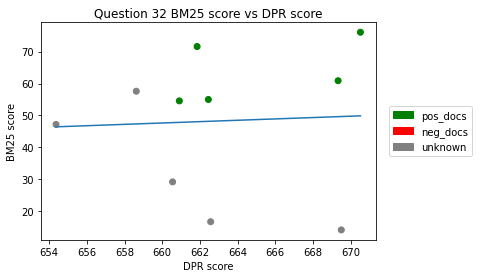

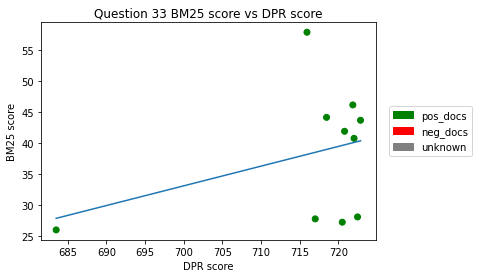

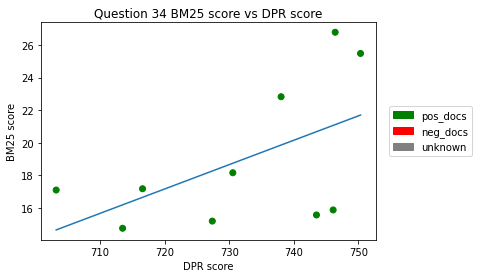

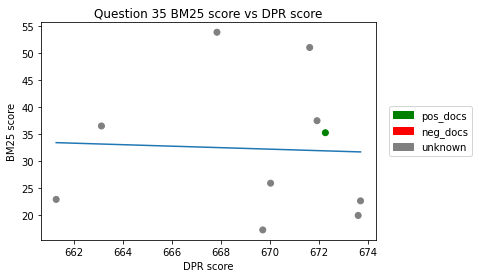

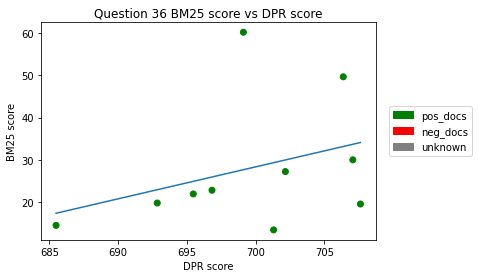

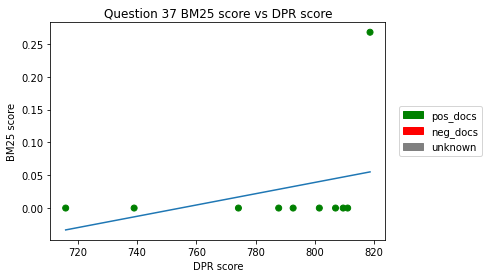

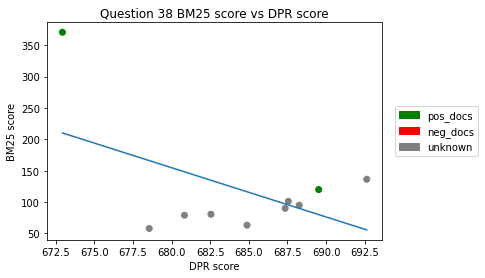

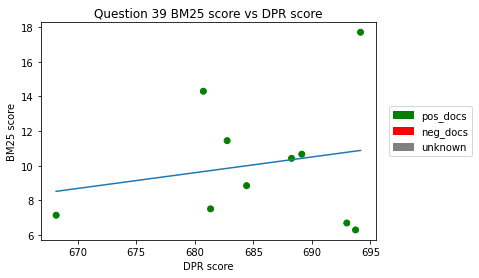

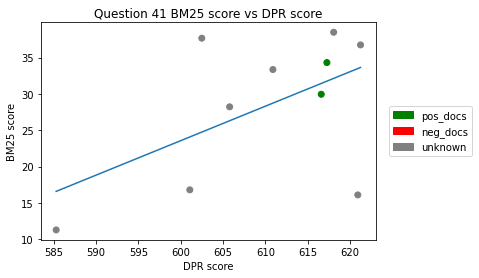

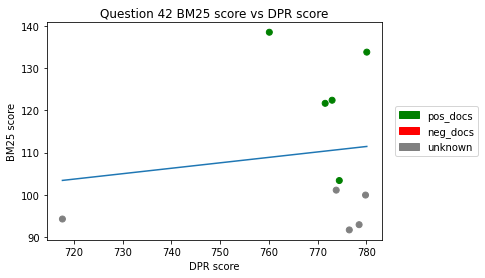

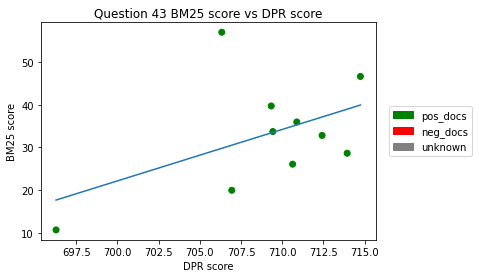

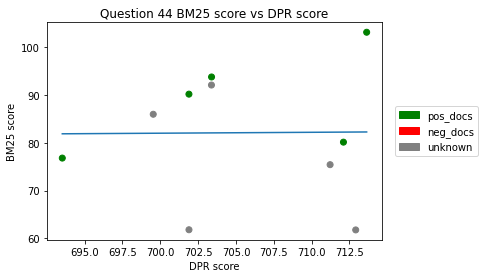

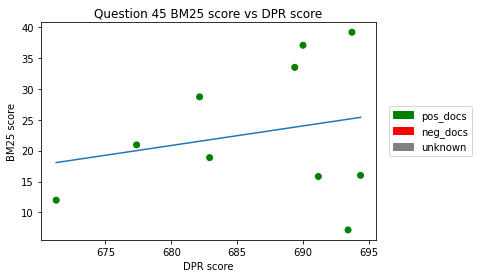

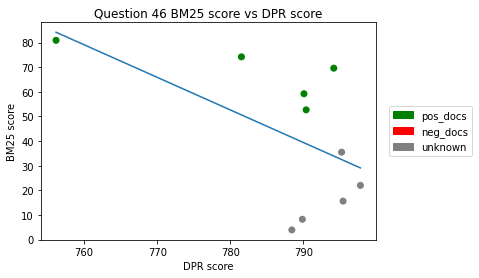

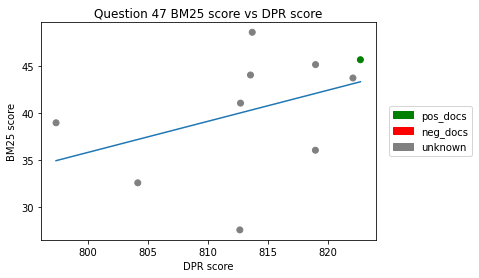

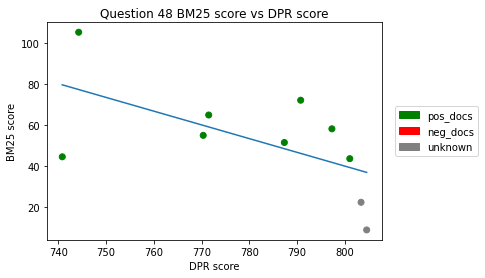

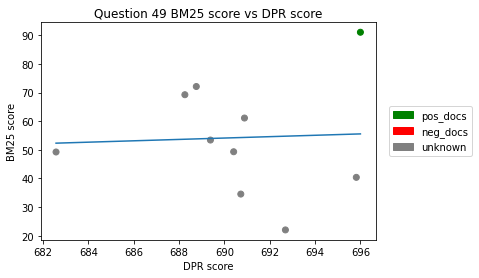

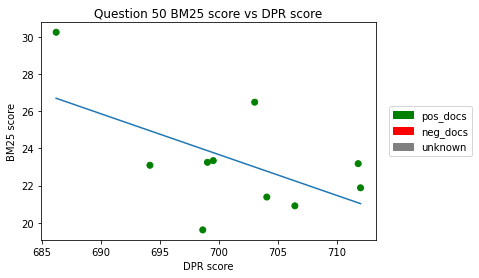

In [95]:
gradients_lst = []
for idx,row in enumerate(actual_data):
    values = []
    score_vector = []
    qid = row['question']['id']
    
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        score_vector.append([float(p_row['score']), p_row['bm25_score']]) #i assign the minus dpr score instead because their similarities are inversely propotional
        color = 0 if pid in gold_ids[idx] else 1
        color = 2 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
    score_vector= np.array(score_vector)


    m, b = np.polyfit(score_vector[:,0], score_vector[:,1], 1)
    plt.title(f"Question {qid} BM25 score vs DPR score")
    plt.xlabel("DPR score")
    plt.ylabel("BM25 score")
    scatter = plt.scatter(score_vector[:,0], score_vector[:,1], c=values, cmap=colors)
    gradients_lst.append(m)
    plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.plot(score_vector[:,0], m*score_vector[:,0] + b)
    plt.show()

In [96]:
is_positive = [gradient for gradient in gradients_lst if gradient > 0]
is_negative = [gradient for gradient in gradients_lst if gradient < 0]

print(f"positive gradient count: {len(is_positive)}")
print(f"negative gradient count: {len(is_negative)}")

positive gradient count: 24
negative gradient count: 21


We can conclude that there is maybe some tradeoff between dpr score and bm25 score because when dpr similarity is high, the bm25 similarity is rather low (we can conclude that where the positive gradient > negative gradient) although this a bit inconclusive because the proportion between positive and negative is almost even. When we look at the aggregated it is shown that the line is flat which may show that there is almost no correlation between bm25 and dpr. The vector embedding analysis is inconclusive because majority of the questions has too many unlabeled closest neighbors rather the labeled ones. Interestingly unigram overlap for negative context beatween one question to each similar questions is quite high while the rest is quite low. 

# Data Syifa

In [97]:
gold_data = []
actual_data = []

with open('query_result_split_prettified.json', 'r') as actual_out:
    actual_data = json.load(actual_out)

with open('question-syifa-split-test.json', 'r') as gold_out:
    gold_data = json.load(gold_out)

In [98]:
gold_ids = []
neg_ids = []
for row in gold_data:
    row_gold_ids = []
    row_neg_ids = []
    for row_ctx in row['ctxs']:
        row_gold_ids.append(row_ctx['id'])
    for row_ctx in row['neg_ctxs']:
        row_neg_ids.append(row_ctx['id'])
    gold_ids.append(row_gold_ids)
    neg_ids.append(row_neg_ids)

In [99]:
text_error = []
i = 0
for row in actual_data:
    row_text_error = []
    for row_ctx in row['ctxs']:
        if row_ctx['id'] in neg_ids[i]:
            row_text_error.append({'id': row_ctx['id'], 'title': row_ctx['title'], 'text': row_ctx['text']})
    text_error.append(row_text_error)
    i+=1

In [100]:
for i in range(len(text_error)):
    print("Question")
    print(f"text: {actual_data[i]['question']['text']}")
    print(f"title: {actual_data[i]['question']['title']}")
    print("Similar Questions")
    print(text_error[i])
    print()
    print()

Question
text: sore dok . . maaf dok saya sudah 4 hari mengalami benjolan di daerah kemaluan mula-mula benjolan tersebut kecil dan sekarang membesar lalu pecah dok . . rasanya linu dan sakit jika malam hari . . kira-kira apa nama penyakit yang saya alami ya dok
title: benjolan di sekitar kelamin
Similar Questions
[]


Question
text: kreatinin 7,83 mg/dl , natrium 135 mmol/l , kalum 5,5 mmol/l , ureum 177 mg/dl , di vonis untuk hd tetapi saya ragu karena ibu saya pipisnya masih banyak terutama malam sampai pagi hari banjir , , saya tanya pada yang hd kalau mereka juga sebelum hd bisa bak sendiri tetapi sesudah 10 kali hd tidak bisa bak sama sekali ? apakah hd bisa mematikan fungsi ginjal yang tinggal sedikit ? terima kasih diet makan yang baik gimana ya dok ? terima kasih
title: tanya dok , ibu saya 60 tahun , diabetes dan sempat stroke sekarang jalannya harus di papah ,
Similar Questions
[]


Question
text: selamat siang dokter , saya ingin bertanya tentang gigi saya , dulu gigi saya t

## Unigram Analysis

Question
{'tangan': 4, 'telapak': 3, 'kulit': 2, 'kelupas': 2, 'dok': 2, 'gatal': 1, 'lapis': 1, 'bintik': 1, 'merah': 1, 'kali': 1, 'alami': 1, 'sembuh': 1, 'solusi': 1, 'dokter': 1, 'sakit': 1, 'anjur': 1, 'obat': 1, 'terima': 1, 'kasih': 1}


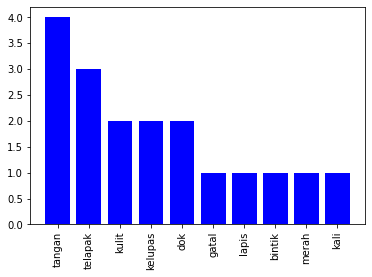

Similar Questions
{'putih': 3, 'telapak': 2, 'tangan': 2, 'dok': 2, 'sakit': 2, 'asslamualaikum': 1, 'kulit': 1, 'warna': 1, 'panu': 1, 'gatal': 1, 'smakin': 1, 'sebar': 1, 'penyembuhnnya': 1, 'terima': 1, 'kasih': 1}


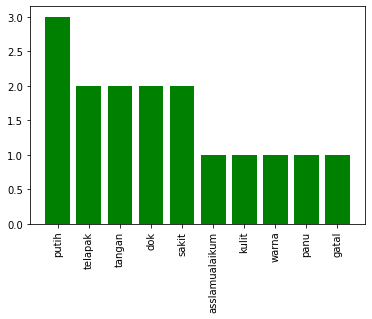



Question
{'berat': 3, 'badan': 2, 'hamil': 2, 'tambah': 1, 'dok': 1, 'minggu': 1, 'suru': 1, 'bidan': 1, 'bertamba': 1, 'bada': 1, 'usahain': 1, 'makan': 1, 'komsusi': 1, 'buah': 1}


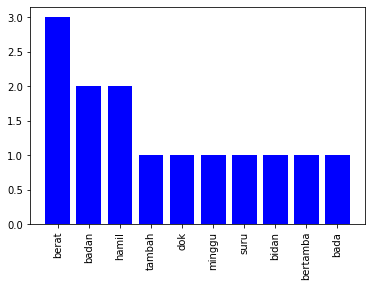

Similar Questions
{'badan': 6, 'berat': 4, 'dok': 3, 'normal': 1, 'kurus': 1, 'terima': 1, 'kasih': 1, 'tambah': 1, 'makan': 1, 'atur': 1, 'kena': 1, 'cacar': 1, 'tangan': 1}


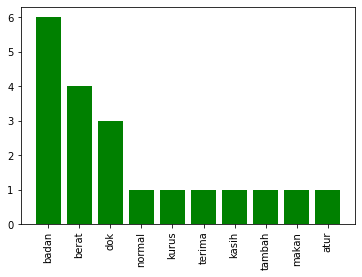



Question
{'steril': 3, 'anak': 3, 'hamil': 1, 'pasca': 1, 'usia': 1, 'kali': 1, 'caesar': 1, 'mei': 1, 'putus': 1, 'langsung': 1, 'suami': 1, 'cewek': 1, 'tiga': 1, 'potong': 1, 'bayi': 1, 'tabung': 1, 'solusi': 1, 'nya': 1}


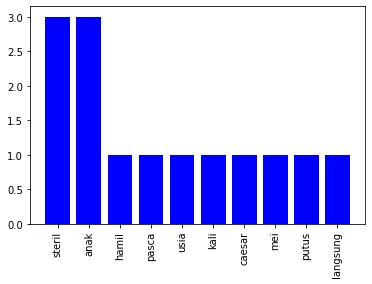

Similar Questions
{'hamil': 1, 'operasi': 1, 'caesar': 1, 'lahir': 1, 'sesar': 1, 'bayi': 1, 'tinggal': 1, 'cepat': 1, 'anak': 1, 'jarak': 1}


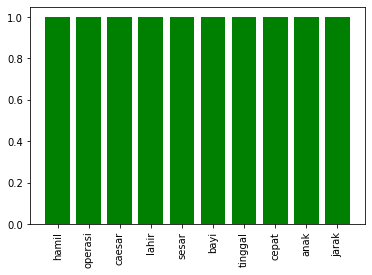



Question
{'mata': 2, 'silinder': 2, 'dok': 1, 'minus': 1, 'kemarin': 1, 'periksa': 1, 'ya': 1, 'sebab': 1, 'terima': 1, 'kasih': 1}


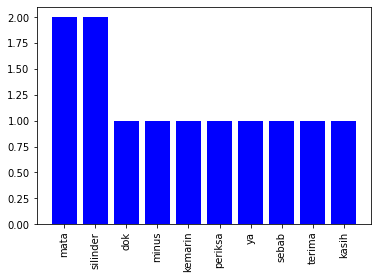

Similar Questions
{'dok': 3, 'mata': 2, 'panas': 2, 'dingin': 2, 'badan': 1, 'sebab': 1, 'ya': 1, 'berbahya': 1, 'terima': 1, 'kasih': 1}


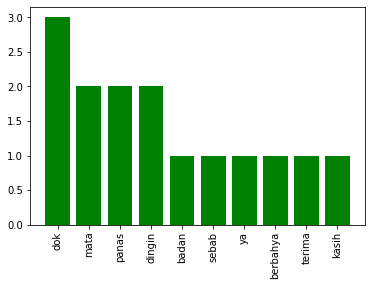



Question
{'perut': 3, 'langsung': 3, 'jahit': 3, 'nyeri': 2, 'operasi': 2, 'caesar': 2, 'dok': 2, 'ya': 2, 'pasca': 1, 'hallo': 1, 'habis': 1, 'trz': 1, 'steril': 1, 'tpii': 1, 'pas': 1, 'alami': 1, 'panas': 1, 'dingin': 1, 'takut': 1, 'masalah': 1, 'lahir': 1, 'beraktifitas': 1, 'biar': 1, 'kaku': 1, 'cepat': 1, 'sembuh': 1}


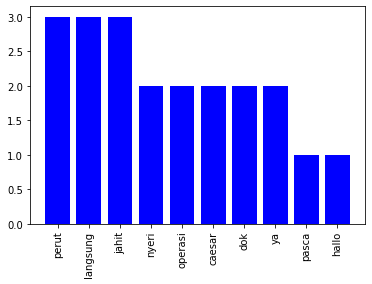

Similar Questions
{'perut': 3, 'kecil': 2, 'pasca': 2, 'operasi': 2, 'caesar': 2, 'siang': 1, 'dok': 1, 'buncit': 1, 'kasih': 1}


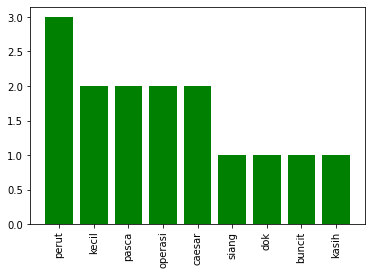



Question
{'dok': 2, 'maladaptive': 2, 'daydreaming': 2, 'terkadang': 2, 'biasa': 1, 'lamun': 1, 'khayal': 1, 'idap': 1, 'cerita': 1, 'peran': 1, 'nya': 1, 'gera': 1, 'reflek': 1, 'ikut': 1, 'plot': 1, 'kait': 1, 'ganggu': 1, 'jiwa': 1, 'sembuh': 1}


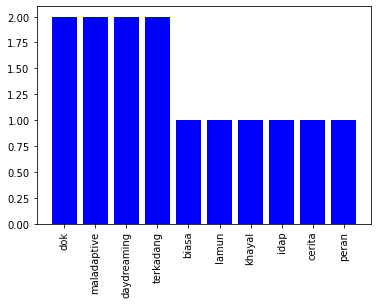

Similar Questions
{'fikiran': 2, 'dok': 2, 'orang': 1, 'tekan': 1, 'keluh': 1, 'putus': 1, 'asa': 1, 'manyak': 1, 'lamun': 1, 'tenang': 1, 'gimana': 1, 'tangan': 1}


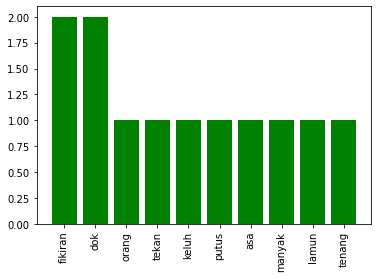



Question
{'dok': 3, 'sariawan': 2, 'demam': 2, 'mual': 2, 'kait': 1, 'pusing': 1, 'minggu': 1, 'sebab': 1, 'bentur': 1, 'sikat': 1, 'lari': 1, 'ousing': 1, 'ya': 1}


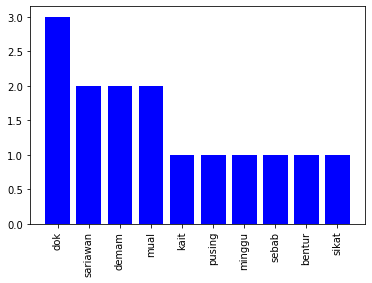

Similar Questions
{'pusing': 3, 'demam': 3, 'sakit': 1, 'sembut': 1, 'ya': 1, 'dok': 1}


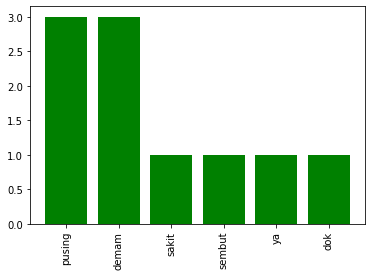



Question
{'gadis': 4, 'mental': 2, 'disorder': 2, 'dekat': 2, 'ruang': 2, 'meja': 2, 'dalam': 2, 'toilet': 2, 'salam': 1, 'cantik': 1, 'umur': 1, 'ajak': 1, 'obrol': 1, 'dia': 1, 'bicara': 1, 'patah': 1, 'tertawa': 1, 'muka': 1, 'merah': 1, 'luar': 1, 'kantor': 1, 'habis': 1, 'makan': 1, 'siang': 1, 'kejar': 1, 'maksud': 1, 'cakap': 1, 'langsung': 1, 'lari': 1, 'tunggu': 1, 'pergi': 1, 'jadi': 1, 'tindak': 1, 'iya': 1, 'masuk': 1, 'klasifikasi': 1, 'mana': 1, 'terima': 1, 'kasih': 1}


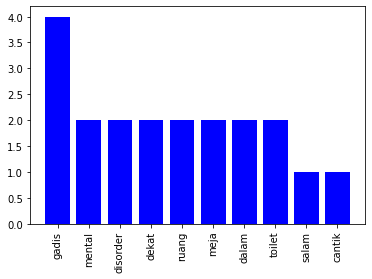

Similar Questions
{'terima': 5, 'dokter': 4, 'lelaki': 4, 'suka': 4, 'pacar': 4, 'kasih': 3, 'pribadi': 3, 'pria': 3, 'kenal': 3, 'teman': 3, 'meni': 3, 'tampar': 3, 'psikopat': 3, 'dok': 3, 'klik': 2, 'jejaring': 2, 'sosial': 2, 'nilai': 2, 'cerdas': 2, 'aneh': 2, 'kali': 2, 'alas': 2, 'perilaku': 2, 'mantan': 2, 'sesal': 2, 'salah': 2, 'orang': 2, 'dosa': 2, 'takut': 2, 'pasang': 1, 'salam': 1, 'kesempatanya': 1, 'tarik': 1, 'fisik': 1, 'awal': 1, 'senang': 1, 'akun': 1, 'wanita': 1, 'sexy': 1, 'porno': 1, 'temu': 1, 'bicara': 1, 'sex': 1, 'kirim': 1, 'foto': 1, 'busana': 1, 'niat': 1, 'syarat': 1, 'ikut': 1, 'mau': 1, 'debat': 1, 'denganya': 1, 'kalah': 1, 'argumen': 1, 'cari': 1, 'benar': 1, 'tindakanya': 1, 'normal': 1, 'simpang': 1, 'tipe': 1, 'jadi': 1, 'suami': 1, 'dar': 1, 'informasi': 1, 'umur': 1, 'tayang': 1, 'mohon': 1, 'nama': 1, 'tampil': 1, 'kasik': 1, 'tindak': 1, 'siswi': 1, 'kelas': 1, 'sma': 1, 'minggu': 1, 'tengkar': 1, 'tepat': 1, 'lingkung': 1, 'sekolah': 1, 'ref

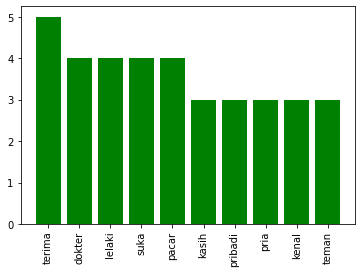



Question
{'makan': 2, 'derita': 2, 'lambung': 2, 'liver': 2, 'sakit': 1, 'dok': 1, 'boleh': 1, 'mohon': 1, 'terima': 1, 'kasih': 1}


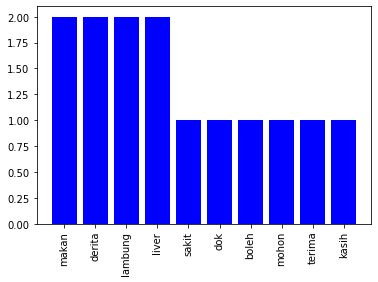

Similar Questions
{'makan': 4, 'diabetes': 3, 'derita': 3, 'minum': 2, 'selamat': 2, 'dok': 2, 'terima': 2, 'kasih': 2, 'pagi': 1, 'dikomsumsi': 1, 'siang': 1, 'ganti': 1, 'nasi': 1, 'abet': 1, 'tolong': 1, 'jelas': 1}


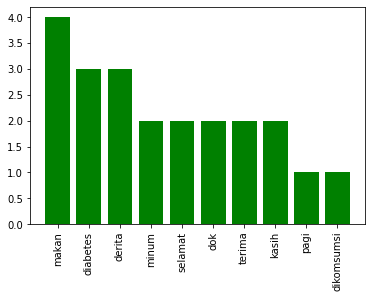

In [101]:
for i in range(len(text_error)):
    if len(text_error[i]) <= 0:
        continue
    print("Question")
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_count = get_ngram_freq(1, full_query)
    
    question_count = dict(sorted(question_count.items(), key=lambda item: item[1], reverse=True))
    print(question_count)
    plt.bar(list(question_count.keys())[:10], list(question_count.values())[:10], color='b')
    plt.xticks(rotation=90)
    plt.show()
    
    print("Similar Questions")
    text_lst = []
    for error_passage in text_error[i]:
        text_lst.append(error_passage['title']+". "+error_passage['text'])
    passage_count  = get_ngram_freq_lst(1, text_lst)
    passage_count = dict(sorted(passage_count.items(), key=lambda item: item[1], reverse=True))
    print(passage_count)
    plt.bar(list(passage_count.keys())[:10], list(passage_count.values())[:10], color='g')
    plt.xticks(rotation=90)
    plt.show()
    print()
    print()

## Unigram Overlap

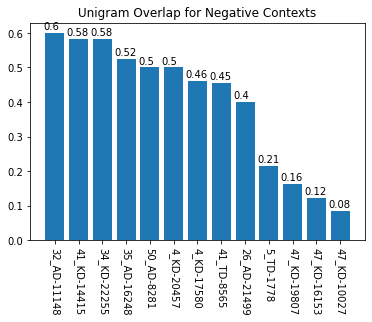

In [102]:
unigram_overlap =  dict()
for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_ngram_cnt = get_ngram_freq(1, full_query)
    qid = gold_data[i]['question']['id']
    for error_passage in text_error[i]:
        pid = error_passage['id']
        row_id = qid+'_'+pid
        full_passage = error_passage['title'] + ". "+error_passage['text']
        passage_ngram_cnt = get_ngram_freq(1, full_passage)
        unigram_overlap[row_id] = get_union_term_cnt_normalized(question_ngram_cnt, passage_ngram_cnt)
unigram_overlap = dict(sorted(unigram_overlap.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(unigram_overlap.keys()), list(unigram_overlap.values()))
xlocs, xlabs = plt.xticks(rotation=270)
plt.title("Unigram Overlap for Negative Contexts")
for i, v in enumerate(list(unigram_overlap.values())):
    plt.text(xlocs[i] - 0.5, v + 0.01, str(round(v, 2)))
plt.show()

## Bigram Analysis

Question
{'telapak tangan': 3, 'kulit luar': 2, 'tangan saya': 2, 'tangan gatal': 1, 'gatal dan': 1, 'dan lapis': 1, 'lapis kulit': 1, 'luar kelupas': 1, 'kelupas dok': 1, 'dok telapak': 1, 'saya ini': 1, 'ini banyak': 1, 'banyak bintik': 1, 'bintik merah': 1, 'merah terus': 1, 'terus kulit': 1, 'luar telapak': 1, 'tangan kelupas': 1, 'kelupas sudah': 1, 'sudah kali': 1, 'kali saya': 1, 'saya alami': 1, 'alami ini': 1, 'ini dok': 1, 'dok dulu': 1, 'dulu sembuh': 1, 'sembuh bulan': 1, 'bulan lebih': 1, 'lebih saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya solusi': 1, 'solusi dari': 1, 'dari dokter': 1, 'dokter dan': 1, 'dan sakit': 1, 'sakit apa': 1, 'apa yang': 1, 'yang ada': 1, 'ada di': 1, 'di telapak': 1, 'saya dan': 1, 'dan anjur': 1, 'anjur obat': 1, 'obat jika': 1, 'jika perlu': 1, 'perlu terima': 1, 'terima kasih': 1}


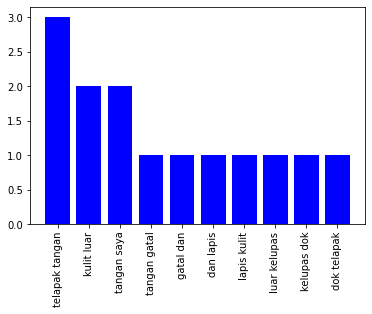

Similar Questions
{'telapak tangan': 2, 'putih di': 1, 'di telapak': 1, 'tangan asslamualaikum': 1, 'asslamualaikum dok': 1, 'dok saya': 1, 'saya punya': 1, 'punya sakit': 1, 'sakit kulit': 1, 'kulit di': 1, 'di bagi': 1, 'bagi telapak': 1, 'tangan warna': 1, 'warna putih': 1, 'putih putih': 1, 'putih mirip': 1, 'mirip panu': 1, 'panu tetapi': 1, 'tetapi tidak': 1, 'tidak gatal': 1, 'gatal smakin': 1, 'smakin lama': 1, 'lama makin': 1, 'makin sebar': 1, 'sebar sakit': 1, 'sakit apa': 1, 'apa dan': 1, 'dan bagaimana': 1, 'bagaimana cara': 1, 'cara penyembuhnnya': 1, 'penyembuhnnya dok': 1, 'dok terima': 1, 'terima kasih': 1}


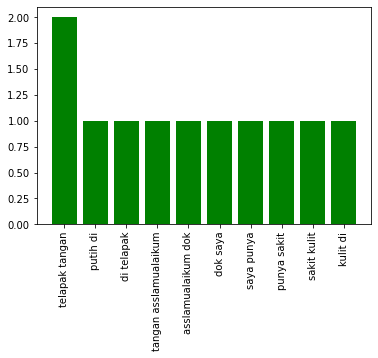



Question
{'berat badan': 2, 'tambah berat': 1, 'badan saat': 1, 'saat hamil': 1, 'hamil dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya saya': 1, 'saya hamil': 1, 'hamil minggu': 1, 'minggu terus': 1, 'terus di': 1, 'di suru': 1, 'suru sama': 1, 'sama bidan': 1, 'bidan agar': 1, 'agar berat': 1, 'badan saya': 1, 'saya itu': 1, 'itu harus': 1, 'harus bertamba': 1, 'bertamba kok': 1, 'kok berat': 1, 'berat bada': 1, 'bada saya': 1, 'saya tidak': 1, 'tidak biasa': 1, 'biasa naik': 1, 'naik padahal': 1, 'padahal sudah': 1, 'sudah usahain': 1, 'usahain sering': 1, 'sering makan': 1, 'makan dan': 1, 'dan komsusi': 1, 'komsusi buah': 1}


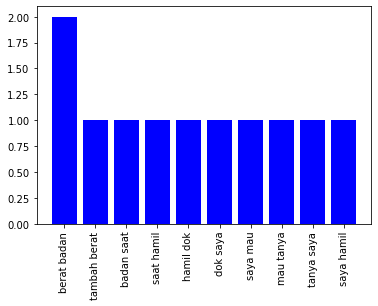

Similar Questions
{'berat badan': 4, 'dok saya': 3, 'saya mau': 3, 'mau tanya': 3, 'badan saya': 3, 'tanya berat': 2, 'badan dok': 2, 'saya tinggi': 1, 'tinggi badan': 1, 'badan itu': 1, 'itu masuk': 1, 'masuk normal': 1, 'normal apa': 1, 'apa kurus': 1, 'kurus terima': 1, 'terima kasih': 1, 'tambah berat': 1, 'tanya kenapa': 1, 'kenapa berat': 1, 'saya tidak': 1, 'tidak pernah': 1, 'pernah naik': 1, 'naik padahal': 1, 'padahal makan': 1, 'makan sudah': 1, 'sudah atur': 1, 'atur dan': 1, 'dan lagi': 1, 'lagi badan': 1, 'saya seperti': 1, 'seperti kena': 1, 'kena cacar': 1, 'cacar di': 1, 'di sekitar': 1, 'sekitar tangan': 1}


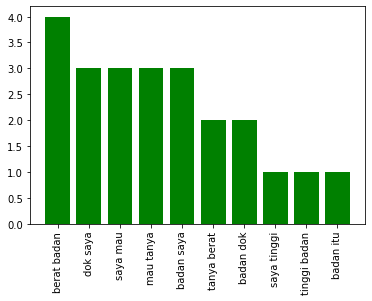



Question
{'punya anak': 2, 'anak lagi': 2, 'ingin hamil': 1, 'hamil pasca': 1, 'pasca steril': 1, 'steril saya': 1, 'saya usia': 1, 'usia tahun': 1, 'tahun sudah': 1, 'sudah kali': 1, 'kali caesar': 1, 'caesar akhir': 1, 'akhir mei': 1, 'mei dan': 1, 'dan putus': 1, 'putus untuk': 1, 'untuk langsung': 1, 'langsung steril': 1, 'steril sekarang': 1, 'sekarang suami': 1, 'suami ingin': 1, 'ingin punya': 1, 'lagi karena': 1, 'karena anak': 1, 'anak kami': 1, 'kami cewek': 1, 'cewek tiga': 1, 'tiga saya': 1, 'saya steril': 1, 'steril potong': 1, 'potong apa': 1, 'apa bisa': 1, 'bisa saya': 1, 'saya punya': 1, 'lagi apa': 1, 'apa bayi': 1, 'bayi tabung': 1, 'tabung bisa': 1, 'bisa jadi': 1, 'jadi solusi': 1, 'solusi nya': 1}


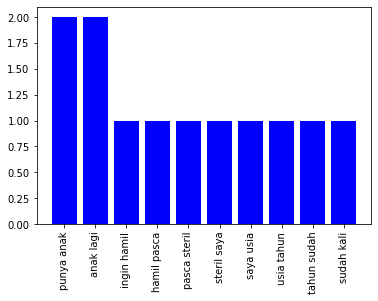

Similar Questions
{'apa boleh': 2, 'boleh hamil': 1, 'hamil lagi': 1, 'lagi telah': 1, 'telah bulan': 1, 'bulan operasi': 1, 'operasi caesar': 1, 'caesar bulan': 1, 'bulan yang': 1, 'yang lalu': 1, 'lalu saya': 1, 'saya lahir': 1, 'lahir dengan': 1, 'dengan cara': 1, 'cara sesar': 1, 'sesar tetapi': 1, 'tetapi bayi': 1, 'bayi saya': 1, 'saya tinggal': 1, 'tinggal saya': 1, 'saya ingin': 1, 'ingin cepat': 1, 'cepat punya': 1, 'punya anak': 1, 'anak lagi': 1, 'lagi apa': 1, 'boleh dengan': 1, 'dengan jarak': 1, 'jarak waktu': 1, 'waktu bulan': 1}


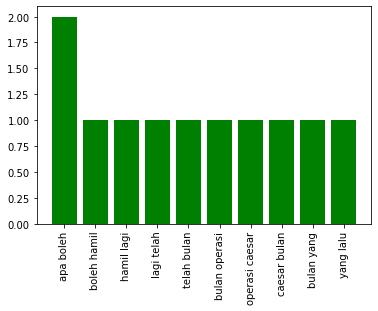



Question
{'mata silinder': 1, 'silinder dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya awal': 1, 'awal mata': 1, 'mata saya': 1, 'saya minus': 1, 'minus terus': 1, 'terus kemarin': 1, 'kemarin waktu': 1, 'waktu periksa': 1, 'periksa kok': 1, 'kok jadi': 1, 'jadi silinder': 1, 'silinder ya': 1, 'ya apa': 1, 'apa hal': 1, 'hal itu': 1, 'itu bisa': 1, 'bisa jadi': 1, 'jadi dan': 1, 'dan apa': 1, 'apa sebab': 1, 'sebab terima': 1, 'terima kasih': 1}


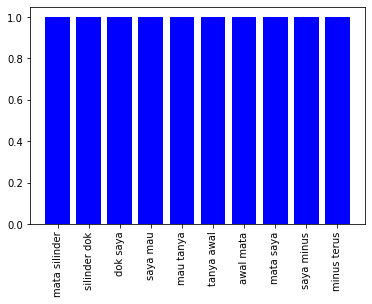

Similar Questions
{'panas dingin': 2, 'mata panas': 1, 'dingin dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya kenapa': 1, 'kenapa mata': 1, 'mata saya': 1, 'saya asa': 1, 'asa lalu': 1, 'lalu jadi': 1, 'jadi badan': 1, 'badan saya': 1, 'saya panas': 1, 'dingin itu': 1, 'itu sebab': 1, 'sebab apa': 1, 'apa ya': 1, 'ya dok': 1, 'dok apa': 1, 'apa itu': 1, 'itu berbahya': 1, 'berbahya dok': 1, 'dok terima': 1, 'terima kasih': 1}


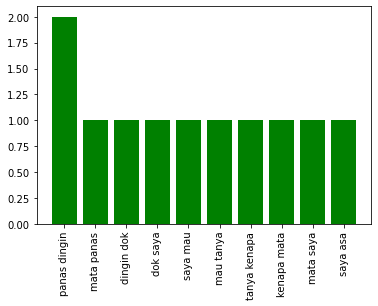



Question
{'operasi caesar': 2, 'nyeri perut': 1, 'perut pasca': 1, 'pasca operasi': 1, 'caesar hallo': 1, 'hallo dok': 1, 'dok langsung': 1, 'langsung saja': 1, 'saja ya': 1, 'ya saya': 1, 'saya bulan': 1, 'bulan yang': 1, 'yang lalu': 1, 'lalu habis': 1, 'habis operasi': 1, 'caesar trz': 1, 'trz langsung': 1, 'langsung steril': 1, 'steril tpii': 1, 'tpii sudah': 1, 'sudah berapa': 1, 'berapa hari': 1, 'hari ini': 1, 'ini perut': 1, 'perut saya': 1, 'saya asa': 1, 'asa nyeri': 1, 'nyeri utama': 1, 'utama perut': 1, 'perut bagi': 1, 'bagi bawah': 1, 'bawah pas': 1, 'pas jahit': 1, 'jahit sampai': 1, 'sampai saya': 1, 'saya alami': 1, 'alami panas': 1, 'panas dingin': 1, 'dingin itu': 1, 'itu kenapa': 1, 'kenapa ya': 1, 'ya dok': 1, 'dok saya': 1, 'saya takut': 1, 'takut kalau': 1, 'kalau jahit': 1, 'jahit saya': 1, 'saya masalah': 1, 'masalah karena': 1, 'karena telah': 1, 'telah lahir': 1, 'lahir langsung': 1, 'langsung beraktifitas': 1, 'beraktifitas seperti': 1, 'seperti biasa': 1,

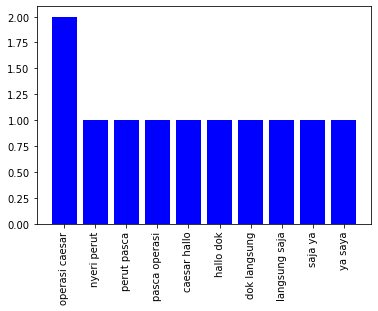

Similar Questions
{'kecil perut': 2, 'perut pasca': 2, 'pasca operasi': 2, 'operasi caesar': 2, 'caesar siang': 1, 'siang dok': 1, 'dok yang': 1, 'yang ingin': 1, 'ingin saya': 1, 'saya tanya': 1, 'tanya bagaimana': 1, 'bagaimana cara': 1, 'cara kecil': 1, 'caesar perut': 1, 'perut saya': 1, 'saya sampai': 1, 'sampai saat': 1, 'saat ini': 1, 'ini masih': 1, 'masih buncit': 1, 'buncit padahal': 1, 'padahal sudah': 1, 'sudah satu': 1, 'satu tahun': 1, 'tahun yang': 1, 'yang kasih': 1}


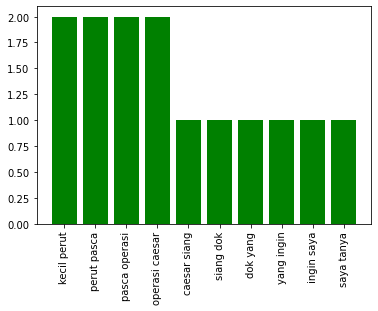



Question
{'maladaptive daydreaming': 2, 'saya buat': 2, 'biasa lamun': 1, 'lamun atau': 1, 'atau khayal': 1, 'khayal cara': 1, 'cara lebih': 1, 'lebih dok': 1, 'dok ini': 1, 'ini saya': 1, 'saya tahu': 1, 'tahu bahwa': 1, 'bahwa saya': 1, 'saya idap': 1, 'idap maladaptive': 1, 'daydreaming terkadang': 1, 'terkadang saya': 1, 'buat cerita': 1, 'cerita lalu': 1, 'lalu peran': 1, 'peran nya': 1, 'nya dan': 1, 'dan terkadang': 1, 'terkadang gera': 1, 'gera saya': 1, 'saya reflek': 1, 'reflek ikut': 1, 'ikut plot': 1, 'plot yang': 1, 'yang saya': 1, 'buat dok': 1, 'dok apakah': 1, 'apakah maladaptive': 1, 'daydreaming kait': 1, 'kait dengan': 1, 'dengan ganggu': 1, 'ganggu jiwa': 1, 'jiwa apa': 1, 'apa saya': 1, 'saya bisa': 1, 'bisa sembuh': 1}


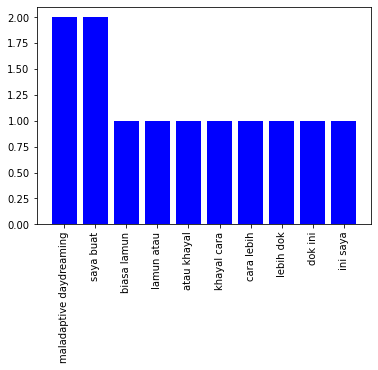

Similar Questions
{'banyak fikiran': 2, 'fikiran dok': 1, 'dok kalau': 1, 'kalau orang': 1, 'orang yang': 1, 'yang terlalu': 1, 'terlalu banyak': 1, 'fikiran hingga': 1, 'hingga rasa': 1, 'rasa tekan': 1, 'tekan kemudian': 1, 'kemudian sering': 1, 'sering keluh': 1, 'keluh putus': 1, 'putus asa': 1, 'asa manyak': 1, 'manyak lamun': 1, 'lamun cara': 1, 'cara tenang': 1, 'tenang gimana': 1, 'gimana dok': 1, 'dok apakah': 1, 'apakah masih': 1, 'masih bisa': 1, 'bisa di': 1, 'di tangan': 1}


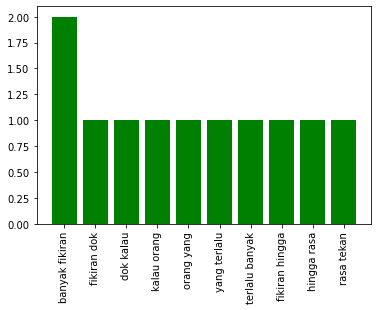



Question
{'sariawan dan': 1, 'dan kait': 1, 'kait dengan': 1, 'dengan demam': 1, 'demam mual': 1, 'mual pusing': 1, 'pusing dok': 1, 'dok saya': 1, 'saya sudah': 1, 'sudah hampir': 1, 'hampir minggu': 1, 'minggu sariawan': 1, 'sariawan yang': 1, 'yang di': 1, 'di sebab': 1, 'sebab bentur': 1, 'bentur oleh': 1, 'oleh sikat': 1, 'sikat pada': 1, 'pada hari': 1, 'hari ke': 1, 'ke malah': 1, 'malah lari': 1, 'lari ke': 1, 'ke demam': 1, 'demam dan': 1, 'dan mual': 1, 'mual juga': 1, 'juga ousing': 1, 'ousing dok': 1, 'dok kenapa': 1, 'kenapa ya': 1, 'ya dok': 1}


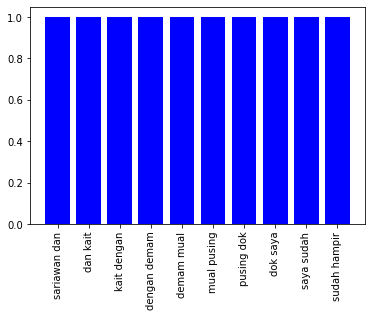

Similar Questions
{'pusing dan': 2, 'dan demam': 1, 'demam saya': 1, 'saya sakit': 1, 'sakit demam': 1, 'demam sama': 1, 'sama pusing': 1, 'dan hari': 1, 'hari lanjut': 1, 'lanjut sembut': 1, 'sembut pusing': 1, 'pusing sama': 1, 'sama demam': 1, 'demam lagi': 1, 'lagi itu': 1, 'itu karena': 1, 'karena kenapa': 1, 'kenapa ya': 1, 'ya dok': 1}


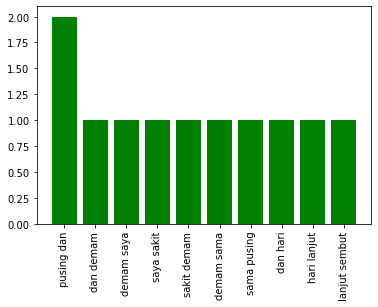



Question
{'mental disorder': 2, 'gadis sebut': 2, 'disorder atau': 1, 'atau tidak': 1, 'tidak salam': 1, 'salam saya': 1, 'saya ada': 1, 'ada pernah': 1, 'pernah dekat': 1, 'dekat dengan': 1, 'dengan orang': 1, 'orang gadis': 1, 'gadis cantik': 1, 'cantik sekitar': 1, 'sekitar umur': 1, 'umur atau': 1, 'atau tahun': 1, 'tahun tetapi': 1, 'tetapi saat': 1, 'saat saya': 1, 'saya ajak': 1, 'ajak obrol': 1, 'obrol hanya': 1, 'hanya saja': 1, 'saja dia': 1, 'dia cuma': 1, 'cuma bicara': 1, 'bicara patah': 1, 'patah kata': 1, 'kata waktu': 1, 'waktu itu': 1, 'itu sambil': 1, 'sambil tertawa': 1, 'tertawa dengan': 1, 'dengan muka': 1, 'muka merah': 1, 'merah lalu': 1, 'lalu gadis': 1, 'gadis itu': 1, 'itu waktu': 1, 'waktu luar': 1, 'luar kantor': 1, 'kantor habis': 1, 'habis makan': 1, 'makan siang': 1, 'siang tuju': 1, 'tuju ruang': 1, 'ruang ke': 1, 'ke meja': 1, 'meja saya': 1, 'saya sempat': 1, 'sempat kejar': 1, 'kejar dengan': 1, 'dengan maksud': 1, 'maksud ada': 1, 'ada cakap': 1, '

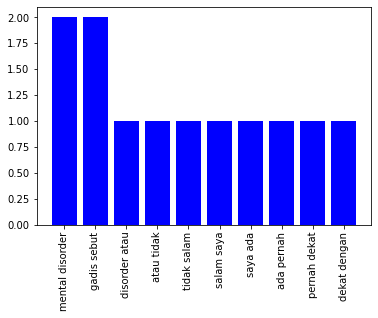

Similar Questions
{'yang saya': 3, 'ingin meni': 3, 'dengan saya': 3, 'saya adalah': 3, 'klik dokter': 2, 'terima kasih': 2, 'kasih atas': 2, 'jejaring sosial': 2, 'saya nilai': 2, 'dia hanya': 2, 'hanya mau': 2, 'meni dengan': 2, 'saya dengan': 2, 'dia saya': 2, 'yang ingin': 2, 'apakah perilaku': 2, 'seperti ini': 2, 'pacar saya': 2, 'saya sudah': 2, 'saya sebut': 2, 'bahwa saya': 2, 'adalah orang': 2, 'orang psikopat': 2, 'ini dengan': 2, 'dengan orang': 2, 'tidak pernah': 2, 'pacar dengan': 2, 'adalah karena': 2, 'saya beri': 2, 'saya takut': 2, 'pasang tepat': 1, 'tepat atau': 1, 'atau tidak': 1, 'tidak salam': 1, 'salam klik': 1, 'dokter terima': 1, 'atas kesempatanya': 1, 'kesempatanya saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya tentang': 1, 'tentang pribadi': 1, 'pribadi orang': 1, 'orang pria': 1, 'pria saya': 1, 'saya kenal': 1, 'kenal orang': 1, 'orang lelaki': 1, 'lelaki dari': 1, 'dari jejaring': 1, 'sosial yang': 1, 'nilai sangat': 1, 'sangat tarik': 1, 'tarik cara': 

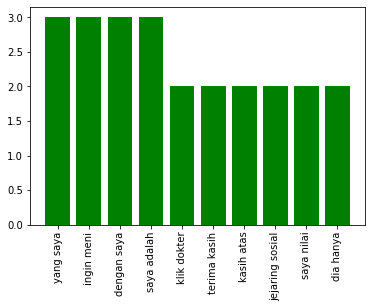



Question
{'untuk derita': 2, 'lambung dan': 2, 'dan liver': 2, 'makan untuk': 1, 'derita sakit': 1, 'sakit lambung': 1, 'liver dok': 1, 'dok saya': 1, 'saya mau': 1, 'mau tanya': 1, 'tanya apa': 1, 'apa saja': 1, 'saja makan': 1, 'makan yang': 1, 'yang boleh': 1, 'boleh untuk': 1, 'derita lambung': 1, 'liver mohon': 1, 'mohon jawab': 1, 'jawab terima': 1, 'terima kasih': 1}


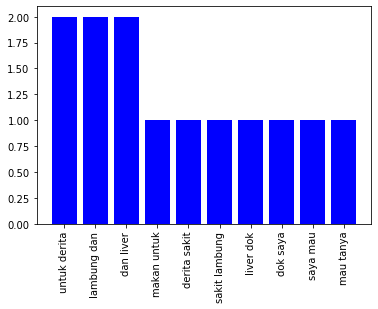

Similar Questions
{'makan dan': 2, 'dan minum': 2, 'diabetes selamat': 2, 'mau tanya': 2, 'untuk derita': 2, 'derita diabetes': 2, 'terima kasih': 2, 'minum untuk': 1, 'untuk diabetes': 1, 'selamat pagi': 1, 'pagi dok': 1, 'dok mau': 1, 'tanya untuk': 1, 'diabetes makan': 1, 'minum yang': 1, 'yang harus': 1, 'harus dikomsumsi': 1, 'dikomsumsi apa': 1, 'apa saja': 1, 'saja terima': 1, 'makan derita': 1, 'selamat siang': 1, 'siang mau': 1, 'tanya makan': 1, 'makan ganti': 1, 'ganti nasi': 1, 'nasi untuk': 1, 'derita abet': 1, 'abet apa': 1, 'apa dok': 1, 'dok tolong': 1, 'tolong jelas': 1, 'jelas terima': 1}


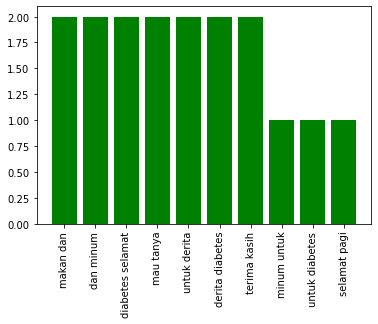

In [103]:
for i in range(len(text_error)):
    if len(text_error[i]) <= 0:
        continue
    print("Question")
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_count = get_ngram_freq(2, full_query)
    question_count = dict(sorted(question_count.items(), key=lambda item: item[1], reverse=True))
    print(question_count)
    plt.bar(list(question_count.keys())[:10], list(question_count.values())[:10], color='b')
    plt.xticks(rotation=90)
    plt.show()
    
    print("Similar Questions")
    text_lst = []
    for error_passage in text_error[i]:
        text_lst.append(error_passage['title']+". "+error_passage['text'])
    passage_count  = get_ngram_freq_lst(2, text_lst)
    passage_count = dict(sorted(passage_count.items(), key=lambda item: item[1], reverse=True))
    print(passage_count)
    plt.bar(list(passage_count.keys())[:10], list(passage_count.values())[:10], color='g')
    plt.xticks(rotation=90)
    plt.show()
    print()
    print()

## Bigram Overlap

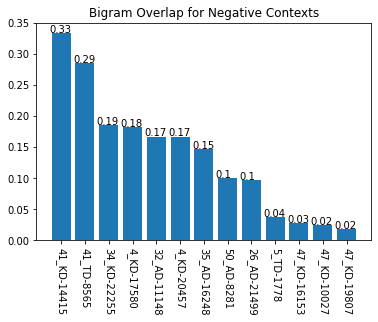

In [104]:
bigram_overlap =  dict()
for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_ngram_cnt = get_ngram_freq(2, full_query)
    qid = gold_data[i]['question']['id']
    for error_passage in text_error[i]:
        pid = error_passage['id']
        row_id = qid+'_'+pid
        full_passage = error_passage['title'] + ". "+error_passage['text']
        passage_ngram_cnt = get_ngram_freq(2, full_passage)
        bigram_overlap[row_id] = get_union_term_cnt_normalized(question_ngram_cnt, passage_ngram_cnt)
bigram_overlap = dict(sorted(bigram_overlap.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(bigram_overlap.keys()), list(bigram_overlap.values()))
xlocs, xlabs = plt.xticks(rotation=270)
plt.title("Bigram Overlap for Negative Contexts")
for i, v in enumerate(list(bigram_overlap.values())):
    plt.text(xlocs[i] - 0.5, v + 0.001, str(round(v, 2)))
plt.show()

## Trigram Analysis

Question
{'benjol di sekitar': 1, 'di sekitar kelamin': 1, 'sekitar kelamin sore': 1, 'kelamin sore dok': 1, 'sore dok maaf': 1, 'dok maaf dok': 1, 'maaf dok saya': 1, 'dok saya sudah': 1, 'saya sudah hari': 1, 'sudah hari alami': 1, 'hari alami benjol': 1, 'alami benjol di': 1, 'benjol di daerah': 1, 'di daerah malu': 1, 'daerah malu benjol': 1, 'malu benjol sebut': 1, 'benjol sebut kecil': 1, 'sebut kecil dan': 1, 'kecil dan sekarang': 1, 'dan sekarang besar': 1, 'sekarang besar lalu': 1, 'besar lalu pecah': 1, 'lalu pecah dok': 1, 'pecah dok rasa': 1, 'dok rasa linu': 1, 'rasa linu dan': 1, 'linu dan sakit': 1, 'dan sakit jika': 1, 'sakit jika malam': 1, 'jika malam hari': 1, 'malam hari apa': 1, 'hari apa nama': 1, 'apa nama sakit': 1, 'nama sakit yang': 1, 'sakit yang saya': 1, 'yang saya alami': 1, 'saya alami ya': 1, 'alami ya dok': 1}


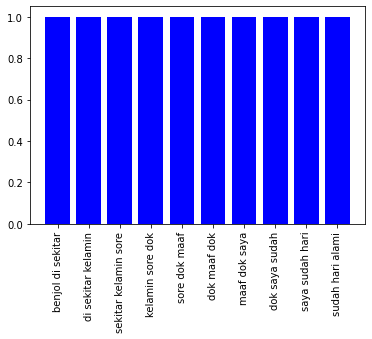

Similar Questions
{}


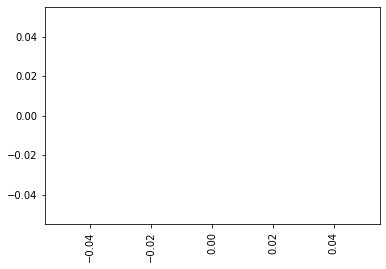



Question
{'tanya dok ibu': 1, 'dok ibu saya': 1, 'ibu saya tahun': 1, 'saya tahun diabetes': 1, 'tahun diabetes dan': 1, 'diabetes dan sempat': 1, 'dan sempat stroke': 1, 'sempat stroke sekarang': 1, 'stroke sekarang jalan': 1, 'sekarang jalan harus': 1, 'jalan harus di': 1, 'harus di papah': 1, 'di papah kreatinin': 1, 'papah kreatinin natrium': 1, 'kreatinin natrium kalum': 1, 'natrium kalum ureum': 1, 'kalum ureum di': 1, 'ureum di vonis': 1, 'di vonis untuk': 1, 'vonis untuk hd': 1, 'untuk hd tetapi': 1, 'hd tetapi saya': 1, 'tetapi saya ragu': 1, 'saya ragu karena': 1, 'ragu karena ibu': 1, 'karena ibu saya': 1, 'ibu saya pipis': 1, 'saya pipis masih': 1, 'pipis masih banyak': 1, 'masih banyak utama': 1, 'banyak utama malam': 1, 'utama malam sampai': 1, 'malam sampai pagi': 1, 'sampai pagi hari': 1, 'pagi hari banjir': 1, 'hari banjir saya': 1, 'banjir saya tanya': 1, 'saya tanya pada': 1, 'tanya pada yang': 1, 'pada yang hd': 1, 'yang hd kalau': 1, 'hd kalau mereka': 1, 'kalau 

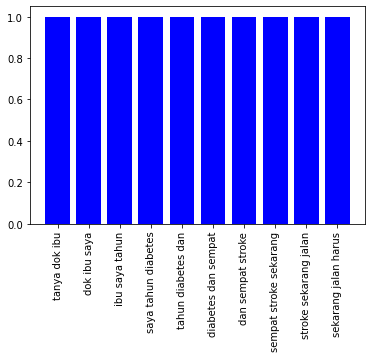

Similar Questions
{}


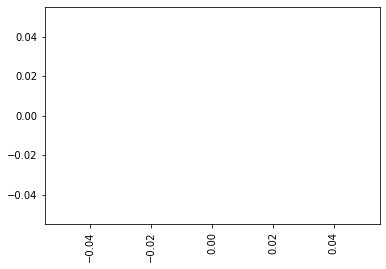



Question
{'sebab warna kuning': 1, 'warna kuning pada': 1, 'kuning pada gigi': 1, 'pada gigi selamat': 1, 'gigi selamat siang': 1, 'selamat siang dokter': 1, 'siang dokter saya': 1, 'dokter saya ingin': 1, 'saya ingin tanya': 1, 'ingin tanya tentang': 1, 'tanya tentang gigi': 1, 'tentang gigi saya': 1, 'gigi saya dulu': 1, 'saya dulu gigi': 1, 'dulu gigi saya': 1, 'gigi saya tidak': 1, 'saya tidak ada': 1, 'tidak ada yang': 1, 'ada yang kuning': 1, 'yang kuning tetapi': 1, 'kuning tetapi tiap': 1, 'tetapi tiap muncul': 1, 'tiap muncul gigi': 1, 'muncul gigi baru': 1, 'gigi baru gigi': 1, 'baru gigi saya': 1, 'gigi saya jadi': 1, 'saya jadi kuning': 1, 'jadi kuning kuning': 1, 'kuning kuning dari': 1, 'kuning dari pertama': 1, 'dari pertama ganti': 1, 'pertama ganti gigi': 1, 'ganti gigi saya': 1, 'gigi saya sudah': 1, 'saya sudah sikat': 1, 'sudah sikat gigi': 1, 'sikat gigi sampai': 1, 'gigi sampai kali': 1, 'sampai kali hari': 1, 'kali hari tetapi': 1, 'hari tetapi tidak': 1, 'teta

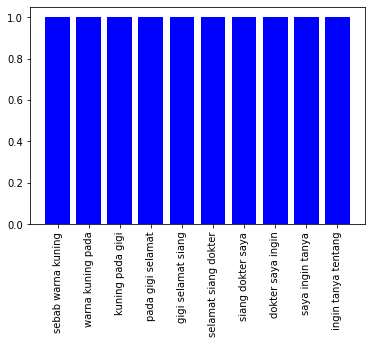

Similar Questions
{}


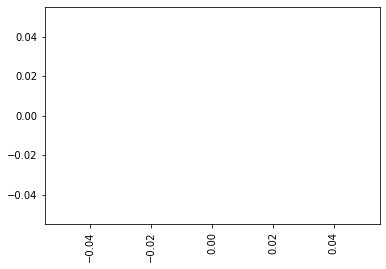



Question
{'dok ada efek': 1, 'ada efek samping': 1, 'efek samping tidak': 1, 'samping tidak jika': 1, 'tidak jika tidak': 1, 'jika tidak laku': 1, 'tidak laku imunisasi': 1, 'laku imunisasi lanjut': 1, 'imunisasi lanjut lagi': 1}


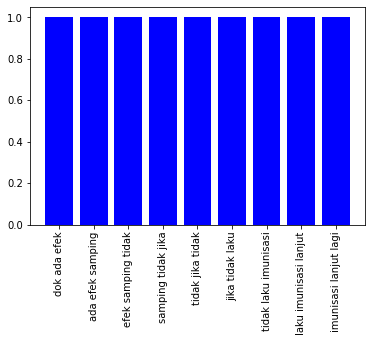

Similar Questions
{}


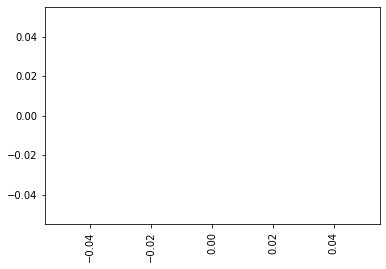



Question
{'operasi batu kandung': 2, 'batu kandung kemih': 2, 'keluar lalu luka': 2, 'lalu luka operasi': 2, 'keluh pasca operasi': 1, 'pasca operasi batu': 1, 'kandung kemih selamat': 1, 'kemih selamat siang': 1, 'selamat siang dok': 1, 'siang dok nama': 1, 'dok nama saya': 1, 'nama saya john': 1, 'saya john usia': 1, 'john usia tahun': 1, 'usia tahun saya': 1, 'tahun saya barusaja': 1, 'saya barusaja laku': 1, 'barusaja laku operasi': 1, 'laku operasi batu': 1, 'kandung kemih akan': 1, 'kemih akan tetapi': 1, 'akan tetapi sekarang': 1, 'tetapi sekarang urin': 1, 'sekarang urin selalu': 1, 'urin selalu keluar': 1, 'selalu keluar lalu': 1, 'luka operasi tanya': 1, 'operasi tanya saya': 1, 'tanya saya apakah': 1, 'saya apakah luka': 1, 'apakah luka operasi': 1, 'luka operasi saya': 1, 'operasi saya dapat': 1, 'saya dapat di': 1, 'dapat di sembuh': 1, 'di sembuh dengan': 1, 'sembuh dengan urin': 1, 'dengan urin yang': 1, 'urin yang selalu': 1, 'yang selalu basah': 1, 'selalu basah dan'

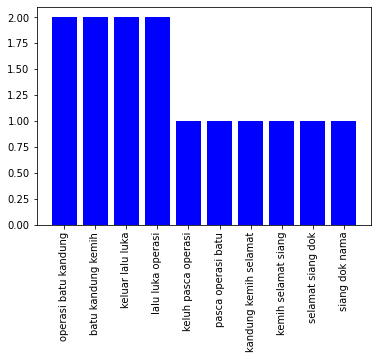

Similar Questions
{}


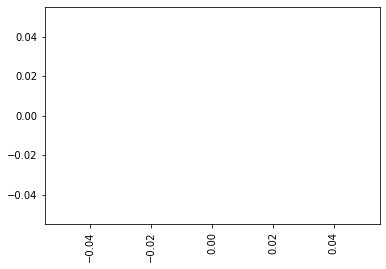



Question
{'infeksi indung telur': 2, 'indung telur dok': 1, 'telur dok kemarin': 1, 'dok kemarin saya': 1, 'kemarin saya saran': 1, 'saya saran oleh': 1, 'saran oleh dokter': 1, 'oleh dokter saya': 1, 'dokter saya untuk': 1, 'saya untuk laku': 1, 'untuk laku usg': 1, 'laku usg karena': 1, 'usg karena saya': 1, 'karena saya sering': 1, 'saya sering alami': 1, 'sering alami nyeri': 1, 'alami nyeri perut': 1, 'nyeri perut pada': 1, 'perut pada saat': 1, 'pada saat menstruasi': 1, 'saat menstruasi dan': 1, 'menstruasi dan hasil': 1, 'dan hasil usg': 1, 'hasil usg nya': 1, 'usg nya nyata': 1, 'nya nyata saya': 1, 'nyata saya alami': 1, 'saya alami sakit': 1, 'alami sakit infeksi': 1, 'sakit infeksi indung': 1, 'indung telur apa': 1, 'telur apa langkah': 1, 'apa langkah yang': 1, 'langkah yang saya': 1, 'yang saya ambil': 1, 'saya ambil lanjut': 1, 'ambil lanjut sampai': 1, 'lanjut sampai saat': 1, 'sampai saat ini': 1, 'saat ini saya': 1, 'ini saya hanya': 1, 'saya hanya biar': 1, 'hanya 

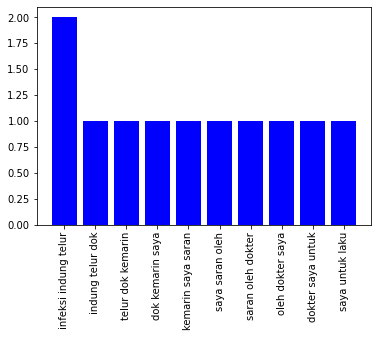

Similar Questions
{}


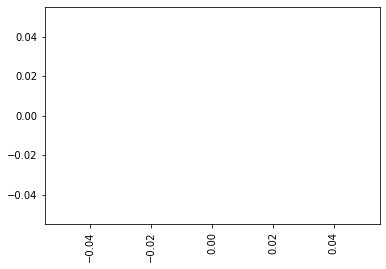



Question
{'telapak tangan saya': 2, 'tangan gatal dan': 1, 'gatal dan lapis': 1, 'dan lapis kulit': 1, 'lapis kulit luar': 1, 'kulit luar kelupas': 1, 'luar kelupas dok': 1, 'kelupas dok telapak': 1, 'dok telapak tangan': 1, 'tangan saya ini': 1, 'saya ini banyak': 1, 'ini banyak bintik': 1, 'banyak bintik merah': 1, 'bintik merah terus': 1, 'merah terus kulit': 1, 'terus kulit luar': 1, 'kulit luar telapak': 1, 'luar telapak tangan': 1, 'telapak tangan kelupas': 1, 'tangan kelupas sudah': 1, 'kelupas sudah kali': 1, 'sudah kali saya': 1, 'kali saya alami': 1, 'saya alami ini': 1, 'alami ini dok': 1, 'ini dok dulu': 1, 'dok dulu sembuh': 1, 'dulu sembuh bulan': 1, 'sembuh bulan lebih': 1, 'bulan lebih saya': 1, 'lebih saya mau': 1, 'saya mau tanya': 1, 'mau tanya solusi': 1, 'tanya solusi dari': 1, 'solusi dari dokter': 1, 'dari dokter dan': 1, 'dokter dan sakit': 1, 'dan sakit apa': 1, 'sakit apa yang': 1, 'apa yang ada': 1, 'yang ada di': 1, 'ada di telapak': 1, 'di telapak tangan'

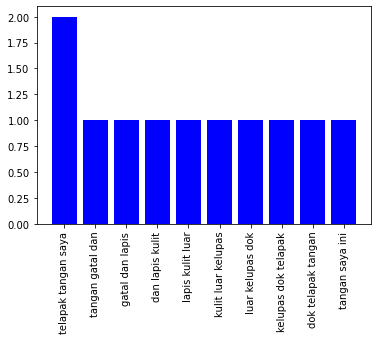

Similar Questions
{'putih di telapak': 1, 'di telapak tangan': 1, 'telapak tangan asslamualaikum': 1, 'tangan asslamualaikum dok': 1, 'asslamualaikum dok saya': 1, 'dok saya punya': 1, 'saya punya sakit': 1, 'punya sakit kulit': 1, 'sakit kulit di': 1, 'kulit di bagi': 1, 'di bagi telapak': 1, 'bagi telapak tangan': 1, 'telapak tangan warna': 1, 'tangan warna putih': 1, 'warna putih putih': 1, 'putih putih mirip': 1, 'putih mirip panu': 1, 'mirip panu tetapi': 1, 'panu tetapi tidak': 1, 'tetapi tidak gatal': 1, 'tidak gatal smakin': 1, 'gatal smakin lama': 1, 'smakin lama makin': 1, 'lama makin sebar': 1, 'makin sebar sakit': 1, 'sebar sakit apa': 1, 'sakit apa dan': 1, 'apa dan bagaimana': 1, 'dan bagaimana cara': 1, 'bagaimana cara penyembuhnnya': 1, 'cara penyembuhnnya dok': 1, 'penyembuhnnya dok terima': 1, 'dok terima kasih': 1}


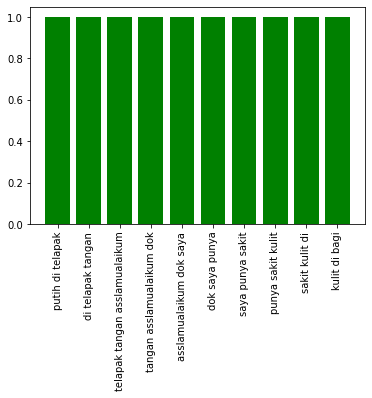



Question
{'ukur lebih besar': 2, 'ketika tahi lalat': 1, 'tahi lalat ubah': 1, 'lalat ubah warna': 1, 'ubah warna jadi': 1, 'warna jadi merah': 1, 'jadi merah bahaya': 1, 'merah bahaya saya': 1, 'bahaya saya punya': 1, 'saya punya tahi': 1, 'punya tahi lalat': 1, 'tahi lalat di': 1, 'lalat di atas': 1, 'di atas bibir': 1, 'atas bibir di': 1, 'bibir di mana': 1, 'di mana ada': 1, 'mana ada dua': 1, 'ada dua tahi': 1, 'dua tahi lalat': 1, 'tahi lalat dekat': 1, 'lalat dekat satu': 1, 'dekat satu ukur': 1, 'satu ukur lebih': 1, 'lebih besar dari': 1, 'besar dari yang': 1, 'dari yang satu': 1, 'yang satu lagi': 1, 'satu lagi dalam': 1, 'lagi dalam dua': 1, 'dalam dua tahun': 1, 'dua tahun akhir': 1, 'tahun akhir ini': 1, 'akhir ini tahi': 1, 'ini tahi lalat': 1, 'tahi lalat yang': 1, 'lalat yang ukur': 1, 'yang ukur lebih': 1, 'lebih besar ubah': 1, 'besar ubah jadi': 1, 'ubah jadi merah': 1, 'jadi merah dan': 1, 'merah dan rambut': 1, 'dan rambut atau': 1, 'rambut atau kumis': 1, 'atau 

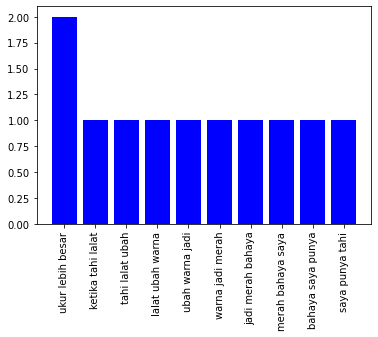

Similar Questions
{}


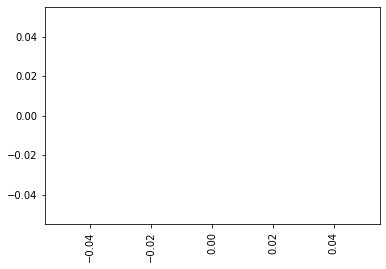



Question
{'bentur sepeda motor': 2, 'tulang kering sakit': 1, 'kering sakit akibat': 1, 'sakit akibat bentur': 1, 'akibat bentur sepeda': 1, 'sepeda motor bahaya': 1, 'motor bahaya siang': 1, 'bahaya siang dok': 1, 'siang dok jadi': 1, 'dok jadi beberapa': 1, 'jadi beberapa bulan': 1, 'beberapa bulan yang': 1, 'bulan yang lalu': 1, 'yang lalu tulang': 1, 'lalu tulang kering': 1, 'tulang kering saya': 1, 'kering saya bentur': 1, 'saya bentur sepeda': 1, 'sepeda motor lalu': 1, 'motor lalu muncul': 1, 'lalu muncul bengkak': 1, 'muncul bengkak dan': 1, 'bengkak dan lebam': 1, 'dan lebam seperti': 1, 'lebam seperti biasa': 1, 'seperti biasa telah': 1, 'biasa telah bentur': 1, 'telah bentur lebam': 1, 'bentur lebam itu': 1, 'lebam itu hilang': 1, 'itu hilang iring': 1, 'hilang iring waktu': 1, 'iring waktu namun': 1, 'waktu namun rasa': 1, 'namun rasa sakit': 1, 'rasa sakit bila': 1, 'sakit bila sentuh': 1, 'bila sentuh dan': 1, 'sentuh dan bila': 1, 'dan bila pakai': 1, 'bila pakai untuk

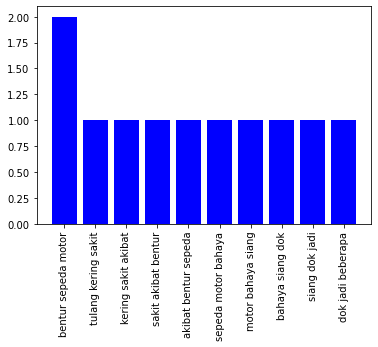

Similar Questions
{}


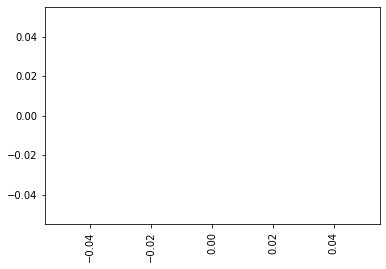



Question
{'tambah berat badan': 1, 'berat badan saat': 1, 'badan saat hamil': 1, 'saat hamil dok': 1, 'hamil dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya saya': 1, 'tanya saya hamil': 1, 'saya hamil minggu': 1, 'hamil minggu terus': 1, 'minggu terus di': 1, 'terus di suru': 1, 'di suru sama': 1, 'suru sama bidan': 1, 'sama bidan agar': 1, 'bidan agar berat': 1, 'agar berat badan': 1, 'berat badan saya': 1, 'badan saya itu': 1, 'saya itu harus': 1, 'itu harus bertamba': 1, 'harus bertamba kok': 1, 'bertamba kok berat': 1, 'kok berat bada': 1, 'berat bada saya': 1, 'bada saya tidak': 1, 'saya tidak biasa': 1, 'tidak biasa naik': 1, 'biasa naik padahal': 1, 'naik padahal sudah': 1, 'padahal sudah usahain': 1, 'sudah usahain sering': 1, 'usahain sering makan': 1, 'sering makan dan': 1, 'makan dan komsusi': 1, 'dan komsusi buah': 1}


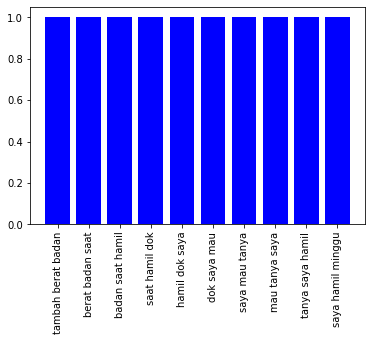

Similar Questions
{'dok saya mau': 3, 'saya mau tanya': 3, 'mau tanya berat': 2, 'tanya berat badan': 2, 'berat badan dok': 2, 'badan dok saya': 2, 'berat badan saya': 2, 'badan saya tinggi': 1, 'saya tinggi badan': 1, 'tinggi badan itu': 1, 'badan itu masuk': 1, 'itu masuk normal': 1, 'masuk normal apa': 1, 'normal apa kurus': 1, 'apa kurus terima': 1, 'kurus terima kasih': 1, 'tambah berat badan': 1, 'mau tanya kenapa': 1, 'tanya kenapa berat': 1, 'kenapa berat badan': 1, 'badan saya tidak': 1, 'saya tidak pernah': 1, 'tidak pernah naik': 1, 'pernah naik padahal': 1, 'naik padahal makan': 1, 'padahal makan sudah': 1, 'makan sudah atur': 1, 'sudah atur dan': 1, 'atur dan lagi': 1, 'dan lagi badan': 1, 'lagi badan saya': 1, 'badan saya seperti': 1, 'saya seperti kena': 1, 'seperti kena cacar': 1, 'kena cacar di': 1, 'cacar di sekitar': 1, 'di sekitar tangan': 1}


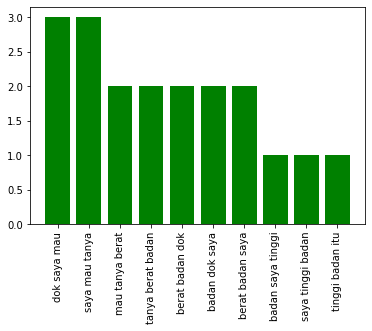



Question
{'keringat saat sakit': 1, 'saat sakit dok': 1, 'sakit dok saya': 1, 'dok saya sengaja': 1, 'saya sengaja mati': 1, 'sengaja mati ac': 1, 'mati ac ruang': 1, 'ac ruang kerja': 1, 'ruang kerja saya': 1, 'kerja saya karena': 1, 'saya karena saya': 1, 'karena saya sedang': 1, 'saya sedang batuk': 1, 'sedang batuk dan': 1, 'batuk dan demam': 1, 'dan demam keringat': 1, 'demam keringat keluar': 1, 'keringat keluar banyak': 1, 'keluar banyak bareng': 1, 'banyak bareng dengan': 1, 'bareng dengan banyak': 1, 'dengan banyak minum': 1, 'banyak minum sambil': 1, 'minum sambil kerja': 1, 'sambil kerja apakah': 1, 'kerja apakah keringat': 1, 'apakah keringat ini': 1, 'keringat ini sehat': 1, 'ini sehat dok': 1}


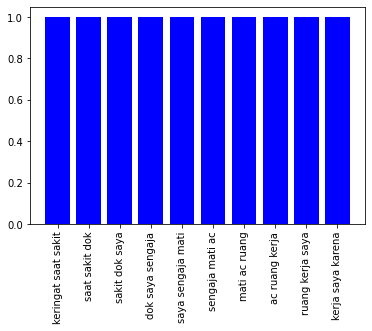

Similar Questions
{}


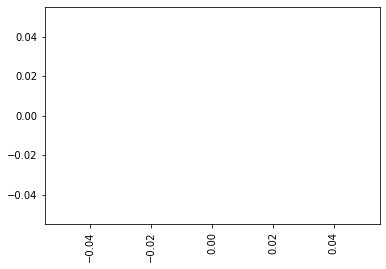



Question
{'sudah tidak mau': 2, 'mau minum susu': 2, 'minum susu formula': 2, 'beri susu formula': 2, 'saya tinggal kerja': 2, 'bayi sudah tidak': 1, 'tidak mau minum': 1, 'susu formula sudah': 1, 'formula sudah minggu': 1, 'sudah minggu ini': 1, 'minggu ini dok': 1, 'ini dok bayi': 1, 'dok bayi saya': 1, 'bayi saya bulan': 1, 'saya bulan sudah': 1, 'bulan sudah tidak': 1, 'tidak mau beri': 1, 'mau beri susu': 1, 'susu formula lama': 1, 'formula lama saya': 1, 'lama saya tinggal': 1, 'tinggal kerja sehingga': 1, 'kerja sehingga hanya': 1, 'sehingga hanya minum': 1, 'hanya minum asi': 1, 'minum asi saya': 1, 'asi saya belum': 1, 'saya belum saya': 1, 'belum saya berangkat': 1, 'saya berangkat kerja': 1, 'berangkat kerja dan': 1, 'kerja dan telah': 1, 'dan telah saya': 1, 'telah saya kerja': 1, 'saya kerja antara': 1, 'kerja antara waktu': 1, 'antara waktu sebut': 1, 'waktu sebut kerja': 1, 'sebut kerja keluarga': 1, 'kerja keluarga hanya': 1, 'keluarga hanya beri': 1, 'hanya beri air'

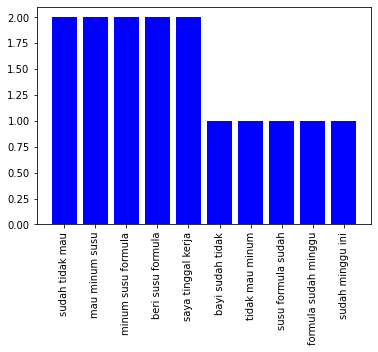

Similar Questions
{}


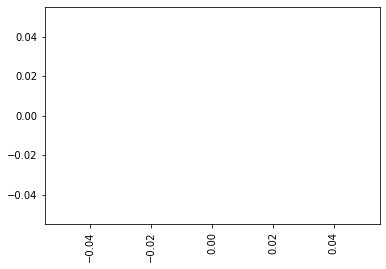



Question
{'nyeri di ulu': 3, 'di ulu hati': 3, 'ulu hati gejala': 1, 'hati gejala sakit': 1, 'gejala sakit lambung': 1, 'sakit lambung dok': 1, 'lambung dok sudah': 1, 'dok sudah hari': 1, 'sudah hari ini': 1, 'hari ini saya': 1, 'ini saya alami': 1, 'saya alami sakit': 1, 'alami sakit atau': 1, 'sakit atau nyeri': 1, 'atau nyeri di': 1, 'ulu hati terkadang': 1, 'hati terkadang di': 1, 'terkadang di perut': 1, 'di perut bagi': 1, 'perut bagi kiri': 1, 'bagi kiri serta': 1, 'kiri serta mual': 1, 'serta mual pusing': 1, 'mual pusing leher': 1, 'pusing leher kaku': 1, 'leher kaku lemas': 1, 'kaku lemas kadang': 1, 'lemas kadang sampai': 1, 'kadang sampai seperti': 1, 'sampai seperti mau': 1, 'seperti mau pingsan': 1, 'mau pingsan kalau': 1, 'pingsan kalau pagi': 1, 'kalau pagi keringat': 1, 'pagi keringat dingin': 1, 'keringat dingin dan': 1, 'dingin dan malam': 1, 'dan malam hari': 1, 'malam hari badan': 1, 'hari badan asa': 1, 'badan asa panas': 1, 'asa panas dan': 1, 'panas dan nyeri

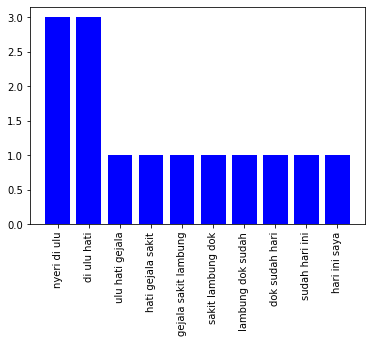

Similar Questions
{}


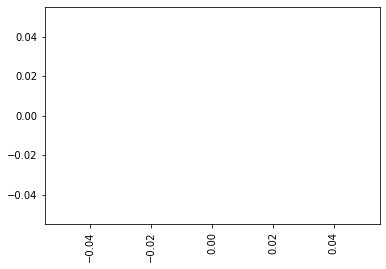



Question
{'belum lancar bicara': 1, 'lancar bicara di': 1, 'bicara di usia': 1, 'di usia tahun': 1, 'usia tahun bagaimana': 1, 'tahun bagaimana solusi': 1, 'bagaimana solusi dok': 1, 'solusi dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya anak': 1, 'tanya anak saya': 1, 'anak saya sekarang': 1, 'saya sekarang sudah': 1, 'sekarang sudah hampir': 1, 'sudah hampir umur': 1, 'hampir umur tiga': 1, 'umur tiga tahun': 1, 'tiga tahun tetapi': 1, 'tahun tetapi kenapa': 1, 'tetapi kenapa ya': 1, 'kenapa ya bicara': 1, 'ya bicara anak': 1, 'bicara anak susah': 1, 'anak susah dia': 1, 'susah dia selalu': 1, 'dia selalu jika': 1, 'selalu jika ingin': 1, 'jika ingin sesuatu': 1, 'ingin sesuatu bicara': 1, 'sesuatu bicara sekal': 1, 'bicara sekal dan': 1, 'sekal dan banyak': 1, 'dan banyak rengek': 1, 'banyak rengek dok': 1, 'rengek dok padahal': 1, 'dok padahal saya': 1, 'padahal saya selalu': 1, 'saya selalu ajak': 1, 'selalu ajak anak': 1, 'ajak anak bicara': 1, 'anak bicara ba

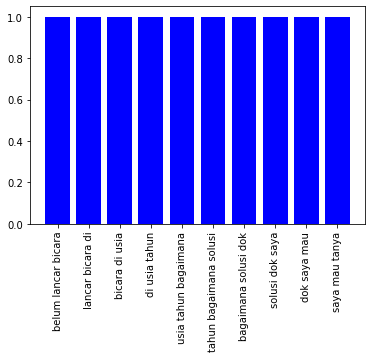

Similar Questions
{}


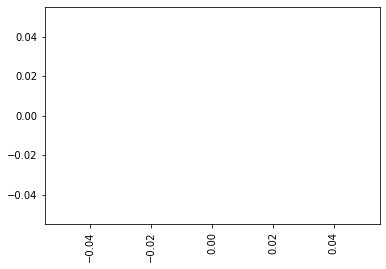



Question
{'cedera ligamen saya': 1, 'ligamen saya ingin': 1, 'saya ingin tanya': 1, 'ingin tanya soal': 1, 'tanya soal cedera': 1, 'soal cedera ligamen': 1, 'cedera ligamen itu': 1, 'ligamen itu kan': 1, 'itu kan sebab': 1, 'kan sebab karena': 1, 'sebab karena bentur': 1, 'karena bentur celaka': 1, 'bentur celaka atau': 1, 'celaka atau olahraga': 1, 'atau olahraga berat': 1, 'olahraga berat ya': 1, 'berat ya dok': 1, 'ya dok saya': 1, 'dok saya penasaran': 1, 'saya penasaran apakah': 1, 'penasaran apakah cedera': 1, 'apakah cedera seperti': 1, 'cedera seperti itu': 1, 'seperti itu bisa': 1, 'itu bisa cegah': 1, 'bisa cegah atau': 1, 'cegah atau bisa': 1, 'atau bisa tahu': 1, 'bisa tahu belum': 1, 'tahu belum seperti': 1, 'belum seperti tubuh': 1, 'seperti tubuh tidak': 1, 'tubuh tidak fit': 1, 'tidak fit bisa': 1, 'fit bisa cedera': 1, 'bisa cedera ligamen': 1, 'cedera ligamen atau': 1, 'ligamen atau bagaimana': 1, 'atau bagaimana apa': 1, 'bagaimana apa bisa': 1, 'apa bisa deteksi':

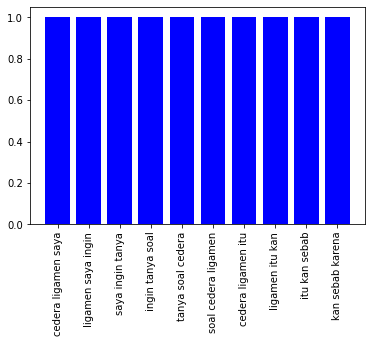

Similar Questions
{}


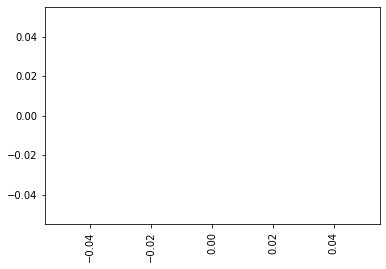



Question
{'punya anak lagi': 2, 'ingin hamil pasca': 1, 'hamil pasca steril': 1, 'pasca steril saya': 1, 'steril saya usia': 1, 'saya usia tahun': 1, 'usia tahun sudah': 1, 'tahun sudah kali': 1, 'sudah kali caesar': 1, 'kali caesar akhir': 1, 'caesar akhir mei': 1, 'akhir mei dan': 1, 'mei dan putus': 1, 'dan putus untuk': 1, 'putus untuk langsung': 1, 'untuk langsung steril': 1, 'langsung steril sekarang': 1, 'steril sekarang suami': 1, 'sekarang suami ingin': 1, 'suami ingin punya': 1, 'ingin punya anak': 1, 'anak lagi karena': 1, 'lagi karena anak': 1, 'karena anak kami': 1, 'anak kami cewek': 1, 'kami cewek tiga': 1, 'cewek tiga saya': 1, 'tiga saya steril': 1, 'saya steril potong': 1, 'steril potong apa': 1, 'potong apa bisa': 1, 'apa bisa saya': 1, 'bisa saya punya': 1, 'saya punya anak': 1, 'anak lagi apa': 1, 'lagi apa bayi': 1, 'apa bayi tabung': 1, 'bayi tabung bisa': 1, 'tabung bisa jadi': 1, 'bisa jadi solusi': 1, 'jadi solusi nya': 1}


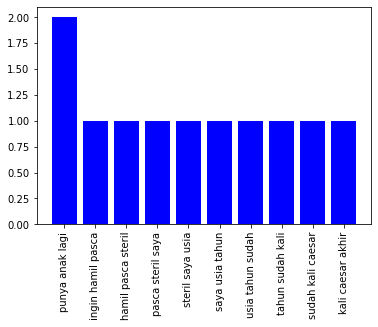

Similar Questions
{'apa boleh hamil': 1, 'boleh hamil lagi': 1, 'hamil lagi telah': 1, 'lagi telah bulan': 1, 'telah bulan operasi': 1, 'bulan operasi caesar': 1, 'operasi caesar bulan': 1, 'caesar bulan yang': 1, 'bulan yang lalu': 1, 'yang lalu saya': 1, 'lalu saya lahir': 1, 'saya lahir dengan': 1, 'lahir dengan cara': 1, 'dengan cara sesar': 1, 'cara sesar tetapi': 1, 'sesar tetapi bayi': 1, 'tetapi bayi saya': 1, 'bayi saya tinggal': 1, 'saya tinggal saya': 1, 'tinggal saya ingin': 1, 'saya ingin cepat': 1, 'ingin cepat punya': 1, 'cepat punya anak': 1, 'punya anak lagi': 1, 'anak lagi apa': 1, 'lagi apa boleh': 1, 'apa boleh dengan': 1, 'boleh dengan jarak': 1, 'dengan jarak waktu': 1, 'jarak waktu bulan': 1}


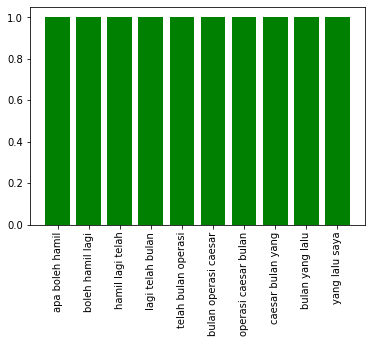



Question
{'rasa gatal pada': 1, 'gatal pada wasir': 1, 'pada wasir maaf': 1, 'wasir maaf dok': 1, 'maaf dok mau': 1, 'dok mau tanya': 1, 'mau tanya istri': 1, 'tanya istri saya': 1, 'istri saya rasa': 1, 'saya rasa gatal': 1, 'rasa gatal yang': 1, 'gatal yang sudah': 1, 'yang sudah cukup': 1, 'sudah cukup lama': 1, 'cukup lama di': 1, 'lama di bagi': 1, 'di bagi ani': 1, 'bagi ani seperti': 1, 'ani seperti tonjol': 1, 'seperti tonjol yang': 1, 'tonjol yang sebut': 1, 'yang sebut wasir': 1, 'sebut wasir apakah': 1, 'wasir apakah itu': 1, 'apakah itu bahaya': 1, 'itu bahaya dan': 1, 'bahaya dan bagaimana': 1, 'dan bagaimana cara': 1, 'bagaimana cara atas': 1, 'cara atas dan': 1, 'atas dan apakah': 1, 'dan apakah bisa': 1, 'apakah bisa sembuh': 1, 'bisa sembuh tanpa': 1, 'sembuh tanpa operasi': 1, 'tanpa operasi terima': 1, 'operasi terima kasih': 1, 'terima kasih dokter': 1, 'kasih dokter belum': 1}


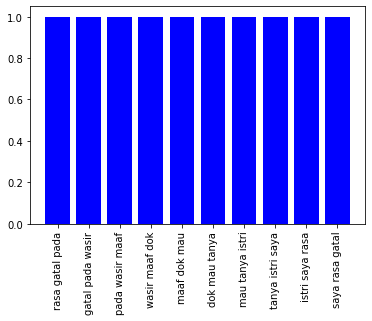

Similar Questions
{}


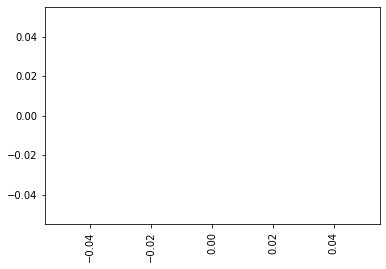



Question
{'efek samping telah': 1, 'samping telah alami': 1, 'telah alami serang': 1, 'alami serang panik': 1, 'serang panik dok': 1, 'panik dok mau': 1, 'dok mau tanya': 1, 'mau tanya saya': 1, 'tanya saya telah': 1, 'saya telah kena': 1, 'telah kena panic': 1, 'kena panic attack': 1, 'panic attack karena': 1, 'attack karena depresi': 1, 'karena depresi yang': 1, 'depresi yang sangat': 1, 'yang sangat berat': 1, 'sangat berat kena': 1, 'berat kena efek': 1, 'kena efek samping': 1, 'efek samping yaitu': 1, 'samping yaitu kaki': 1, 'yaitu kaki semut': 1, 'kaki semut yang': 1, 'semut yang panjang': 1, 'yang panjang dan': 1, 'panjang dan jadi': 1, 'dan jadi tidak': 1, 'jadi tidak bisa': 1, 'tidak bisa fokus': 1, 'bisa fokus dok': 1, 'fokus dok dan': 1, 'dok dan ketka': 1, 'dan ketka malam': 1, 'ketka malam sensasi': 1, 'malam sensasi panic': 1, 'sensasi panic attack': 1, 'panic attack selalu': 1, 'attack selalu ingin': 1, 'selalu ingin muncul': 1, 'ingin muncul saya': 1, 'muncul saya ke

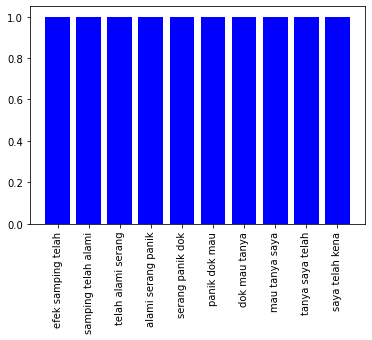

Similar Questions
{}


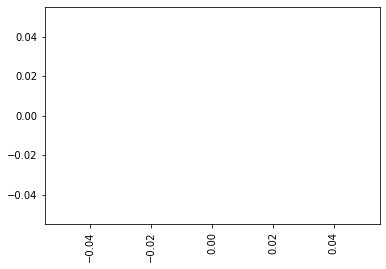



Question
{'mata silinder dok': 1, 'silinder dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya awal': 1, 'tanya awal mata': 1, 'awal mata saya': 1, 'mata saya minus': 1, 'saya minus terus': 1, 'minus terus kemarin': 1, 'terus kemarin waktu': 1, 'kemarin waktu periksa': 1, 'waktu periksa kok': 1, 'periksa kok jadi': 1, 'kok jadi silinder': 1, 'jadi silinder ya': 1, 'silinder ya apa': 1, 'ya apa hal': 1, 'apa hal itu': 1, 'hal itu bisa': 1, 'itu bisa jadi': 1, 'bisa jadi dan': 1, 'jadi dan apa': 1, 'dan apa sebab': 1, 'apa sebab terima': 1, 'sebab terima kasih': 1}


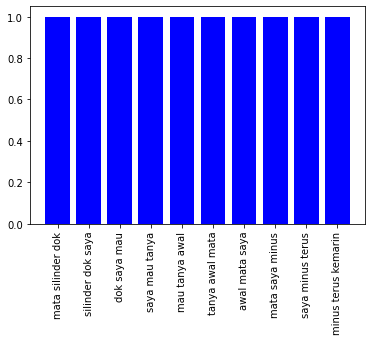

Similar Questions
{'mata panas dingin': 1, 'panas dingin dok': 1, 'dingin dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya kenapa': 1, 'tanya kenapa mata': 1, 'kenapa mata saya': 1, 'mata saya asa': 1, 'saya asa lalu': 1, 'asa lalu jadi': 1, 'lalu jadi badan': 1, 'jadi badan saya': 1, 'badan saya panas': 1, 'saya panas dingin': 1, 'panas dingin itu': 1, 'dingin itu sebab': 1, 'itu sebab apa': 1, 'sebab apa ya': 1, 'apa ya dok': 1, 'ya dok apa': 1, 'dok apa itu': 1, 'apa itu berbahya': 1, 'itu berbahya dok': 1, 'berbahya dok terima': 1, 'dok terima kasih': 1}


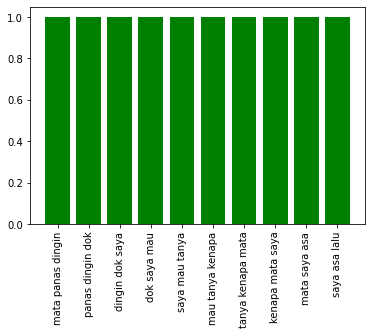



Question
{'nyeri perut pasca': 1, 'perut pasca operasi': 1, 'pasca operasi caesar': 1, 'operasi caesar hallo': 1, 'caesar hallo dok': 1, 'hallo dok langsung': 1, 'dok langsung saja': 1, 'langsung saja ya': 1, 'saja ya saya': 1, 'ya saya bulan': 1, 'saya bulan yang': 1, 'bulan yang lalu': 1, 'yang lalu habis': 1, 'lalu habis operasi': 1, 'habis operasi caesar': 1, 'operasi caesar trz': 1, 'caesar trz langsung': 1, 'trz langsung steril': 1, 'langsung steril tpii': 1, 'steril tpii sudah': 1, 'tpii sudah berapa': 1, 'sudah berapa hari': 1, 'berapa hari ini': 1, 'hari ini perut': 1, 'ini perut saya': 1, 'perut saya asa': 1, 'saya asa nyeri': 1, 'asa nyeri utama': 1, 'nyeri utama perut': 1, 'utama perut bagi': 1, 'perut bagi bawah': 1, 'bagi bawah pas': 1, 'bawah pas jahit': 1, 'pas jahit sampai': 1, 'jahit sampai saya': 1, 'sampai saya alami': 1, 'saya alami panas': 1, 'alami panas dingin': 1, 'panas dingin itu': 1, 'dingin itu kenapa': 1, 'itu kenapa ya': 1, 'kenapa ya dok': 1, 'ya dok s

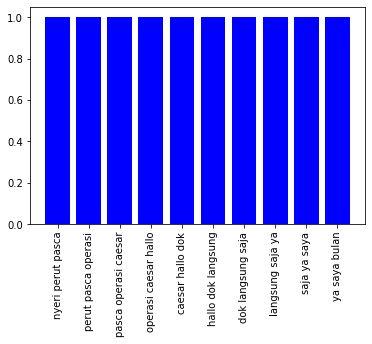

Similar Questions
{'kecil perut pasca': 2, 'perut pasca operasi': 2, 'pasca operasi caesar': 2, 'operasi caesar siang': 1, 'caesar siang dok': 1, 'siang dok yang': 1, 'dok yang ingin': 1, 'yang ingin saya': 1, 'ingin saya tanya': 1, 'saya tanya bagaimana': 1, 'tanya bagaimana cara': 1, 'bagaimana cara kecil': 1, 'cara kecil perut': 1, 'operasi caesar perut': 1, 'caesar perut saya': 1, 'perut saya sampai': 1, 'saya sampai saat': 1, 'sampai saat ini': 1, 'saat ini masih': 1, 'ini masih buncit': 1, 'masih buncit padahal': 1, 'buncit padahal sudah': 1, 'padahal sudah satu': 1, 'sudah satu tahun': 1, 'satu tahun yang': 1, 'tahun yang kasih': 1}


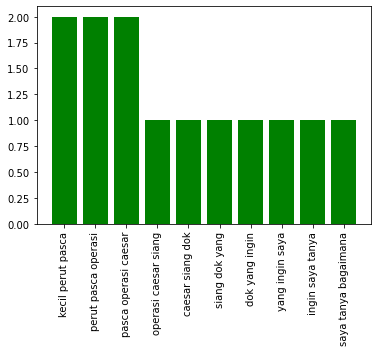



Question
{'cara atas pusing': 1, 'atas pusing lemas': 1, 'pusing lemas dan': 1, 'lemas dan hidung': 1, 'dan hidung air': 1, 'hidung air malam': 1, 'air malam dok': 1, 'malam dok sejak': 1, 'dok sejak hari': 1, 'sejak hari yang': 1, 'hari yang lalu': 1, 'yang lalu badan': 1, 'lalu badan saya': 1, 'badan saya pusing': 1, 'saya pusing dan': 1, 'pusing dan lemas': 1, 'dan lemas hari': 1, 'lemas hari ini': 1, 'hari ini hidung': 1, 'ini hidung saya': 1, 'hidung saya keluar': 1, 'saya keluar ingus': 1, 'keluar ingus terus': 1, 'ingus terus terus': 1, 'terus terus bagaimana': 1, 'terus bagaimana cara': 1, 'bagaimana cara atas': 1, 'cara atas nya': 1, 'atas nya ya': 1, 'nya ya dok': 1, 'ya dok terima': 1, 'dok terima kasih': 1, 'terima kasih belum': 1}


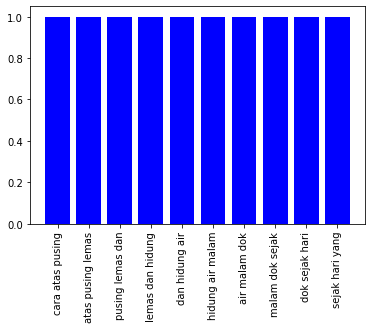

Similar Questions
{}


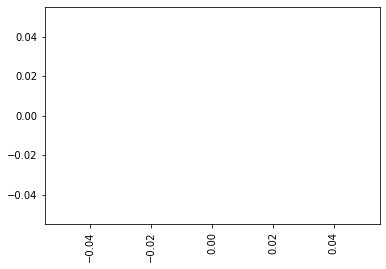



Question
{'darah atau flek': 1, 'atau flek saat': 1, 'flek saat awal': 1, 'saat awal hamil': 1, 'awal hamil assalamualaikum': 1, 'hamil assalamualaikum dok': 1, 'assalamualaikum dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya apakah': 1, 'tanya apakah tiap': 1, 'apakah tiap wanita': 1, 'tiap wanita jika': 1, 'wanita jika hamil': 1, 'jika hamil muda': 1, 'hamil muda biasa': 1, 'muda biasa keluar': 1, 'biasa keluar darah': 1, 'keluar darah flek': 1, 'darah flek atau': 1, 'flek atau hanya': 1, 'atau hanya bagi': 1, 'hanya bagi saja': 1}


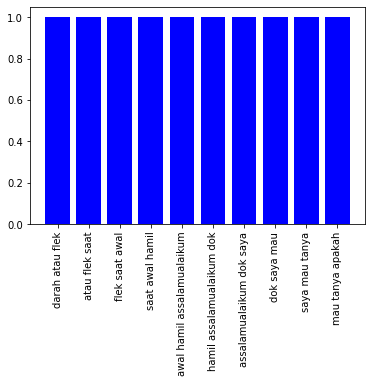

Similar Questions
{}


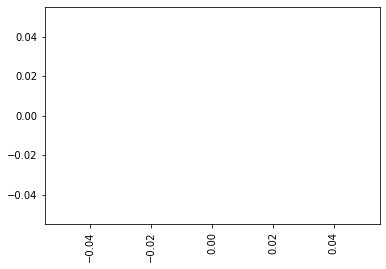



Question
{'nyeri perut pindah': 2, 'perut pindah apakah': 1, 'pindah apakah usus': 1, 'apakah usus buntu': 1, 'usus buntu dok': 1, 'buntu dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya saya': 1, 'tanya saya sakit': 1, 'saya sakit gejala': 1, 'sakit gejala perut': 1, 'gejala perut bagi': 1, 'perut bagi bawah': 1, 'bagi bawah sakit': 1, 'bawah sakit nyeri': 1, 'sakit nyeri terkadang': 1, 'nyeri terkadang pindah': 1, 'terkadang pindah belah': 1, 'pindah belah kanan': 1, 'belah kanan lalu': 1, 'kanan lalu nyalur': 1, 'lalu nyalur ke': 1, 'nyalur ke pinggang': 1, 'ke pinggang dan': 1, 'pinggang dan tidak': 1, 'dan tidak sakit': 1, 'tidak sakit mudah': 1, 'sakit mudah lelah': 1, 'mudah lelah perut': 1, 'lelah perut nyeri': 1, 'perut nyeri seperti': 1, 'nyeri seperti tekan': 1, 'seperti tekan susah': 1, 'tekan susah bab': 1, 'susah bab padahal': 1, 'bab padahal saya': 1, 'padahal saya minum': 1, 'saya minum vegeta': 1, 'minum vegeta herbal': 1, 'vegeta herbal perut': 1, 'h

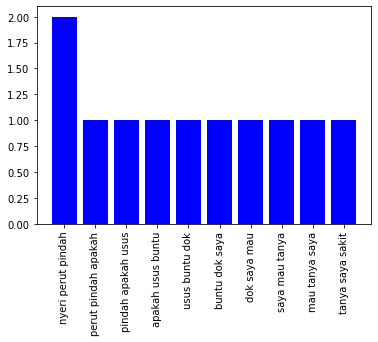

Similar Questions
{}


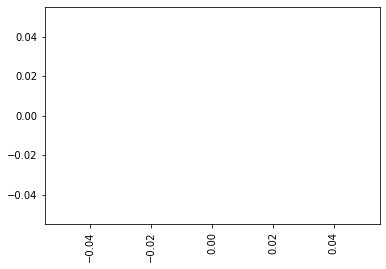



Question
{'biasa lamun atau': 1, 'lamun atau khayal': 1, 'atau khayal cara': 1, 'khayal cara lebih': 1, 'cara lebih dok': 1, 'lebih dok ini': 1, 'dok ini saya': 1, 'ini saya tahu': 1, 'saya tahu bahwa': 1, 'tahu bahwa saya': 1, 'bahwa saya idap': 1, 'saya idap maladaptive': 1, 'idap maladaptive daydreaming': 1, 'maladaptive daydreaming terkadang': 1, 'daydreaming terkadang saya': 1, 'terkadang saya buat': 1, 'saya buat cerita': 1, 'buat cerita lalu': 1, 'cerita lalu peran': 1, 'lalu peran nya': 1, 'peran nya dan': 1, 'nya dan terkadang': 1, 'dan terkadang gera': 1, 'terkadang gera saya': 1, 'gera saya reflek': 1, 'saya reflek ikut': 1, 'reflek ikut plot': 1, 'ikut plot yang': 1, 'plot yang saya': 1, 'yang saya buat': 1, 'saya buat dok': 1, 'buat dok apakah': 1, 'dok apakah maladaptive': 1, 'apakah maladaptive daydreaming': 1, 'maladaptive daydreaming kait': 1, 'daydreaming kait dengan': 1, 'kait dengan ganggu': 1, 'dengan ganggu jiwa': 1, 'ganggu jiwa apa': 1, 'jiwa apa saya': 1, 'ap

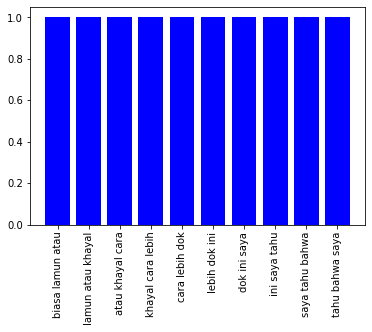

Similar Questions
{'banyak fikiran dok': 1, 'fikiran dok kalau': 1, 'dok kalau orang': 1, 'kalau orang yang': 1, 'orang yang terlalu': 1, 'yang terlalu banyak': 1, 'terlalu banyak fikiran': 1, 'banyak fikiran hingga': 1, 'fikiran hingga rasa': 1, 'hingga rasa tekan': 1, 'rasa tekan kemudian': 1, 'tekan kemudian sering': 1, 'kemudian sering keluh': 1, 'sering keluh putus': 1, 'keluh putus asa': 1, 'putus asa manyak': 1, 'asa manyak lamun': 1, 'manyak lamun cara': 1, 'lamun cara tenang': 1, 'cara tenang gimana': 1, 'tenang gimana dok': 1, 'gimana dok apakah': 1, 'dok apakah masih': 1, 'apakah masih bisa': 1, 'masih bisa di': 1, 'bisa di tangan': 1}


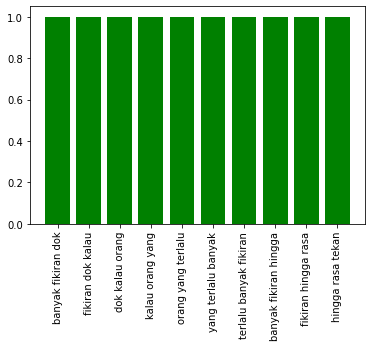



Question
{'yang saya alami': 2, 'pikir kenapa saya': 2, 'saya saat ini': 2, 'apakah depresi dapat': 1, 'depresi dapat kambuh': 1, 'dapat kambuh saya': 1, 'kambuh saya mhswi': 1, 'saya mhswi smst': 1, 'mhswi smst di': 1, 'smst di salah': 1, 'di salah satu': 1, 'salah satu poltekkes': 1, 'satu poltekkes di': 1, 'poltekkes di kota': 1, 'di kota saya': 1, 'kota saya pada': 1, 'saya pada tahun': 1, 'pada tahun lalu': 1, 'tahun lalu saya': 1, 'lalu saya sempat': 1, 'saya sempat aju': 1, 'sempat aju tanya': 1, 'aju tanya kena': 1, 'tanya kena yang': 1, 'kena yang saya': 1, 'saya alami dan': 1, 'alami dan telah': 1, 'dan telah saya': 1, 'telah saya ecek': 1, 'saya ecek jawab': 1, 'ecek jawab pada': 1, 'jawab pada februari': 1, 'pada februari tahun': 1, 'februari tahun ini': 1, 'tahun ini saya': 1, 'ini saya dapat': 1, 'saya dapat golong': 1, 'dapat golong depresi': 1, 'golong depresi karena': 1, 'depresi karena cakup': 1, 'karena cakup cukup': 1, 'cakup cukup banyak': 1, 'cukup banyak depres

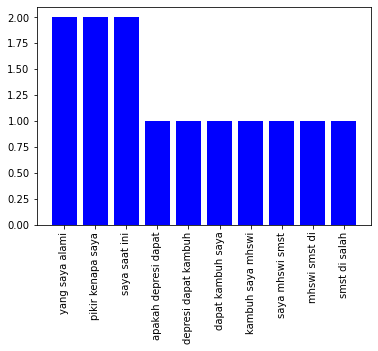

Similar Questions
{}


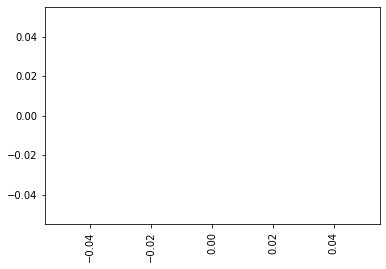



Question
{'dok saya ingin': 2, 'konsultasi sehat gizi': 1, 'sehat gizi selamat': 1, 'gizi selamat sore': 1, 'selamat sore dok': 1, 'sore dok saya': 1, 'saya ingin tanya': 1, 'ingin tanya untuk': 1, 'tanya untuk biaya': 1, 'untuk biaya konsultasi': 1, 'biaya konsultasi gizi': 1, 'konsultasi gizi di': 1, 'gizi di rumah': 1, 'di rumah sakit': 1, 'rumah sakit dari': 1, 'sakit dari sutomo': 1, 'dari sutomo surabaya': 1, 'sutomo surabaya berapa': 1, 'surabaya berapa ya': 1, 'berapa ya dok': 1, 'ya dok saya': 1, 'saya ingin gemuk': 1, 'ingin gemuk badan': 1, 'gemuk badan saya': 1, 'badan saya tetapi': 1, 'saya tetapi sulit': 1, 'tetapi sulit sekali': 1, 'sulit sekali telah': 1, 'sekali telah alami': 1, 'telah alami sakit': 1, 'alami sakit mag': 1, 'sakit mag dan': 1, 'mag dan lambung': 1, 'dan lambung saya': 1, 'lambung saya makan': 1, 'saya makan kali': 1, 'makan kali kali': 1, 'kali kali hampir': 1, 'kali hampir kali': 1, 'hampir kali tetapi': 1, 'kali tetapi gemuk': 1, 'tetapi gemuk di':

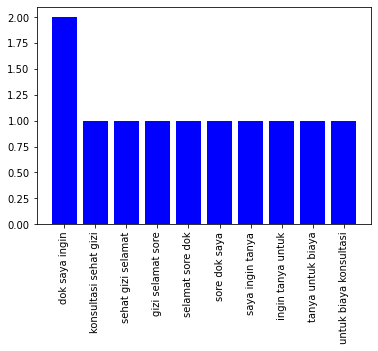

Similar Questions
{}


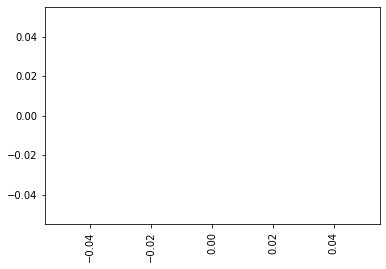



Question
{'apa yang saya': 2, 'sulit nafas dan': 2, 'bahwa yang saya': 2, 'yang saya rasa': 2, 'serang panik dan': 1, 'panik dan sulit': 1, 'dan sulit nafas': 1, 'sulit nafas malam': 1, 'nafas malam dokter': 1, 'malam dokter sudah': 1, 'dokter sudah beberapa': 1, 'sudah beberapa bulan': 1, 'beberapa bulan ini': 1, 'bulan ini saya': 1, 'ini saya sering': 1, 'saya sering alami': 1, 'sering alami serang': 1, 'alami serang panik': 1, 'serang panik kepala': 1, 'panik kepala saya': 1, 'kepala saya sering': 1, 'saya sering sakit': 1, 'sering sakit dan': 1, 'sakit dan sering': 1, 'dan sering cemas': 1, 'sering cemas tetapi': 1, 'cemas tetapi saya': 1, 'tetapi saya tidak': 1, 'saya tidak tahu': 1, 'tidak tahu apa': 1, 'tahu apa yang': 1, 'yang saya cemas': 1, 'saya cemas biasa': 1, 'cemas biasa kalau': 1, 'biasa kalau sedang': 1, 'kalau sedang kambuh': 1, 'sedang kambuh badan': 1, 'kambuh badan asa': 1, 'badan asa gemetar': 1, 'asa gemetar meriang': 1, 'gemetar meriang dingin': 1, 'meriang di

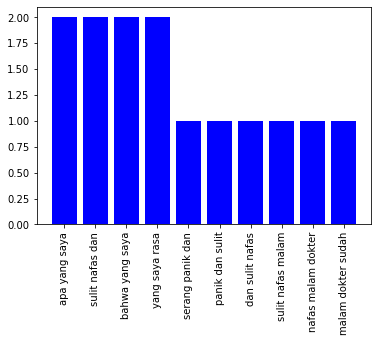

Similar Questions
{}


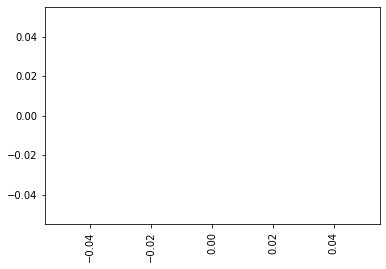



Question
{'program hamil dok': 1, 'hamil dok mau': 1, 'dok mau tanya': 1, 'mau tanya apakah': 1, 'tanya apakah milik': 1, 'apakah milik tubuh': 1, 'milik tubuh yang': 1, 'tubuh yang golong': 1, 'yang golong kurus': 1, 'golong kurus dapat': 1, 'kurus dapat pengaruh': 1, 'dapat pengaruh program': 1, 'pengaruh program hamil': 1, 'program hamil terima': 1, 'hamil terima kasih': 1}


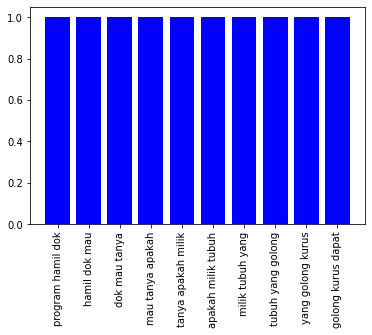

Similar Questions
{}


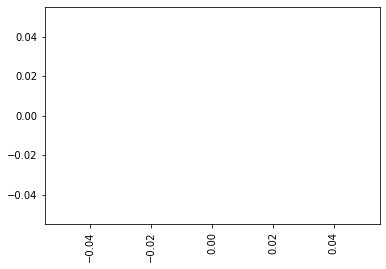



Question
{'sariawan dan kait': 1, 'dan kait dengan': 1, 'kait dengan demam': 1, 'dengan demam mual': 1, 'demam mual pusing': 1, 'mual pusing dok': 1, 'pusing dok saya': 1, 'dok saya sudah': 1, 'saya sudah hampir': 1, 'sudah hampir minggu': 1, 'hampir minggu sariawan': 1, 'minggu sariawan yang': 1, 'sariawan yang di': 1, 'yang di sebab': 1, 'di sebab bentur': 1, 'sebab bentur oleh': 1, 'bentur oleh sikat': 1, 'oleh sikat pada': 1, 'sikat pada hari': 1, 'pada hari ke': 1, 'hari ke malah': 1, 'ke malah lari': 1, 'malah lari ke': 1, 'lari ke demam': 1, 'ke demam dan': 1, 'demam dan mual': 1, 'dan mual juga': 1, 'mual juga ousing': 1, 'juga ousing dok': 1, 'ousing dok kenapa': 1, 'dok kenapa ya': 1, 'kenapa ya dok': 1}


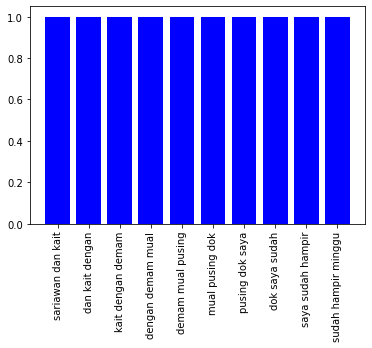

Similar Questions
{'pusing dan demam': 1, 'dan demam saya': 1, 'demam saya sakit': 1, 'saya sakit demam': 1, 'sakit demam sama': 1, 'demam sama pusing': 1, 'sama pusing dan': 1, 'pusing dan hari': 1, 'dan hari lanjut': 1, 'hari lanjut sembut': 1, 'lanjut sembut pusing': 1, 'sembut pusing sama': 1, 'pusing sama demam': 1, 'sama demam lagi': 1, 'demam lagi itu': 1, 'lagi itu karena': 1, 'itu karena kenapa': 1, 'karena kenapa ya': 1, 'kenapa ya dok': 1}


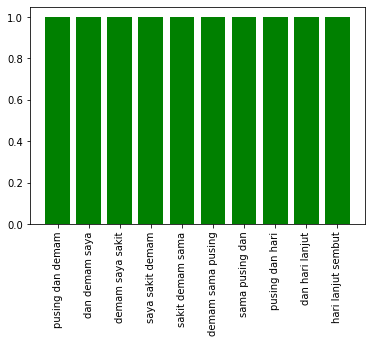



Question
{'hbv dna dan': 1, 'dna dan sgpt': 1, 'dan sgpt ot': 1, 'sgpt ot assalamualaikum': 1, 'ot assalamualaikum dok': 1, 'assalamualaikum dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya suami': 1, 'tanya suami sudah': 1, 'suami sudah hampir': 1, 'sudah hampir rutin': 1, 'hampir rutin kontrol': 1, 'rutin kontrol hepatitis': 1, 'kontrol hepatitis hasil': 1, 'hepatitis hasil lab': 1, 'hasil lab akhir': 1, 'lab akhir hbv': 1, 'akhir hbv dna': 1, 'hbv dna kuantitatif': 1, 'dna kuantitatif not': 1, 'kuantitatif not detected': 1, 'not detected maksud': 1, 'detected maksud apa': 1, 'maksud apa ya': 1, 'apa ya dok': 1, 'ya dok lalu': 1, 'dok lalu tes': 1, 'lalu tes sgpt': 1, 'tes sgpt mohon': 1, 'sgpt mohon jelas': 1, 'mohon jelas terima': 1, 'jelas terima kasih': 1, 'terima kasih dok': 1}


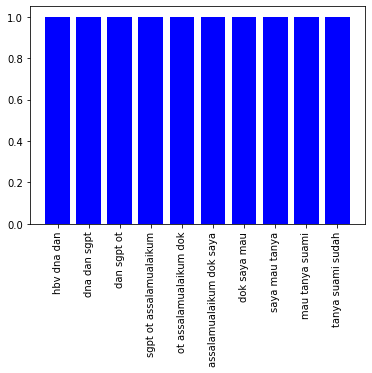

Similar Questions
{}


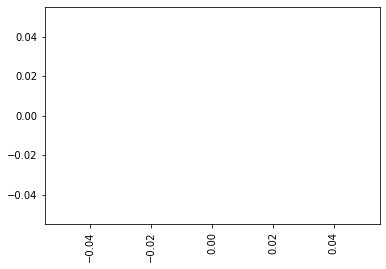



Question
{'alergi susu sapi': 2, 'susu sapi dan': 2, 'sapi dan kedelai': 2, 'solusi alergi susu': 1, 'dan kedelai pada': 1, 'kedelai pada anak': 1, 'pada anak malam': 1, 'anak malam dok': 1, 'malam dok anak': 1, 'dok anak saya': 1, 'anak saya umur': 1, 'saya umur bulan': 1, 'umur bulan alergi': 1, 'bulan alergi susu': 1, 'dan kedelai juga': 1, 'kedelai juga karena': 1, 'juga karena asi': 1, 'karena asi saya': 1, 'asi saya macet': 1, 'saya macet sudah': 1, 'macet sudah bulan': 1, 'sudah bulan di': 1, 'bulan di kasih': 1, 'di kasih susu': 1, 'kasih susu hipoalergenik': 1, 'susu hipoalergenik terus': 1, 'hipoalergenik terus apa': 1, 'terus apa ada': 1, 'apa ada obat': 1, 'ada obat yang': 1, 'obat yang ampuh': 1, 'yang ampuh buat': 1, 'ampuh buat nyembuhin': 1, 'buat nyembuhin alergi': 1, 'nyembuhin alergi nya': 1, 'alergi nya atau': 1, 'nya atau ada': 1, 'atau ada kah': 1, 'ada kah solusi': 1, 'kah solusi yang': 1, 'solusi yang baik': 1, 'yang baik agar': 1, 'baik agar anak': 1, 'agar a

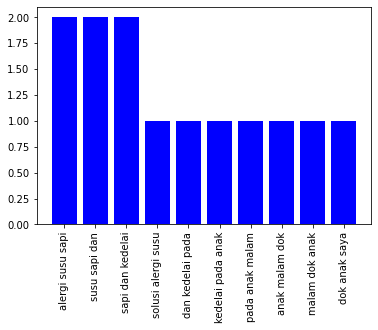

Similar Questions
{}


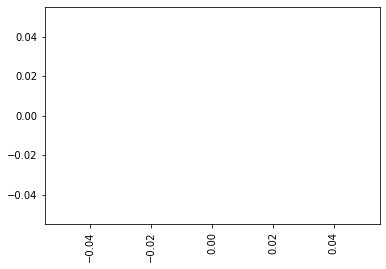



Question
{'berat janin dok': 1, 'janin dok usia': 1, 'dok usia kandung': 1, 'usia kandung saya': 1, 'kandung saya minggu': 1, 'saya minggu berat': 1, 'minggu berat janin': 1, 'berat janin saya': 1, 'janin saya gram': 1, 'saya gram apakah': 1, 'gram apakah normal': 1, 'apakah normal dok': 1}


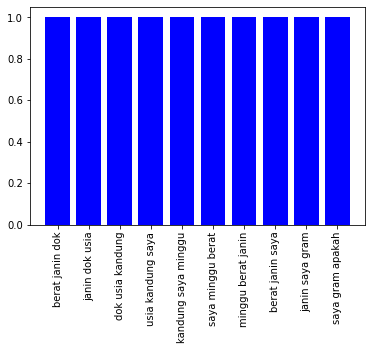

Similar Questions
{}


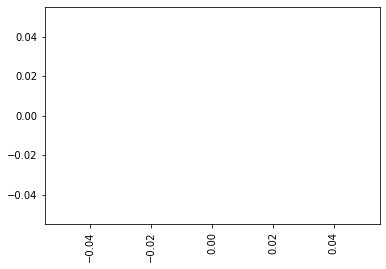



Question
{'mental disorder atau': 1, 'disorder atau tidak': 1, 'atau tidak salam': 1, 'tidak salam saya': 1, 'salam saya ada': 1, 'saya ada pernah': 1, 'ada pernah dekat': 1, 'pernah dekat dengan': 1, 'dekat dengan orang': 1, 'dengan orang gadis': 1, 'orang gadis cantik': 1, 'gadis cantik sekitar': 1, 'cantik sekitar umur': 1, 'sekitar umur atau': 1, 'umur atau tahun': 1, 'atau tahun tetapi': 1, 'tahun tetapi saat': 1, 'tetapi saat saya': 1, 'saat saya ajak': 1, 'saya ajak obrol': 1, 'ajak obrol hanya': 1, 'obrol hanya saja': 1, 'hanya saja dia': 1, 'saja dia cuma': 1, 'dia cuma bicara': 1, 'cuma bicara patah': 1, 'bicara patah kata': 1, 'patah kata waktu': 1, 'kata waktu itu': 1, 'waktu itu sambil': 1, 'itu sambil tertawa': 1, 'sambil tertawa dengan': 1, 'tertawa dengan muka': 1, 'dengan muka merah': 1, 'muka merah lalu': 1, 'merah lalu gadis': 1, 'lalu gadis itu': 1, 'gadis itu waktu': 1, 'itu waktu luar': 1, 'waktu luar kantor': 1, 'luar kantor habis': 1, 'kantor habis makan': 1, 

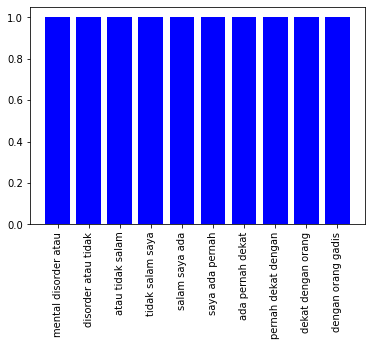

Similar Questions
{'dia hanya mau': 2, 'ingin meni dengan': 2, 'meni dengan saya': 2, 'saya adalah orang': 2, 'pasang tepat atau': 1, 'tepat atau tidak': 1, 'atau tidak salam': 1, 'tidak salam klik': 1, 'salam klik dokter': 1, 'klik dokter terima': 1, 'dokter terima kasih': 1, 'terima kasih atas': 1, 'kasih atas kesempatanya': 1, 'atas kesempatanya saya': 1, 'kesempatanya saya mau': 1, 'saya mau tanya': 1, 'mau tanya tentang': 1, 'tanya tentang pribadi': 1, 'tentang pribadi orang': 1, 'pribadi orang pria': 1, 'orang pria saya': 1, 'pria saya kenal': 1, 'saya kenal orang': 1, 'kenal orang lelaki': 1, 'orang lelaki dari': 1, 'lelaki dari jejaring': 1, 'dari jejaring sosial': 1, 'jejaring sosial yang': 1, 'sosial yang saya': 1, 'yang saya nilai': 1, 'saya nilai sangat': 1, 'nilai sangat tarik': 1, 'sangat tarik cara': 1, 'tarik cara fisik': 1, 'cara fisik awal': 1, 'fisik awal kenal': 1, 'awal kenal saya': 1, 'kenal saya nilai': 1, 'saya nilai dia': 1, 'nilai dia lelaki': 1, 'dia lelaki s

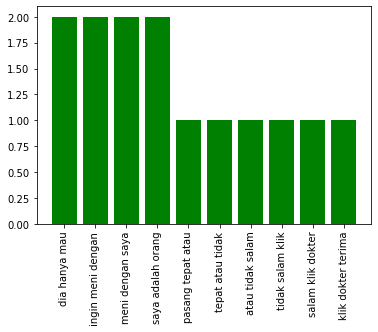



Question
{'telinga dengung belah': 1, 'dengung belah kiri': 1, 'belah kiri selamat': 1, 'kiri selamat pagi': 1, 'selamat pagi dok': 1, 'pagi dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya kenapa': 1, 'tanya kenapa telinga': 1, 'kenapa telinga saya': 1, 'telinga saya denging': 1, 'saya denging terus': 1, 'denging terus ya': 1, 'terus ya dok': 1, 'ya dok sudah': 1, 'dok sudah hari': 1, 'sudah hari saya': 1, 'hari saya juga': 1, 'saya juga sudah': 1, 'juga sudah ke': 1, 'sudah ke puskesmas': 1, 'ke puskesmas untuk': 1, 'puskesmas untuk di': 1, 'untuk di periksa': 1, 'di periksa kata': 1, 'periksa kata dokter': 1, 'kata dokter telinga': 1, 'dokter telinga kotor': 1, 'telinga kotor karena': 1, 'kotor karena di': 1, 'karena di sih': 1, 'di sih dengan': 1, 'sih dengan cutton': 1, 'dengan cutton buds': 1, 'cutton buds jadi': 1, 'buds jadi kotor': 1, 'jadi kotor dorong': 1, 'kotor dorong hingga': 1, 'dorong hingga tutup': 1, 'hingga tutup gendang': 1, 'tutup gendang telinga'

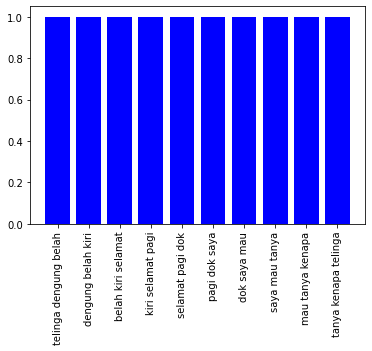

Similar Questions
{}


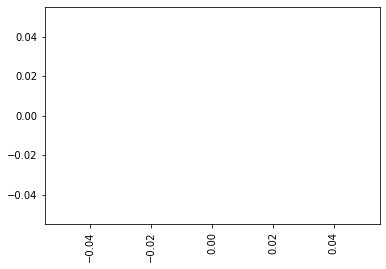



Question
{'patah tulang dapat': 1, 'tulang dapat sambung': 1, 'dapat sambung sore': 1, 'sambung sore dok': 1, 'sore dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya apakah': 1, 'tanya apakah tulang': 1, 'apakah tulang yang': 1, 'tulang yang patah': 1, 'yang patah ada': 1, 'patah ada mungkin': 1, 'ada mungkin tidak': 1, 'mungkin tidak tumbuh': 1, 'tidak tumbuh sambung': 1, 'tumbuh sambung apakah': 1, 'sambung apakah arti': 1, 'apakah arti dari': 1, 'arti dari tidak': 1, 'dari tidak tampak': 1, 'tidak tampak reaksi': 1, 'tampak reaksi dan': 1, 'reaksi dan berapa': 1, 'dan berapa lama': 1, 'berapa lama tulang': 1, 'lama tulang bisa': 1, 'tulang bisa sambung': 1, 'bisa sambung dan': 1, 'sambung dan kuat': 1, 'dan kuat terima': 1, 'kuat terima kasih': 1, 'terima kasih dok': 1}


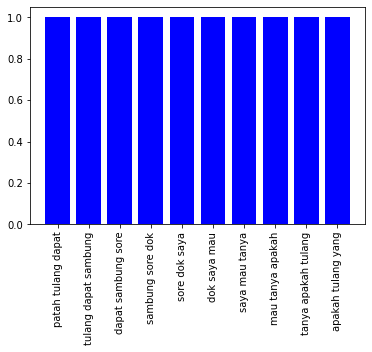

Similar Questions
{}


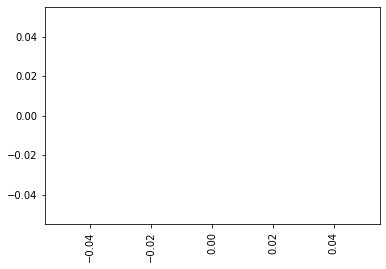



Question
{'lambung dan liver': 2, 'makan untuk derita': 1, 'untuk derita sakit': 1, 'derita sakit lambung': 1, 'sakit lambung dan': 1, 'dan liver dok': 1, 'liver dok saya': 1, 'dok saya mau': 1, 'saya mau tanya': 1, 'mau tanya apa': 1, 'tanya apa saja': 1, 'apa saja makan': 1, 'saja makan yang': 1, 'makan yang boleh': 1, 'yang boleh untuk': 1, 'boleh untuk derita': 1, 'untuk derita lambung': 1, 'derita lambung dan': 1, 'dan liver mohon': 1, 'liver mohon jawab': 1, 'mohon jawab terima': 1, 'jawab terima kasih': 1}


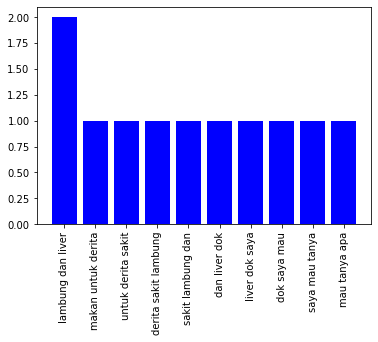

Similar Questions
{'makan dan minum': 2, 'dan minum untuk': 1, 'minum untuk diabetes': 1, 'untuk diabetes selamat': 1, 'diabetes selamat pagi': 1, 'selamat pagi dok': 1, 'pagi dok mau': 1, 'dok mau tanya': 1, 'mau tanya untuk': 1, 'tanya untuk derita': 1, 'untuk derita diabetes': 1, 'derita diabetes makan': 1, 'diabetes makan dan': 1, 'dan minum yang': 1, 'minum yang harus': 1, 'yang harus dikomsumsi': 1, 'harus dikomsumsi apa': 1, 'dikomsumsi apa saja': 1, 'apa saja terima': 1, 'saja terima kasih': 1, 'makan derita diabetes': 1, 'derita diabetes selamat': 1, 'diabetes selamat siang': 1, 'selamat siang mau': 1, 'siang mau tanya': 1, 'mau tanya makan': 1, 'tanya makan ganti': 1, 'makan ganti nasi': 1, 'ganti nasi untuk': 1, 'nasi untuk derita': 1, 'untuk derita abet': 1, 'derita abet apa': 1, 'abet apa dok': 1, 'apa dok tolong': 1, 'dok tolong jelas': 1, 'tolong jelas terima': 1, 'jelas terima kasih': 1}


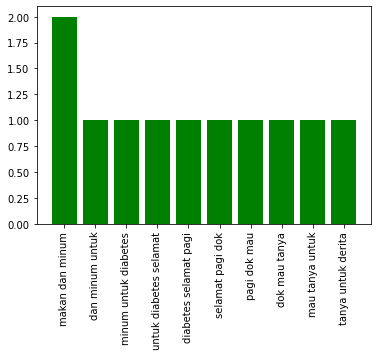

In [105]:
for i in range(len(text_error)):
    print("Question")
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_count = get_ngram_freq(3, full_query)
    question_count = dict(sorted(question_count.items(), key=lambda item: item[1], reverse=True))
    print(question_count)
    plt.bar(list(question_count.keys())[:10], list(question_count.values())[:10], color='b')
    plt.xticks(rotation=90)
    plt.show()
    
    print("Similar Questions")
    text_lst = []
    for error_passage in text_error[i]:
        text_lst.append(error_passage['title']+". "+error_passage['text'])
    passage_count  = get_ngram_freq_lst(3, text_lst)
    passage_count = dict(sorted(passage_count.items(), key=lambda item: item[1], reverse=True))
    print(passage_count)
    plt.bar(list(passage_count.keys())[:10], list(passage_count.values())[:10], color='g')
    plt.xticks(rotation=90)
    plt.show()
    print()
    print()

## Trigram Overlap

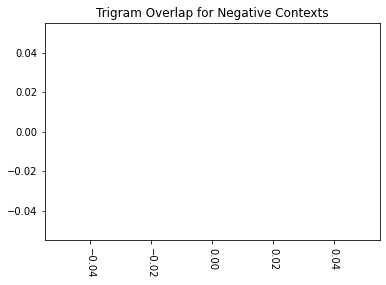

In [106]:
trigram_overlap =  dict()
for i in range(len(text_error)):
    if (len(text_error[i]) <= 0):
        continue
    full_query = gold_data[i]['question']['title'] + ". "+gold_data[i]['question']['text']
    question_ngram_cnt = get_ngram_freq(3, full_query)
    qid = gold_data[i]['question']['id']
    for error_passage in text_error[i]:
        pid = error_passage['id']
        row_id = qid+'_'+pid
        full_passage = error_passage['title'] + ". "+error_passage['text']
        passage_ngram_cnt = get_ngram_freq(3, full_passage)
        bigram_overlap[row_id] = get_union_term_cnt_normalized(question_ngram_cnt, passage_ngram_cnt)
trigram_overlap = dict(sorted(trigram_overlap.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(trigram_overlap.keys()), list(trigram_overlap.values()))
xlocs, xlabs = plt.xticks(rotation=270)
plt.title("Trigram Overlap for Negative Contexts")
for i, v in enumerate(list(trigram_overlap.values())):
    plt.text(xlocs[i] - 0.5, v + 0.001, str(round(v, 2)))
plt.show()

## Vector Embedding Projection

In [107]:
#passage embedding load

passage_embeddings = dict()
with (open("encoded_index_split.tsv", "rb")) as openfile:
    while True:
        try:
            passage_lst = pickle.load(openfile)
            for pid, p_vector in passage_lst:
                passage_embeddings[pid] = p_vector
        except EOFError:
            break


In [108]:
#question embedding load

query_embeddings = dict()
with (open("question-embedding-split.tsv", "rb")) as openfile:
    while True:
        try:
            query_lst = pickle.load(openfile)
            for qid, q_vector in query_lst:
                query_embeddings[qid] = q_vector
        except EOFError:
            break


/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


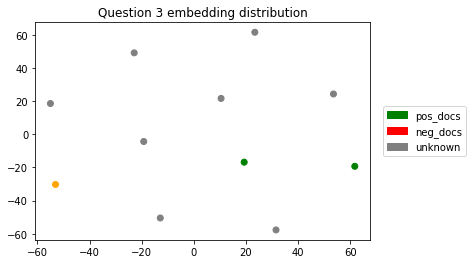

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


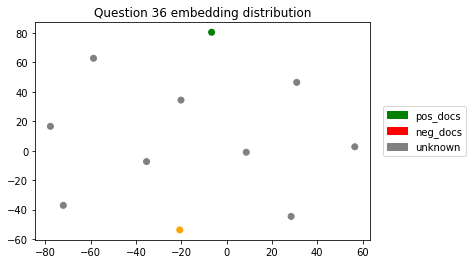

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


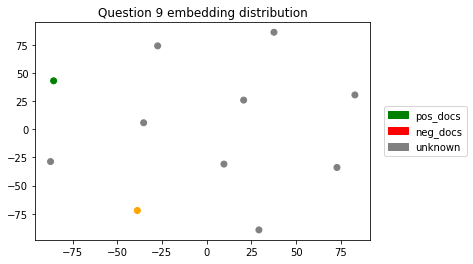

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


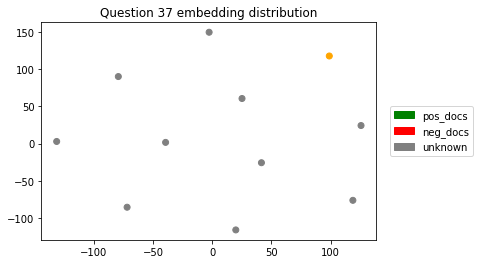

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


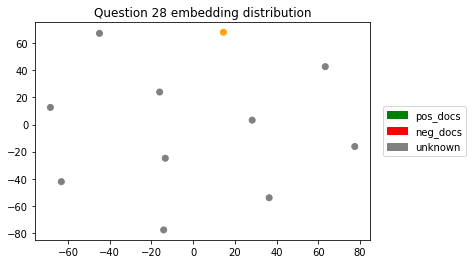

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


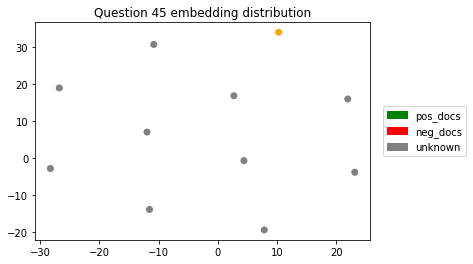

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


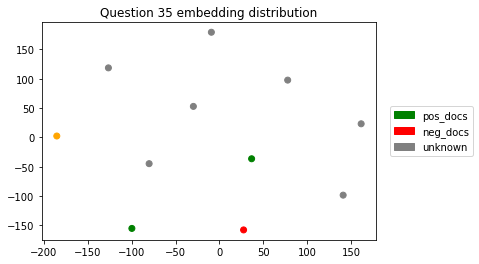

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


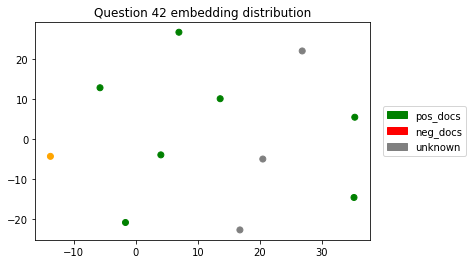

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


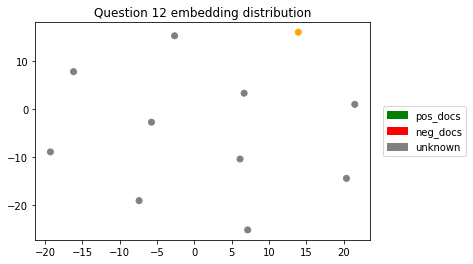

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


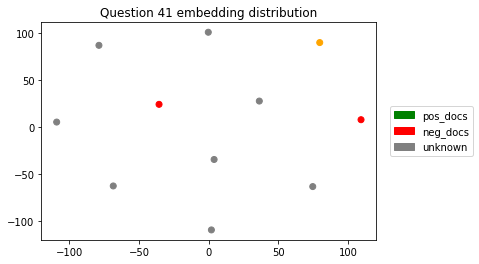

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


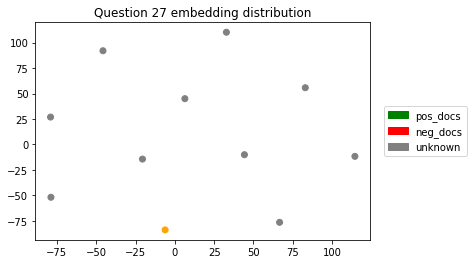

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


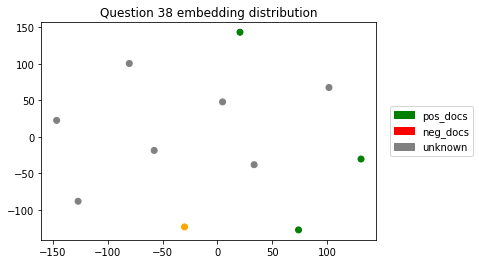

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


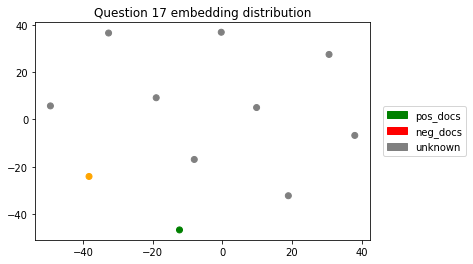

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


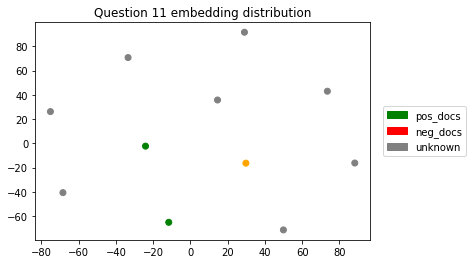

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


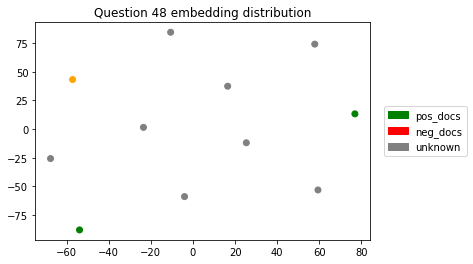

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


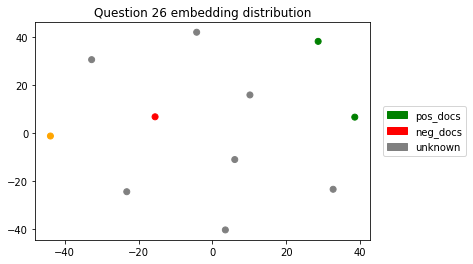

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


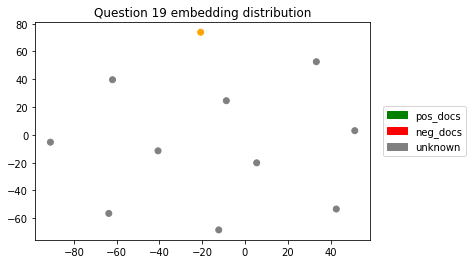

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


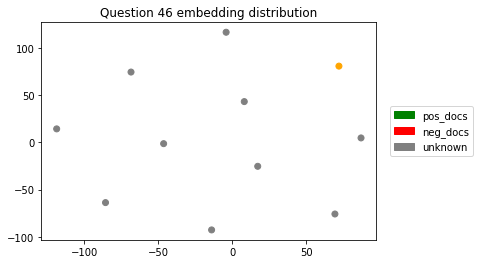

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


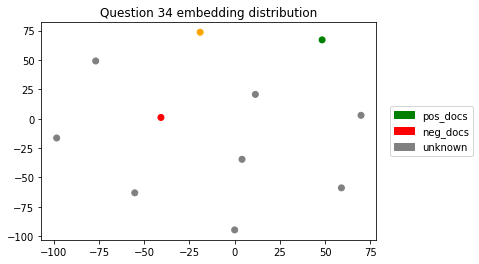

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


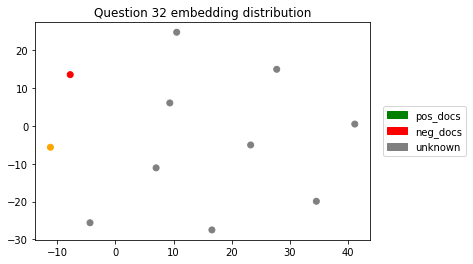

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


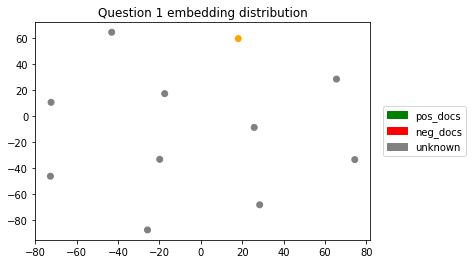

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


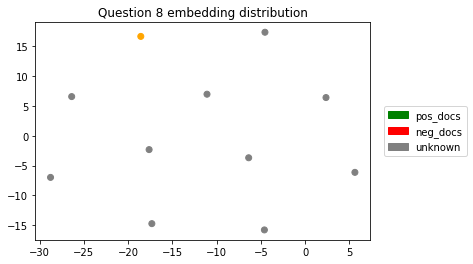

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


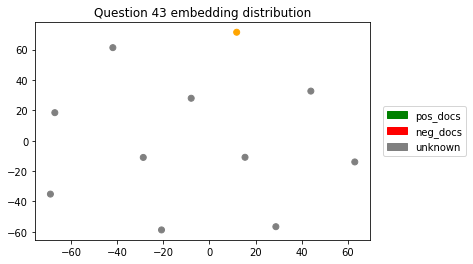

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


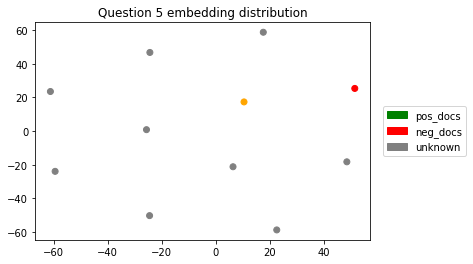

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


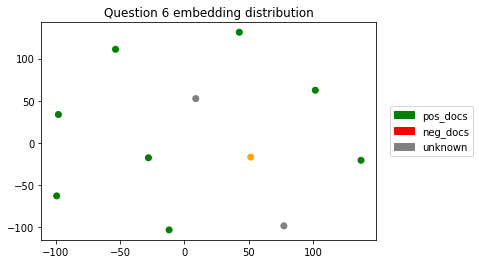

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


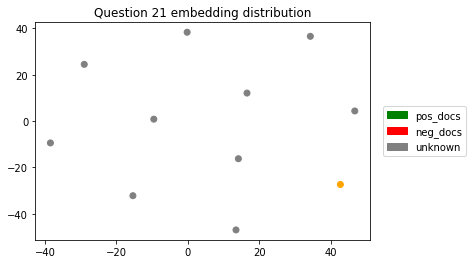

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


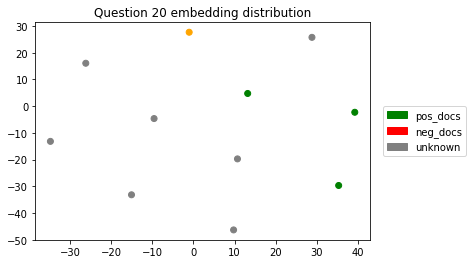

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


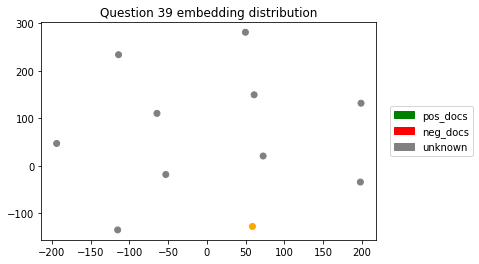

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


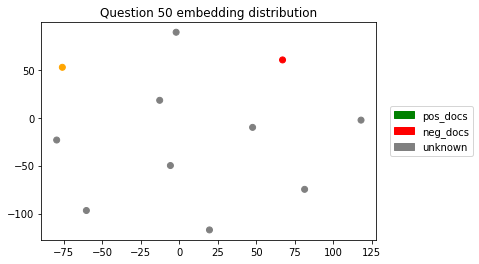

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


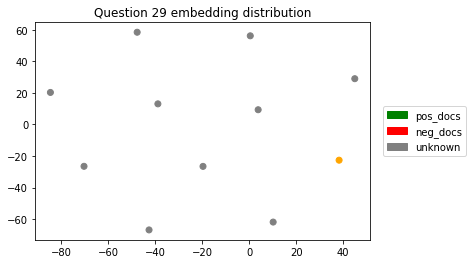

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


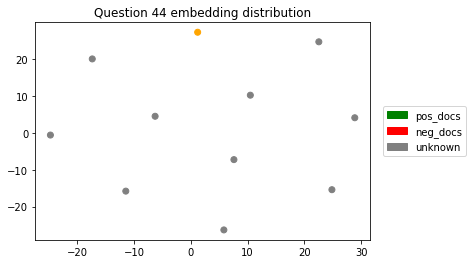

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


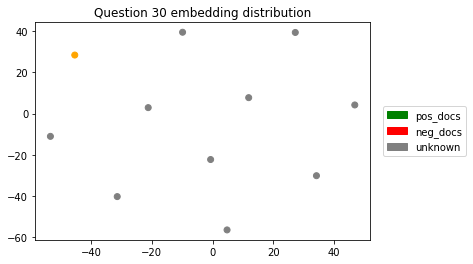

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


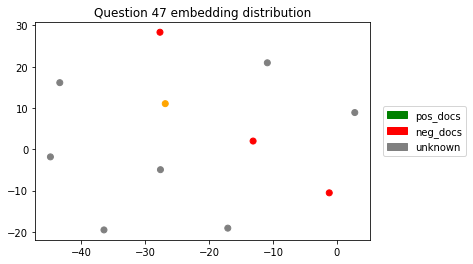

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


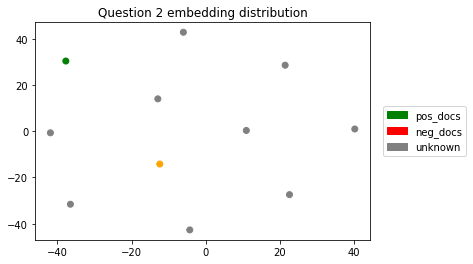

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


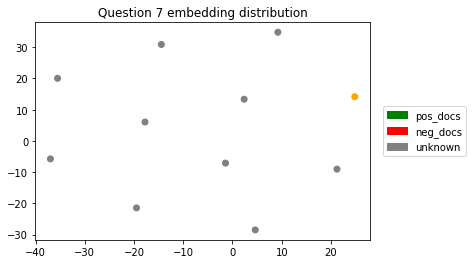

/home/mk1/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


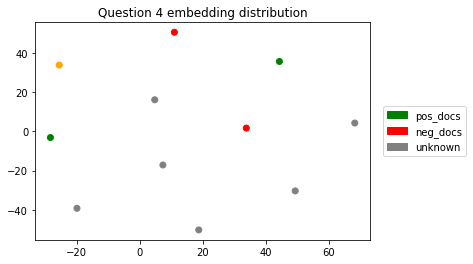

In [109]:
for idx,row in enumerate(actual_data):    
    values = [0]
    colors = ListedColormap(['orange','green','red', 'grey'])
    qid = row['question']['id']
    q_vector = query_embeddings[qid]
    q_vector = q_vector.reshape(-1, len(q_vector))
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        p_vector = passage_embeddings[pid]
        p_vector = p_vector.reshape(-1, len(p_vector))
        q_vector = np.concatenate((q_vector, p_vector), axis=0)
        color = 1 if pid in gold_ids[idx] else 2
        color = 3 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
    if len(q_vector) < 2:
        continue
    q_compressed = TSNE(n_components=2, learning_rate='auto',init='pca', random_state=42).fit_transform(q_vector)

    plt.title(f"Question {qid} embedding distribution")
    scatter = plt.scatter(q_compressed[:,0], q_compressed[:,1], c=values, cmap=colors)
    plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

## BM25 Score vs DPR Score

In [110]:
#gather all documents from corpus
docs = []
doc_ids = []

tree = ET.parse('corpus_only_question.xml')
root = tree.getroot()

for doc in root:
    for attr in doc:
        attr_type = attr.tag
        attr_content = attr.text
        if attr_type=='KELUHAN':
            content_text = ''
            for content in attr:
                if content.tag == 'JUDUL':
                    if content_text=='':
                        content_text += content.text if content.text is not None else ''
                    else:
                        content_text += f'. {content.text}' if content.text is not None else ''
                elif content.tag == 'ISI':
                    if content_text=='':
                        content_text += content.text if content.text is not None else ''
                    else:
                        content_text += f'. {content.text}' if content.text is not None else ''
            docs.append(content_text)
        elif attr_type == 'ID':
            doc_ids.append(attr_content)



In [111]:
docs_map =  dict()
for idx, doc_id in enumerate(doc_ids):
    docs_map[doc_id] = docs[idx]

In [112]:
avgdl = sum(len(doc) for doc in docs) / len(docs)
N = len(docs)
for q_idx, q_row in tqdm(enumerate(actual_data)):
    query = q_row['question']['title']
    query  += f". {q_row['question']['text']}" if q_row['question']['text'].strip()!="" else ""
    for doc_idx, doc_row in enumerate(q_row['ctxs']):
        doc_id = doc_row['id']
        actual_data[q_idx]['ctxs'][doc_idx]['bm25_score'] = bm25_query_score(query, doc_id, docs, docs_map, avgdl, N)
        

36it [09:42, 16.19s/it]


### Aggregated Plot

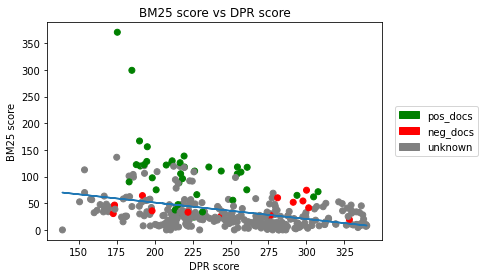

In [113]:
green_patch = mpatches.Patch(color='green', label='pos_docs')
red_patch = mpatches.Patch(color='red', label='neg_docs')
grey_patch = mpatches.Patch(color='grey', label='unknown')
color_handles = [green_patch, red_patch, grey_patch]
values = []
colors = ListedColormap(['green','red', 'grey'])
score_vector = []
for idx,row in enumerate(actual_data):        
    qid = row['question']['id']
    
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        score_vector.append([float(p_row['score']), p_row['bm25_score']]) #i assign the minus dpr score instead because their similarities are inversely propotional
        color = 0 if pid in gold_ids[idx] else 1
        color = 2 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
score_vector= np.array(score_vector)


m, b = np.polyfit(score_vector[:,0], score_vector[:,1], 1)
plt.title(f"BM25 score vs DPR score")
plt.xlabel("DPR score")
plt.ylabel("BM25 score")
scatter = plt.scatter(score_vector[:,0], score_vector[:,1], c=values, cmap=colors)

plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.plot(score_vector[:,0], m*score_vector[:,0] + b)
plt.show()

### Per Question Plot

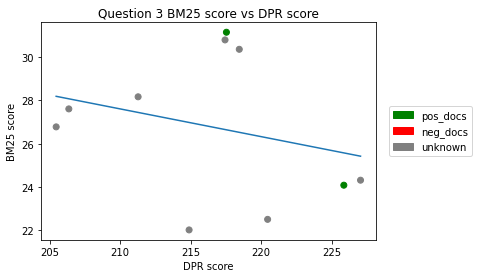

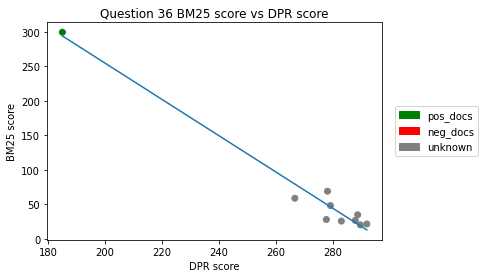

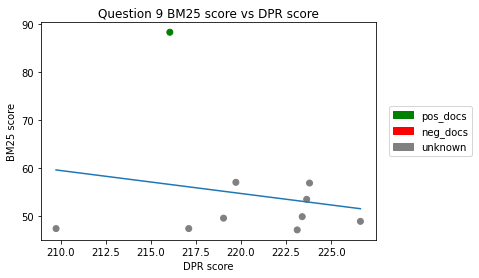

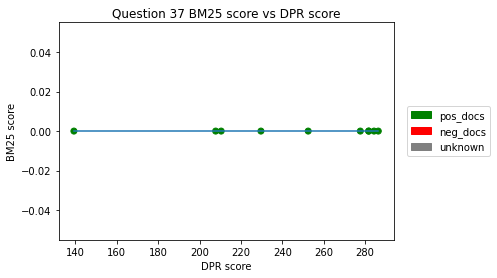

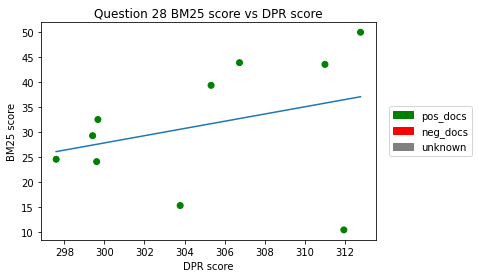

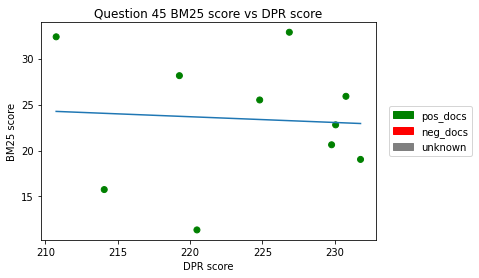

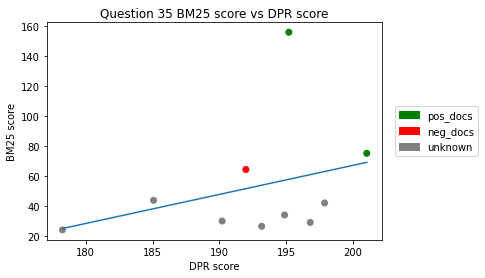

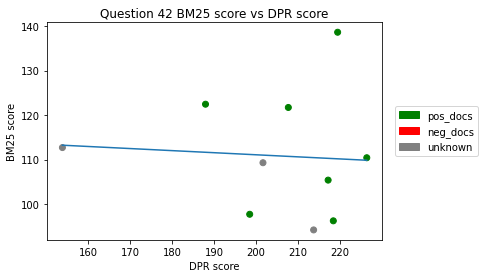

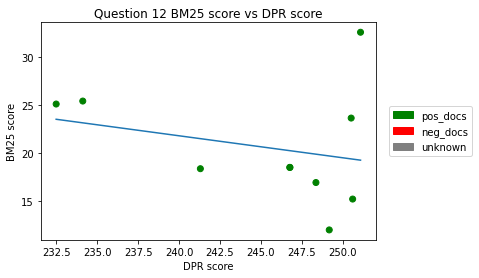

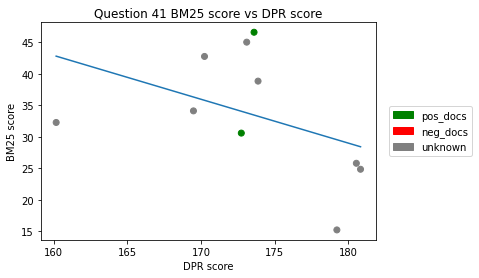

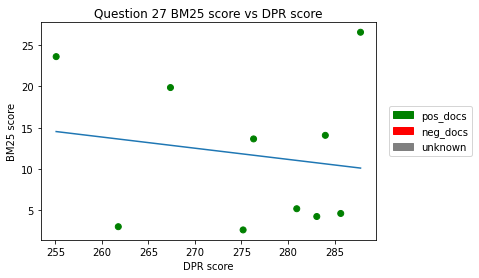

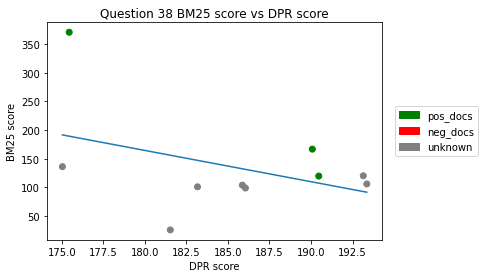

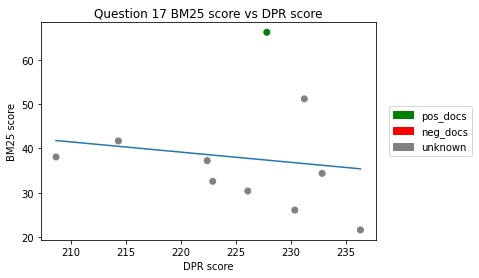

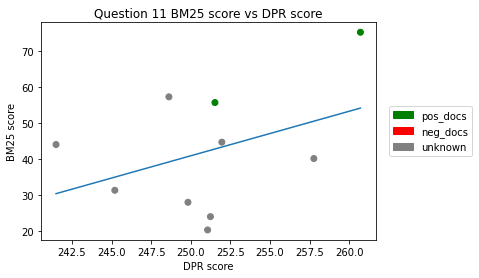

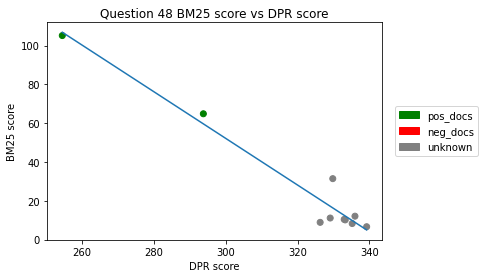

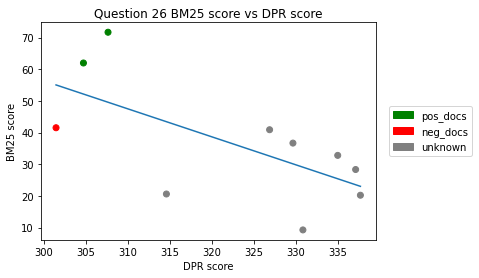

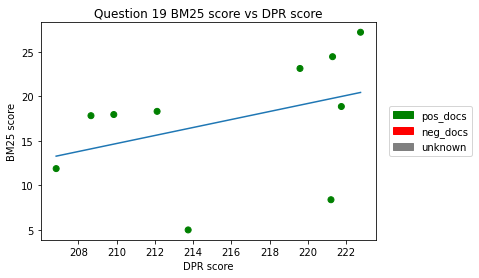

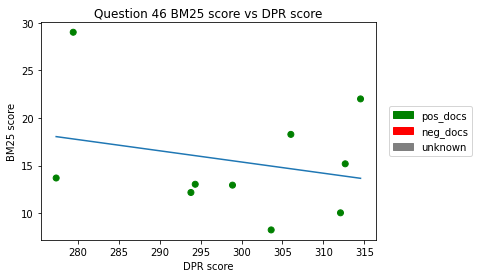

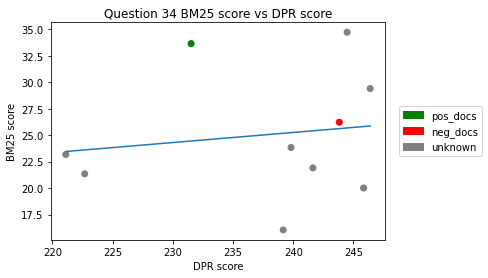

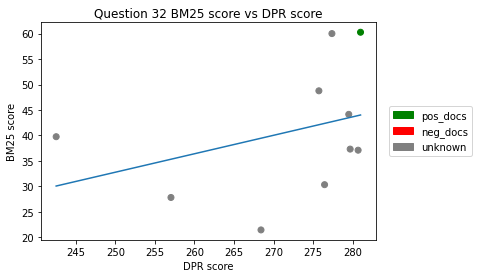

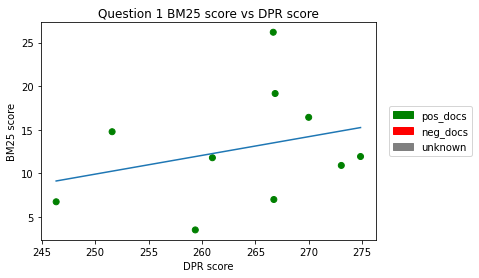

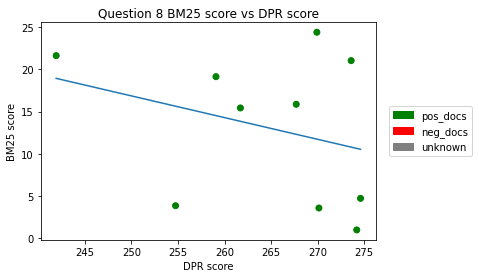

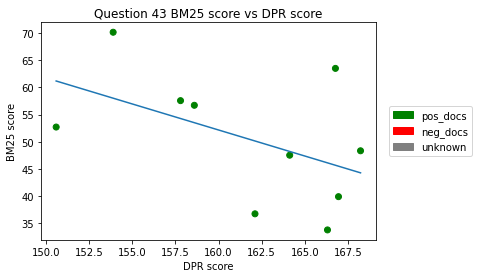

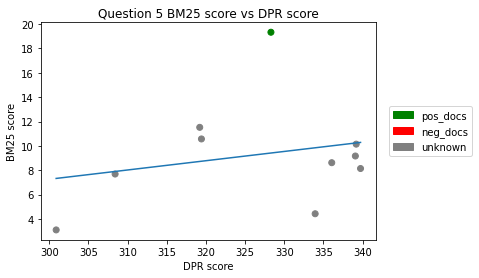

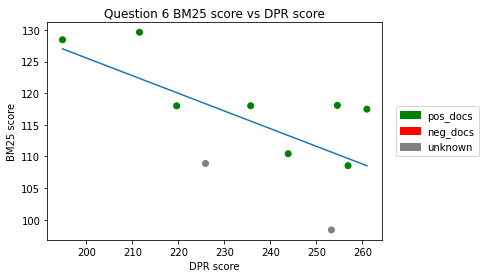

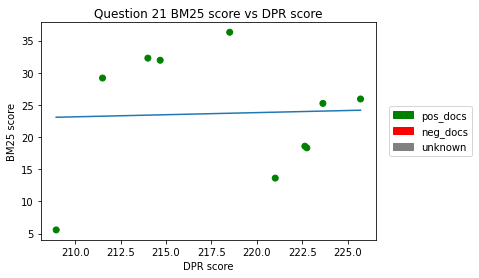

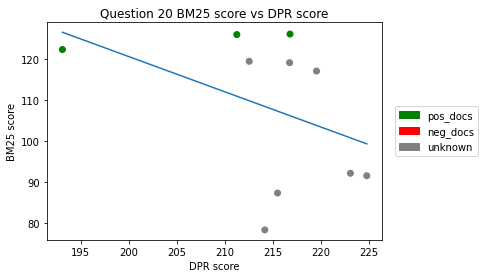

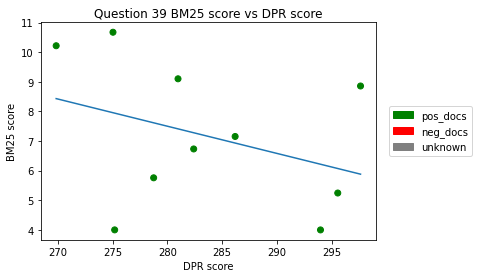

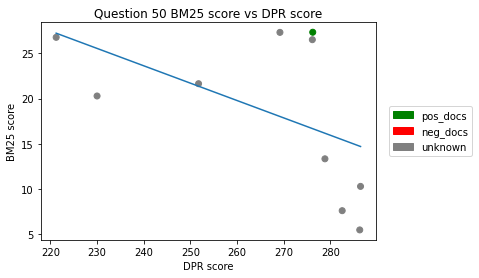

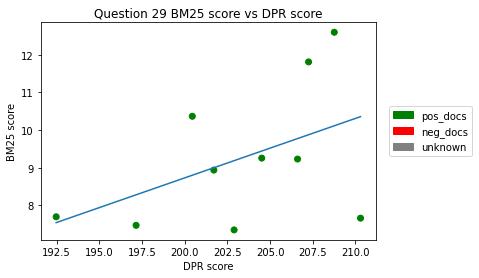

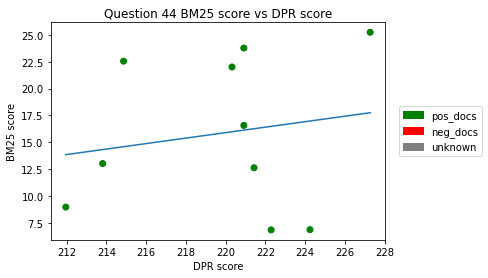

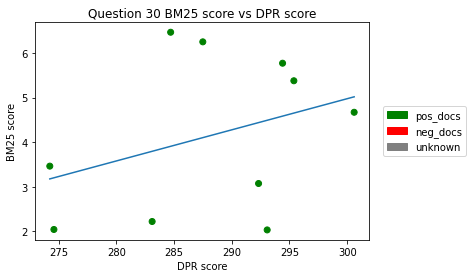

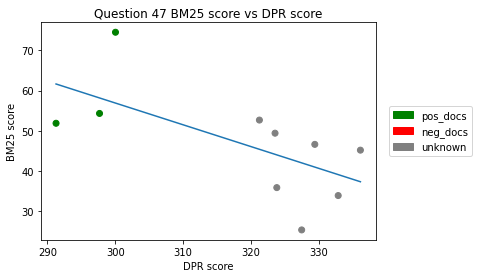

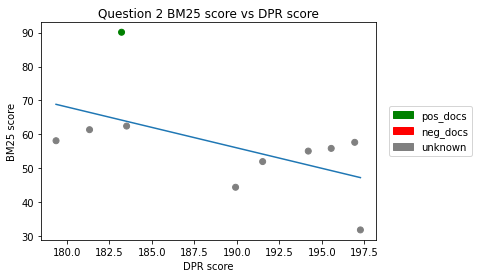

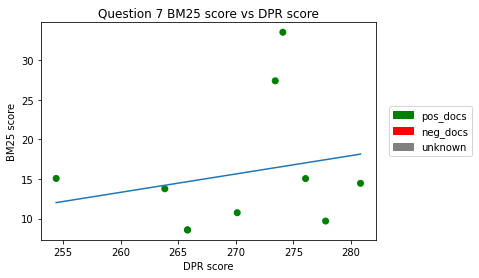

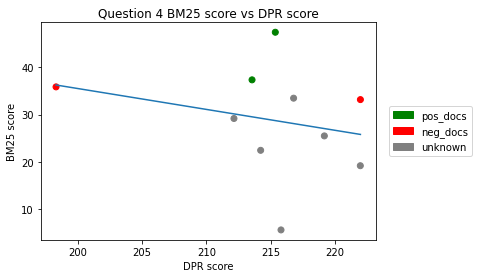

In [114]:
gradients_lst = []
for idx,row in enumerate(actual_data):
    values = []
    score_vector = []
    qid = row['question']['id']
    
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        score_vector.append([float(p_row['score']), p_row['bm25_score']]) #i assign the minus dpr score instead because their similarities are inversely propotional
        color = 0 if pid in gold_ids[idx] else 1
        color = 2 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
    score_vector= np.array(score_vector)


    m, b = np.polyfit(score_vector[:,0], score_vector[:,1], 1)
    plt.title(f"Question {qid} BM25 score vs DPR score")
    plt.xlabel("DPR score")
    plt.ylabel("BM25 score")
    scatter = plt.scatter(score_vector[:,0], score_vector[:,1], c=values, cmap=colors)
    gradients_lst.append(m)
    plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.plot(score_vector[:,0], m*score_vector[:,0] + b)
    plt.show()

In [115]:
is_positive = [gradient for gradient in gradients_lst if gradient > 0]
is_negative = [gradient for gradient in gradients_lst if gradient < 0]

print(f"positive gradient count: {len(is_positive)}")
print(f"negative gradient count: {len(is_negative)}")

positive gradient count: 13
negative gradient count: 22


It turns out that correlation is quite clear for the split dataset one ans it's shown that there is positive correlation between dpr similarity and bm25 similarity which is i think contradict the tydi result (maybe the dataset may affect the correlation of those or two similarities are indenpendent).  The vector embedding analysis is inconclusive because majority of the questions has too many unlabeled closest neighbors rather the labeled ones. Interestingly unigram overlap for negative context beatween one question to each similar questions is quite high while the rest is quite low. 

What if we increase the training epoch. I hypothesize that since the training data is small we need more epoch to par with the tydi which is larger one. Maybe the trend can be the same as tydi

In [116]:
with open('query_result_split_big_prettified.json', 'r') as actual_out:
    actual_data = json.load(actual_out)


In [118]:
avgdl = sum(len(doc) for doc in docs) / len(docs)
N = len(docs)
for q_idx, q_row in tqdm(enumerate(actual_data)):
    query = q_row['question']['title']
    query  += f". {q_row['question']['text']}" if q_row['question']['text'].strip()!="" else ""
    for doc_idx, doc_row in enumerate(q_row['ctxs']):
        doc_id = doc_row['id']
        actual_data[q_idx]['ctxs'][doc_idx]['bm25_score'] = bm25_query_score(query, doc_id, docs, docs_map, avgdl, N)
        

36it [09:40, 16.12s/it]


### Aggregated Plot

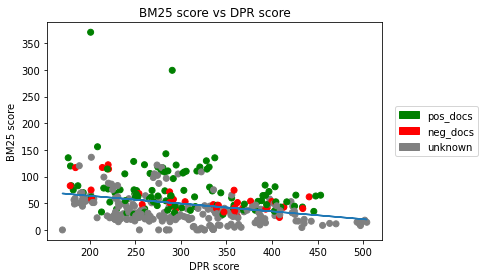

In [119]:
green_patch = mpatches.Patch(color='green', label='pos_docs')
red_patch = mpatches.Patch(color='red', label='neg_docs')
grey_patch = mpatches.Patch(color='grey', label='unknown')
color_handles = [green_patch, red_patch, grey_patch]
values = []
colors = ListedColormap(['green','red', 'grey'])
score_vector = []
for idx,row in enumerate(actual_data):        
    qid = row['question']['id']
    
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        score_vector.append([float(p_row['score']), p_row['bm25_score']]) #i assign the minus dpr score instead because their similarities are inversely propotional
        color = 0 if pid in gold_ids[idx] else 1
        color = 2 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
score_vector= np.array(score_vector)


m, b = np.polyfit(score_vector[:,0], score_vector[:,1], 1)
plt.title(f"BM25 score vs DPR score")
plt.xlabel("DPR score")
plt.ylabel("BM25 score")
scatter = plt.scatter(score_vector[:,0], score_vector[:,1], c=values, cmap=colors)

plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
plt.plot(score_vector[:,0], m*score_vector[:,0] + b)
plt.show()

### Per Question Plot

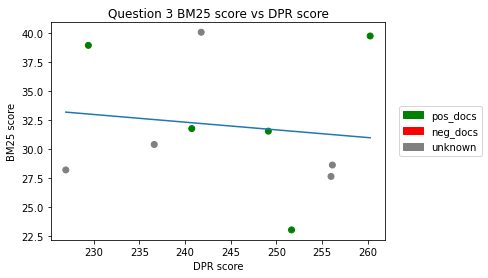

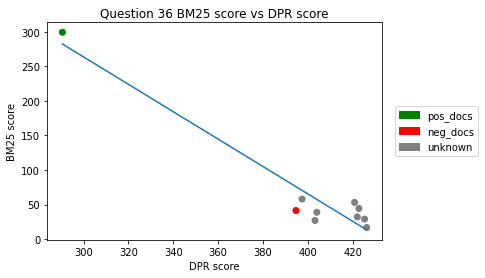

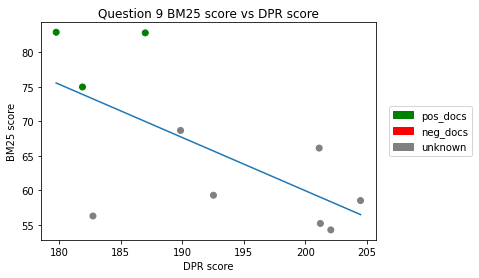

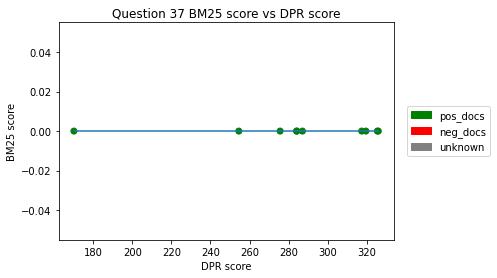

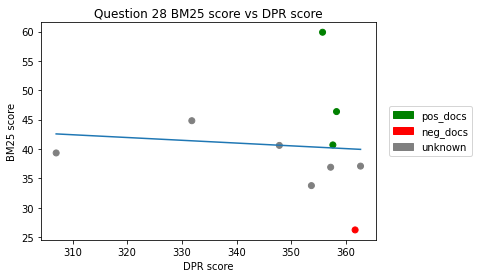

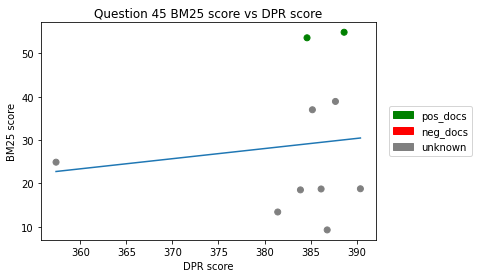

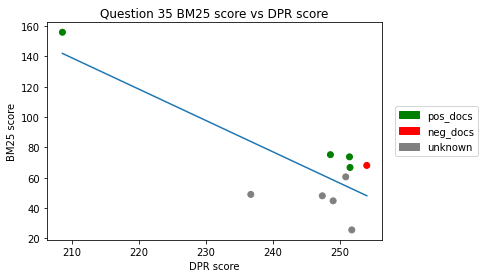

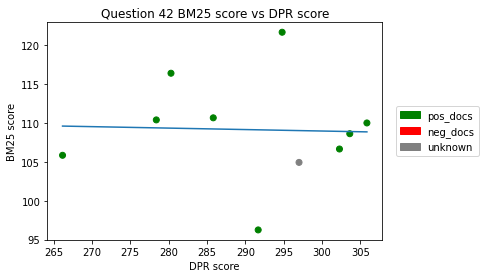

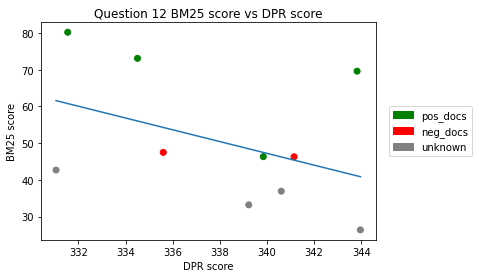

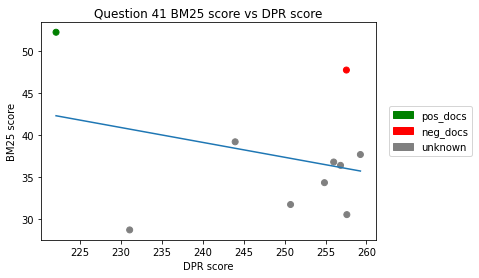

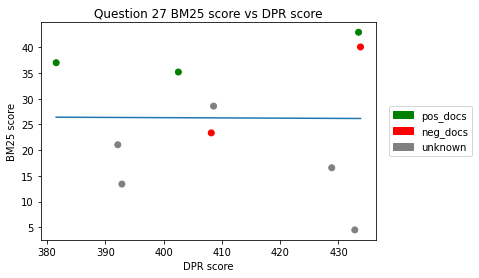

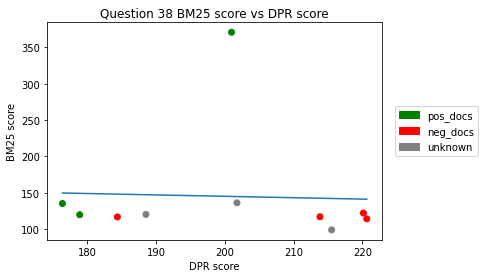

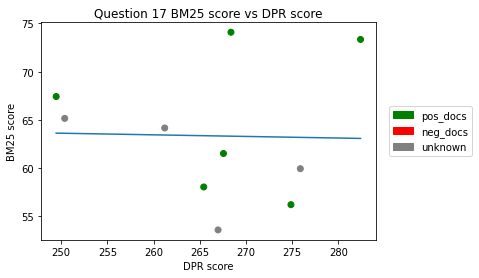

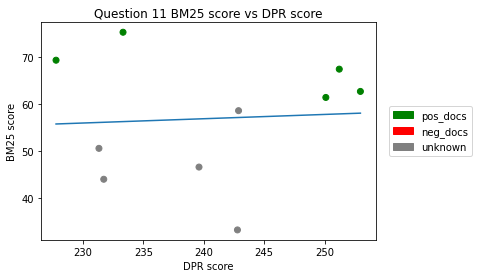

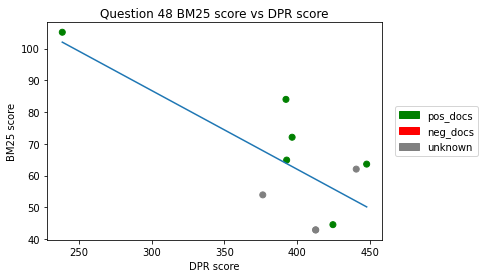

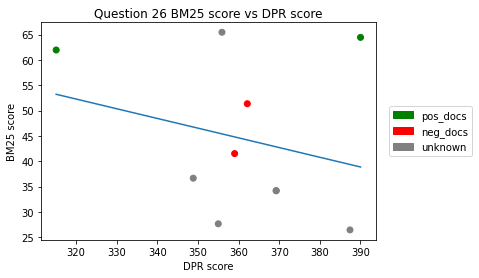

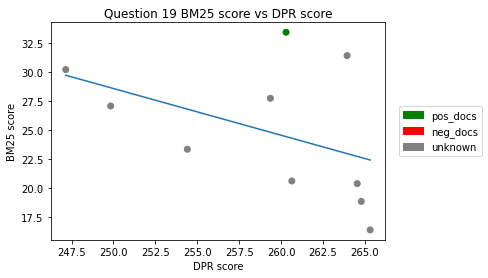

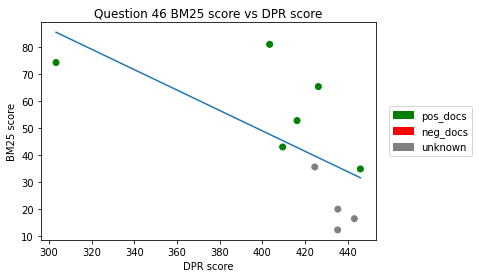

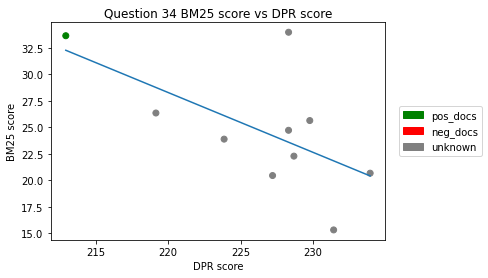

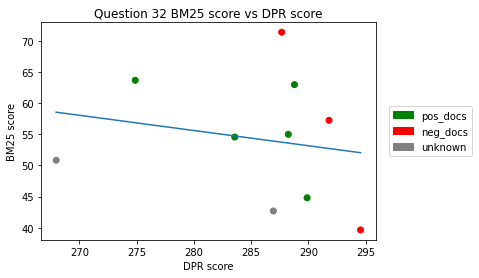

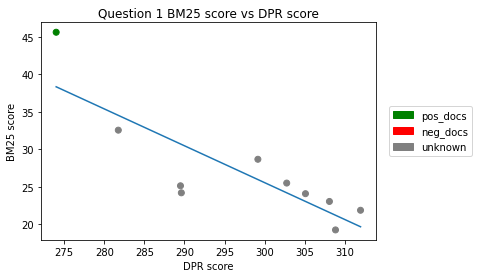

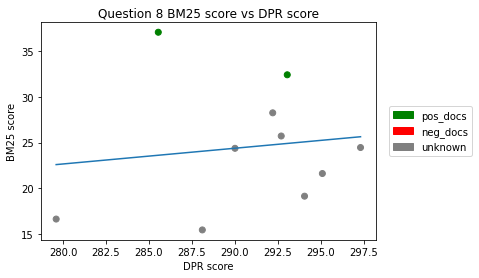

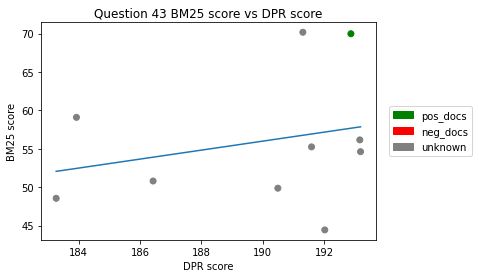

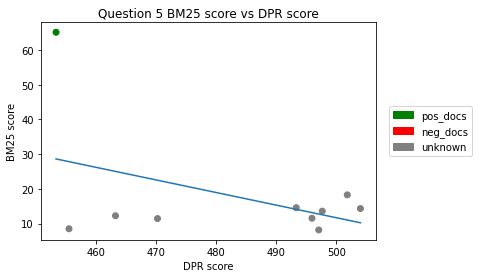

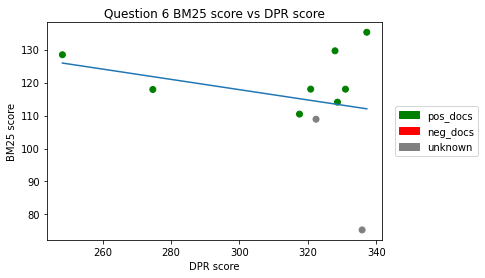

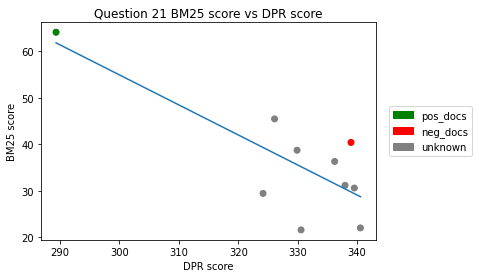

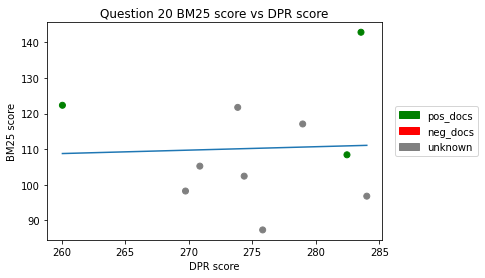

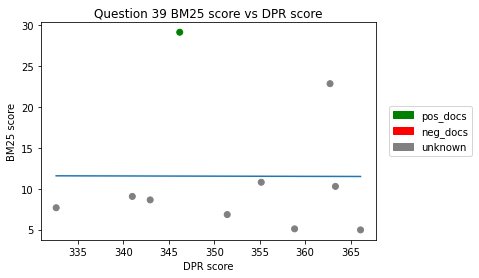

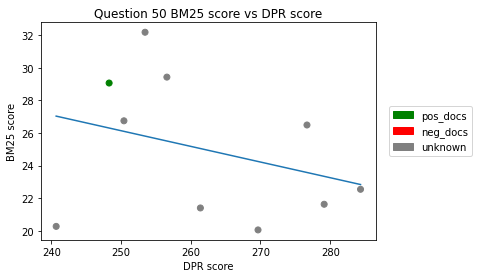

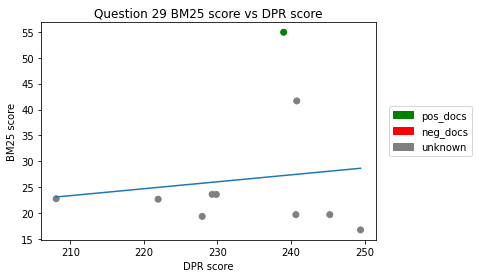

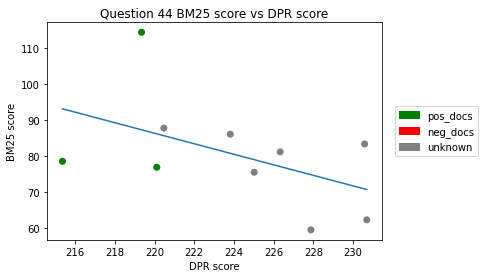

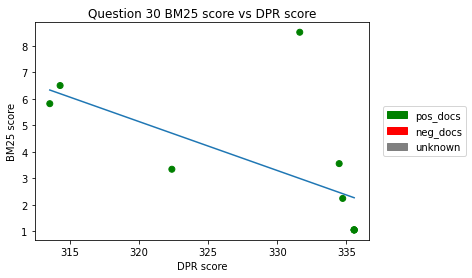

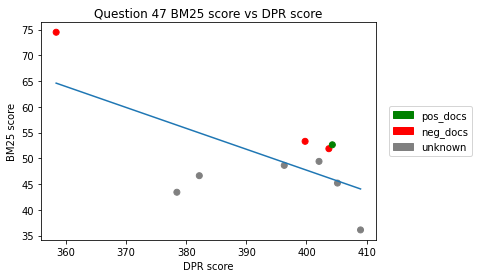

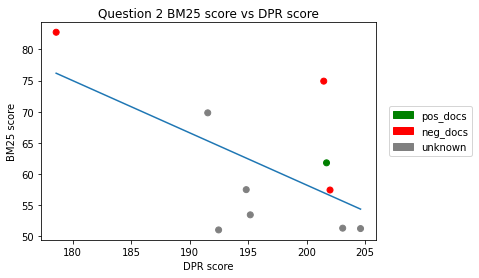

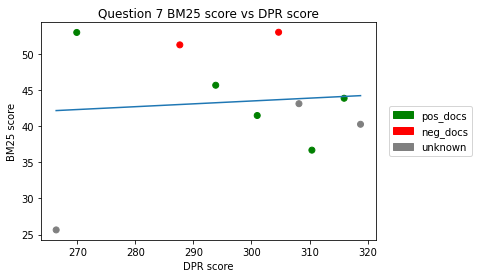

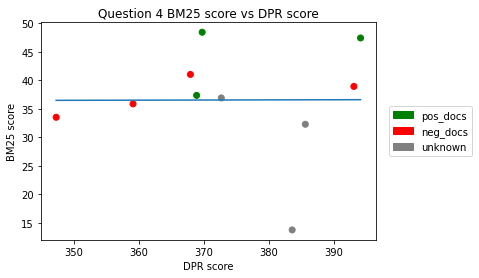

In [120]:
gradients_lst = []
for idx,row in enumerate(actual_data):
    values = []
    score_vector = []
    qid = row['question']['id']
    
    found_pos = False
    found_neg = False
    for p_row in row['ctxs']:
        pid = p_row['id']
        score_vector.append([float(p_row['score']), p_row['bm25_score']]) #i assign the minus dpr score instead because their similarities are inversely propotional
        color = 0 if pid in gold_ids[idx] else 1
        color = 2 if pid not in neg_ids[idx] and pid not in gold_ids[idx] else color
        values.append(color)
        if pid in gold_ids[idx]:
            found_pos = True
        else:
            found_neg = True
    score_vector= np.array(score_vector)


    m, b = np.polyfit(score_vector[:,0], score_vector[:,1], 1)
    plt.title(f"Question {qid} BM25 score vs DPR score")
    plt.xlabel("DPR score")
    plt.ylabel("BM25 score")
    scatter = plt.scatter(score_vector[:,0], score_vector[:,1], c=values, cmap=colors)
    gradients_lst.append(m)
    plt.legend(handles=color_handles, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.plot(score_vector[:,0], m*score_vector[:,0] + b)
    plt.show()

In [121]:
is_positive = [gradient for gradient in gradients_lst if gradient > 0]
is_negative = [gradient for gradient in gradients_lst if gradient < 0]

print(f"positive gradient count: {len(is_positive)}")
print(f"negative gradient count: {len(is_negative)}")

positive gradient count: 8
negative gradient count: 27


Perhaps in-domain dataset works better than cross-domain dataset i guess(?)